# Data Visualisation Plots

## EDA to use in plots

I want to add to my presentation some facts for impact on my listening during the year of 2023 to add within the presenation such as:

1. Total hours and minutes spent listneing to music
2. The number of unique songs versus repeat listens
3. The most popular day and hour I listen to music
4. Average Listening Duration
5. Top Tracks
6. Diveristy in my listening
7. Compare categories
8. Time spent listening to each track

In [1]:
# Importing the libraries
import pandas as pd
from datetime import timedelta

# Reading in the dataset
streaming_history_2023 = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Getting some basic statistics 
streaming_history_2023['secondsPlayed'] = streaming_history_2023['msPlayed'] / 1000

# Total seconds spent listening to music in 2023
total_seconds_2023 = streaming_history_2023['secondsPlayed'].sum()

# Converting the seconds to hours and minutes
total_hours = total_seconds_2023 // 3600
total_minutes = (total_seconds_2023 % 3600) // 60

# Couting the number of unique songs vs repeat songs
unique_songs_count_2023 = streaming_history_2023[['artistName','trackName']].drop_duplicates().shape[0]
repeat_song_count_2023 = streaming_history_2023.shape[0] - unique_songs_count_2023

# Most popular day of the week and hour for listening to music in 2023
most_popular_day = streaming_history_2023['day_of_week'].mode()[0]
most_popular_hour = streaming_history_2023['hour'].mode()[0]

# displaying the facts to the screen to be used in a simple visualisation for the presentation
print(f'total hours {total_hours}')
#print(f'total_minutes {total_minutes}')
print(f'total unique songs {unique_songs_count_2023}')
print(f'total repeat songs {repeat_song_count_2023}')
print(f'most popular day {most_popular_day}')
print(f'most popular hour {most_popular_hour}')

print('##################################')

top_artists_2023 = streaming_history_2023['artistName'].value_counts().head(5)
top_tracks_2023 = streaming_history_2023.groupby(['artistName','trackName']).size().nlargest(10)

average_listening_duration = streaming_history_2023['secondsPlayed'].mean() / 60

# Listening diversity, invesitgating the variety in my moods
mood_diversity_2023 = streaming_history_2023['Mood'].value_counts()

print(f'top artists in 2023 {top_artists_2023}')
print(f'top tracks in 2023 {top_tracks_2023}')
print(f'mood diveristy in 2023 {mood_diversity_2023}')

total hours 576.0
total unique songs 3270
total repeat songs 10772
most popular day Tuesday
most popular hour 15
##################################
top artists in 2023 artistName
U2                1288
Kanye West         525
Arctic Monkeys     495
Muse               441
Travis Scott       419
Name: count, dtype: int64
top tracks in 2023 artistName               trackName                                       
Queens of the Stone Age  Go With The Flow                                    84
U2                       Atomic City                                         75
Metallica                Until It Sleeps                                     68
U2                       Pride (In The Name Of Love) - Songs Of Surrender    61
Royal Blood              Mountains At Midnight                               59
U2                       One                                                 58
Snow Patrol              Chocolate                                           54
Pusha T                  Dr

## Visualisation of Top Tracks for 2023

In [ ]:
import pandas as pd

# using the data from the previous Cell results
#top tracks in 2023 artistName               trackName                                       
#Queens of the Stone Age  Go With The Flow                                    84
#U2                       Atomic City                                         75
#Metallica                Until It Sleeps                                     68
#U2                       Pride (In The Name Of Love) - Songs Of Surrender    61
#Royal Blood              Mountains At Midnight                               59
#U2                       One                                                 58
#Snow Patrol              Chocolate                                           54
#Pusha T                  Dreamin Of The Past (feat. Kanye West)              53
#Gorillaz                 Silent Running (feat. Adeleye Omotayo)              52
#21 Savage                Runnin                                              50

top_tracks_data_for_2023


# Ideas for graphs

1. Clustering Analysis:
Use unsupervised learning methods to cluster your tracks based on audio features. Visualize the clusters using a scatter plot matrix or with t-SNE (t-distributed Stochastic Neighbor Embedding), which can be particularly effective for high-dimensional data.

Libraries: Scikit-learn for clustering algorithms, and scikit-learn or MulticoreTSNE for t-SNE visualization.

2. Audio Feature Relationships:
Explore relationships between different audio features using a pair plot, which shows scatter plots for each pair of features and histograms for each individual feature.

Libraries: Seaborn's pairplot function can be used for this type of visualization.

3. 3D Visualizations:
Create 3D scatter plots or surface plots to visualize the relationship between three different audio features at once.

Libraries: Plotly or Mayavi for interactive 3D visualizations.

4. Interactive Time Series:
Plot time series data of audio features and allow interactive exploration, such as zooming and panning through time.

Libraries: Plotly for interactive time series, or Bokeh for a more customizable web-based approach.

5. Network Graphs:
If you have data on track sequences (i.e., which track is played after which), you can create a network graph that shows the "flow" of your music listening throughout the day or week.

Libraries: NetworkX for network graphs, with Pyvis for interactive visualization.

6. Rhythm and Tempo Over Time:
Visualize changes in rhythm and tempo over time to see if there are patterns in when you listen to more upbeat vs. relaxed music.

Libraries: Librosa for audio analysis and Matplotlib for visualization.

7. Mood and Activity Heatmaps:
If you can categorize listening sessions by activity (e.g., working, exercising), create heatmaps that cross-reference mood with activity throughout the day or week.

Libraries: Seaborn for heatmaps.

8. Geospatial Analysis:
If your dataset includes geographic data (e.g., where you were when listening), visualize listening habits on a map to see if location influences choice of music.

Libraries: Geopandas for geospatial data handling and Folium or Plotly for mapping.

9. Experimental Libraries:
For something new and experimental, you could look into libraries that are pushing the boundaries of data visualization in Python, such as:

Datashader: For rendering even very large datasets into images that reveal patterns and trends.
HoloViews: For building complex visual analytics workflows.
Altair: A declarative statistical visualization library that's designed to be friendly for users new to data visualization.
When trying out new libraries, it's important to note that they might not be as stable or well-documented as more established ones, but they can offer new approaches and functionalities that could suit your needs.

Each of these visualization types can reveal different insights about your music preferences and listening habits. They can help you understand not only what types of music you prefer but also how those preferences interact with time, activities, and other factors.

### Analysis Overview

1. **Library Importation**: 
   - I Imported the necessary libraries: `matplotlib.pyplot`, `numpy`, and `pandas`.
   
2. **Data Loading**: 
   - I Loaded in  the Spotify streaming dataset into a pandas DataFrame named `spotify_data`.
   
3. **Date Format Standardization**: 
   - I proceeded to convert the 'date' column to datetime format using `pd.to_datetime()` for consistent time series analysis.
   
4. **Genre Classification Simplification**: 
   - To simplify the genre classification I consolidated the specific genres into broader categories like Rock, Rap, Hip Hop, and Pop using regex-based replacement.
   
5. **Identification of Top Genres and Artists**: 
   - I then went on to calculate the top 10 genres and artists by frequency of appearance in the dataset using `value_counts()`.
   
6. **Color Scheme Selection for Plots**: 
   - I Selected the color schemes from `matplotlib`'s colormaps (`plt.cm.tab20c` and `plt.cm.tab20b`) for effective distinction of data points in the plots.
   
7. **Plotting of Analysis Results**: 
   - I then Visualised the results through two horizontal bar charts in a subplot arrangement, displaying top genres and artists.
   - I then customized the plots with titles, x-label annotations, y-axis inversion for easier presentation.
   
8. **Visualization and Documentation**: 
   - I then displayed plots using `plt.show()` and saved them  as PNG files.

The goal of this python script was to provide a comprehensive analysis of my Spotify streaming habits by categorizing genres,identifying key trends in genre and artist preferences, and then presenting the findings bar plots.  Source of inspiration: [W3Schools - Matplotlib Bars](https://www.w3schools.com/python/matplotlib_bars.asp).


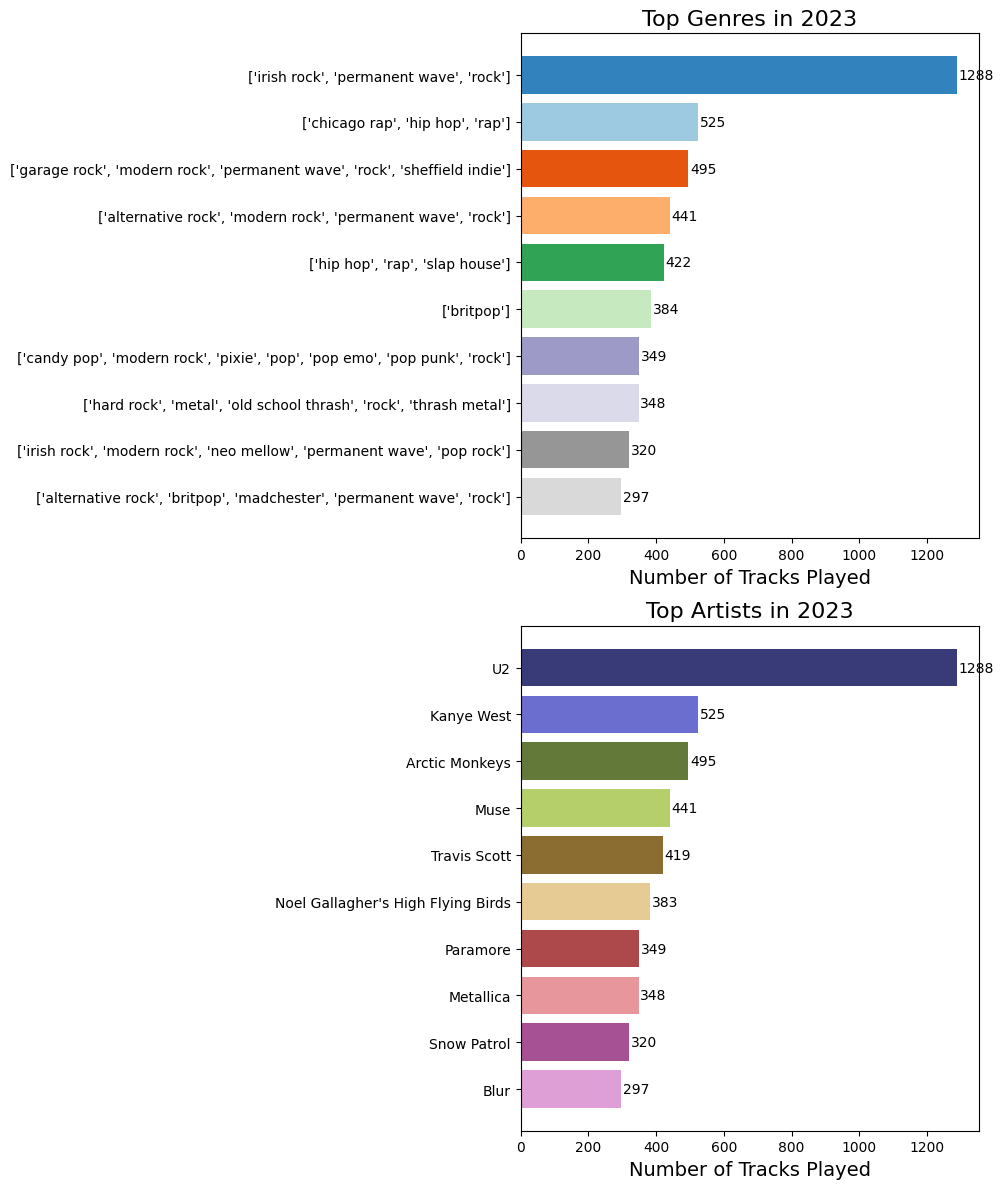

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Ensure 'date' is in datetime format
spotify_data['date'] = pd.to_datetime(spotify_data['date'])

# Consolidate genres into broader categories for clarity
spotify_data['consolidated_genres'] = spotify_data['genres'].replace(regex={
    r'.*Rock.*': 'Rock',
    r'.*Rap.*': 'Rap',
    r'.*Hip Hop.*': 'Hip Hop',
    r'.*Pop.*': 'Pop'
})

# Calculate top genres and artists
top_consolidated_genres = spotify_data['consolidated_genres'].value_counts().head(10)
top_artists = spotify_data['artistName'].value_counts().head(10)

# Define colors for the plots for visual appeal
genre_colors = plt.cm.tab20c(np.linspace(0, 1, len(top_consolidated_genres)))
artist_colors = plt.cm.tab20b(np.linspace(0, 1, len(top_artists)))

# Create the plots with improved aesthetics
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Refined Top Genres Bar Chart
axes[0].barh(top_consolidated_genres.index, top_consolidated_genres.values, color=genre_colors)
axes[0].set_title('Top Genres in 2023', fontsize=16)
axes[0].set_xlabel('Number of Tracks Played', fontsize=14)
axes[0].invert_yaxis()  # Display the highest value at the top
for i, v in enumerate(top_consolidated_genres.values):
    axes[0].text(v + 5, i, str(v), color='black', va='center', fontsize=10)

# Refined Top Artists Bar Chart
axes[1].barh(top_artists.index, top_artists.values, color=artist_colors)
axes[1].set_title('Top Artists in 2023', fontsize=16)
axes[1].set_xlabel('Number of Tracks Played', fontsize=14)
axes[1].invert_yaxis()  # Display the highest value at the top
for i, v in enumerate(top_artists.values):
    axes[1].text(v + 5, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Optionally, save the refined plots as SVG
refined_svg_path_top_genres = 'refined_top_genres_2023.png'
refined_svg_path_top_artists = 'refined_top_artists_2023.png'
fig.savefig(refined_svg_path_top_genres, format='png')
fig.savefig(refined_svg_path_top_artists, format='png')


# Cumulative Listening Time

In this analysis, I delve into the cumulative listening time of my Spotify streaming history using the dataset `streaming_history_with_audio_features_categorized.csv`. This dataset contains detailed listening information, including date and minutes played per track.

### Detailed Explanation

1. **Initialization**: 
   - I start the analysis by loading the CSV file into a pandas DataFrame named `spotify_data_dataframe`. 

2. **Data Type Standardization**: 
   - Next, I ensure that the 'date' column is correctly formatted as a datetime object using `pd.to_datetime()`. This conversion is crucial for precise time analysis and aggregation of listening data.

3. **Cumulative Listening Calculation**: 
   - I proceed to then compute the cumulative listening time by grouping the dataset by date and summing up the 'minutesPlayed' for each day. Utilizing `cumsum()` this generates a series representing the total minutes listened to over time, capturing the accumulation of  my overall listening over time.

4. **Visualization**: 
   - To represent the cumulative listening time, I set up a plot with a specified figure size (14 by 7 inches) to ensure clarity.  I then plot the cumulative listening time series, configuring the plot with a title ('Cumulative Listening Time'), and labels for the x-axis ('Date') and y-axis ('Total Minutes Played'). This  showcases the cumulative listening trend over time and improves readability through labelling and sizing.

5. **Display**: 
   - Finally, I display the plot using `plt.show()`, offering a visual representation of my listening habits over time. This visualization effectively highlights the overall trend in my Spotify listening.



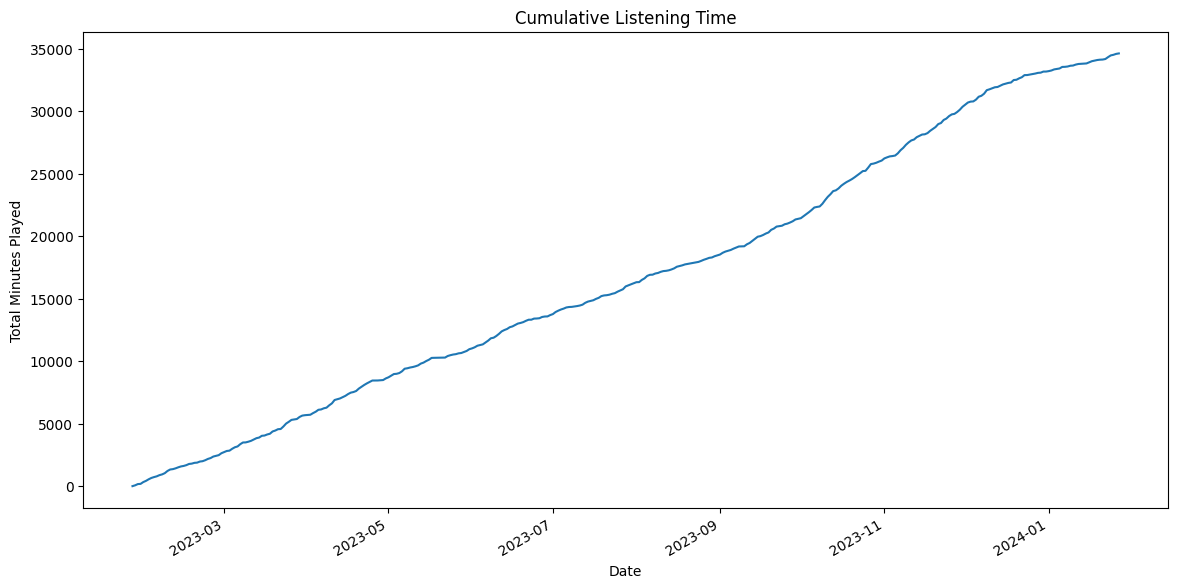

In [17]:
# Reading in my CSV file containing my spotify data
spotify_data_dataframe = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Making sure that the 'endTime' column is of the correct dataType being a date
spotify_data_dataframe['date'] = pd.to_datetime(spotify_data_dataframe['date'])
cumulative_listening = spotify_data_dataframe.groupby('date')['minutesPlayed'].sum().cumsum()

plt.figure(figsize=(14, 7))
cumulative_listening.plot()
plt.title('Cumulative Listening Time')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.show()

## Maps

 I utilize `pandas`, `matplotlib`, and the `Basemap` toolkit from `mpl_toolkits.basemap` to create an interactive map visualization. The aim of this was to show my artist distribution based on my personal Spotify listening history. 

### Implementation Details

1. **Library Imports**: 
   - I imported the  necessary libraries: `pandas` for data manipulation, `matplotlib.pyplot` for plotting, and `Basemap`. These libraries serve as the backbone, empowering the script to read CSV files and craft geographic visualizations.

2. **Dataframe Preparation**: 
   - I then read in the artist data, including geographic coordinates, from the updated CSV file (`Updated_artist_data_with_coordinates.csv`) into a DataFrame named `artist_dataframe`.

3. **Map Initialization**: 
   - A figure and axis are conjured with `matplotlib`, followed by initializing a `Basemap` object. This map adopts the Mercator projection, creating the entire globe within specified latitude and longitude boundaries. The map's resolution is set to 'c' (crude), balancing detail for better performance.

4. **Geographic Features Rendering**: 
   - I proceed to then render the geographic features such as coastlines, country borders, and fill continents with a black color and lakes with light blue.

5. **Coordinate Conversion and Plotting**: 
   - Latitude and longitude values from the `artist_dataframe` are translated into x and y coordinates compatible for map projection. These coordinates are then employed to plot points denoting artist locations, distinguishably marked in green against the map backdrop.

6. **Output and Display**: 
   - The map is then saved as a high-resolution PNG file (`map_of_artists.png`), keeping the visualization for future reference or to add to the report. The map is displayed using `plt.show()`,




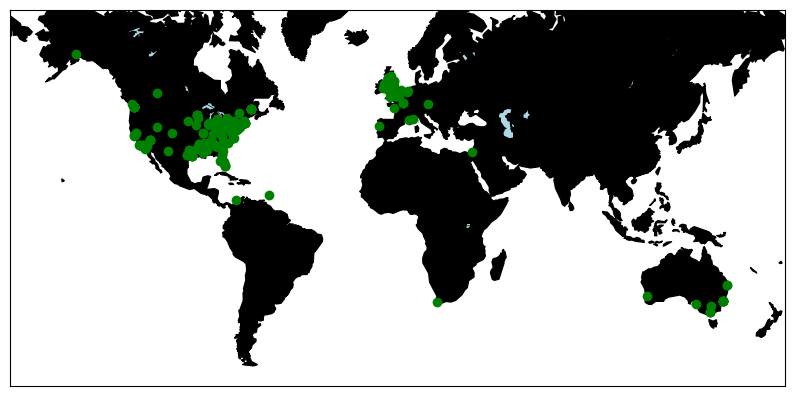

In [5]:
# The goal of the map is to be interactive and apply a greater visualization as to who I listen to, 
# I personally feel that it's a missed opportunity as this could potentially be applied to everyone using my methods
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap

# Importing all of the libraries I need to read in the CSV file and also to create the map
artist_dataframe = pd.read_csv('Updated_artist_data_with_coordinates.csv')

# Creating a map to plot the points
fig, ax = plt.subplots(figsize=(10, 20))
map = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=70, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='black', lake_color='lightblue')

# Convert latitude and longitude to x and y coordinates
x, y = map(artist_dataframe['longitude'].values, artist_dataframe['latitude'].values)

# Plot the points on the map
map.scatter(x, y, marker='o', color='green', zorder=5)

plt.savefig('map_of_artists.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

## Geo Map

In addressing the limitations of static maps for comprehensive music artist distribution analysis, I tried  utilizing the `folium` library to craft an interactive map. I wanted enhanced interactivity, accessibility for colorblind users, and the ability to convey richer information at first glance—and even more upon user interaction.

### Strategic Approach

1. **Library Utilization**: 
   - I began by importing the `folium` library, alongside `pandas`,  for interactive mapping and efficient data manipulation. `Folium` was chosen for its interactive mapping capabilities.

2. **Data Preparation**: 
   - The Artist location data, including longitude and latitude, was loaded from the CSV file (`Updated_artist_data_with_coordinates.csv`) into `artist_dataframe`.

3. **Map Initialization**: 
   - I created a `folium.Map` object, centered around the mean latitude and longitude of the artists in the dataframe. The `zoom_start` parameter was set to 2, providing a global view while allowing users to zoom in for details.

4. **Marker Placement**: 
   - Iterating through the dataframe, I placed markers for each artist, ensuring that only entries with valid latitude and longitude values were included. Each marker was configured with a popup containing the artist's name and location details (City, State, Country), enriching the map with informative tooltips that enhance user engagement.

5. **Map Saving and Launching**: 
   - The completed map was saved as an HTML file (`artist_map.html`), allowing for easy access. This HTML file could be opened at any time, providing a persistently accessible, interactive visualization.

6. **Accessibility Consideration**: 
   - Using `folium`, the script  adopted a visualization approach that is more accommodating to users with color vision deficiencies. The interactive nature of `folium` maps allows for customizing color schemes and marker designs to further improve accessibility.

7. **Interactive Visualization**: 
   - I made the interactive map available for immediate viewing, emphasizing a user-centric design philosophy. This improved upon the static mapping approach by offering a dynamic, engaging user experience that not only presented geographic artist distribution but also invited exploration and interaction.


In [9]:
# This map is a fine launchpad, but it doesn't show us anything 
# I went to find better libraries that offer the following
# Interactivity: I want the map to be interactive
# Suitable to users who are colourblind: An aspect of visualizations that is often overlooked is how visually impaired people view them
# Provide more information from a first glance, an even more when the user interacts with the visualization 

# Creating a map using the folium library so its more interactive
# Importing the folium library
import folium
import pandas as pd

# Creating a dataframe for the CSV file containing the longitude and latitude
artist_dataframe = pd.read_csv('Updated_artist_data_with_coordinates.csv')

# Initializing the map object 'Folium'
map_object_intialization = folium.Map(location=[artist_dataframe['latitude'].mean(), artist_dataframe['longitude'].mean()], zoom_start=2)

# Adding points to the map, the longitude and latitude 
for index, row in artist_dataframe.iterrows():
    if not pd.isna(row['latitude']) and not pd.isna(row['longitude']):
        folium.Marker([row['latitude'], row['longitude']], 
                      popup=f"{row['artistName']}<br>{row['City']}, {row['State']}, {row['Country']}").add_to(map_object_intialization)

# Saving the map to a HTML file that will be saved on the current directory which can be launched by the script automatically
# HTML File can also be accessed at any time
geo_map_plot = 'artist_map.html'
map_object_intialization.save(geo_map_plot)

# Launching the interactive map HTML file
geo_map_plot

'artist_map.html'

### Execution Breakdown

1. **Importing Essential Libraries**: 
   - I loaded the necessary libraries:
     - `matplotlib.pyplot` for plotting functionalities,
     - `cartopy.crs` and `cartopy.feature` for geographic mapping capabilities,
     - `pandas` for efficient data manipulation.

2. **Data Acquisition**: 
   - Two atasets are loaded:
     - `artist_data_df`, aligning artists with their geographical locations,
     - `streaming_history_df`, documenting the user's Spotify streaming activities.

3. **Merging Data**: 
   - These datasets are merged based on the artist names, enriching the streaming history with precise location data of each artist listened to.

4. **Curating Data for Analysis**: 
   - The merged dataset is filtered to isolate listens from January 2023, removing any records lacking coordinate data to ensure all points are geographically plottable.

5. **Map Configuration**: 
   - A map is configured using `cartopy` with a PlateCarree projection, with detailed geographic features such as landmasses, oceans, coastlines, and national borders, providing a comprehensive backdrop for the visualization.

6. **Listening Journey Visualization**: 
   - I plotted the lines connecting the sequence of artist locations listened to, showing my musical journey. This step is central to transforming the data into a geographic narrative of listening habits.

7. **Map Customization**: 
   - Adjustments are made to the map's extent, focusing on regions pertinent to the listening data, thereby optimizing the visual representation.

8. **Visualization Output**: 
   - The map is then saved as a PNG file showing my January 2023 listening journey in a singular, informative graphic.



Both dataframes have been successfully merged


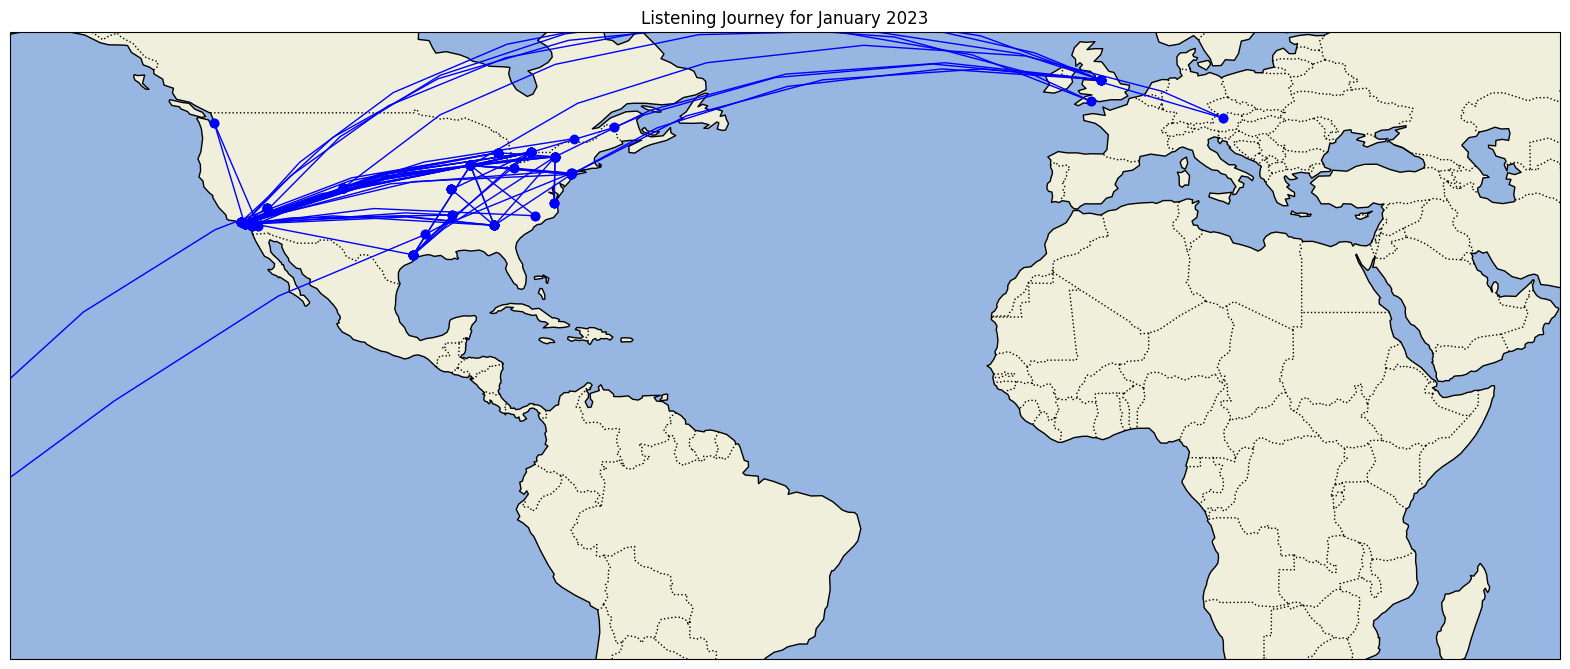

In [4]:
# Loading in the necessary libraries
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Loading in both of the datasets
# The co-ordinates are stored in one dataframe

artist_data_df = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history_df = pd.read_csv("streaming_history_with_audio_features_categorized.csv")

# Merging both datasets so that the streaming history dataframe has the co-ordinates of each artist 
merged_df = pd.merge(streaming_history_df, artist_data_df[['artistName', 'latitude', 'longitude']], on='artistName', how='left')

# Print statement to make sure that the merge was successful
print('Both dataframes have been successfully merged')

# Filter the dataset for January
january_listens = merged_df[merged_df['date'].str.startswith('2023-01')]

# Remove rows with missing coordinates to avoid errors in plotting
january_listens = january_listens.dropna(subset=['latitude', 'longitude'])

# Setting up the plot with a cartographic projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Iterate through the filtered DataFrame and draw lines between consecutive locations
for i in range(len(january_listens) - 1):
    start_lat = january_listens.iloc[i]['latitude']
    start_lon = january_listens.iloc[i]['longitude']
    end_lat = january_listens.iloc[i+1]['latitude']
    end_lon = january_listens.iloc[i+1]['longitude']
    
    # Plotting the line connecting the two points
    ax.plot([start_lon, end_lon], [start_lat, end_lat], color="blue", linewidth=1, marker='o', transform=ccrs.Geodetic())

# Adjust the extent of the map to better fit your data points or use ax.set_global() to show the whole world
ax.set_extent([-150, 60, -25, 60], crs=ccrs.PlateCarree())

plt.savefig('listening_journey.png', format='png', dpi=300, bbox_inches='tight')

plt.title('Listening Journey for January 2023')
plt.show()


In [12]:
import folium
import pandas as pd

# Load the datasets
artist_data_df = pd.read_csv('Updated_artist_data_with_coordinates_genres.csv')
streaming_history_df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Merge the two datasets to add coordinates to the streaming history
merged_df = pd.merge(streaming_history_df, artist_data_df[['artistName', 'latitude', 'longitude']], on='artistName', how='left')

# Filter the merged dataset for entries from January
january_listens = merged_df[merged_df['date'].str.startswith('2023-01')]

# Remove rows with missing coordinates to avoid errors in plotting
january_listens = january_listens.dropna(subset=['latitude', 'longitude'])

# Initialize a map centered around the average latitude and longitude
average_lat = january_listens['latitude'].mean()
average_lon = january_listens['longitude'].mean()
m = folium.Map(location=[average_lat, average_lon], zoom_start=2)

# Define a list of colors to cycle through
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add lines with different colors
locations = january_listens[['latitude', 'longitude']].values.tolist()
# Use the modulo operator to cycle through the color list
for i, (start, end) in enumerate(zip(locations, locations[1:])):
    folium.PolyLine([start, end], color=colors[i % len(colors)], weight=2.5, opacity=1).add_to(m)

# Add markers with custom colors and popups
for idx, row in january_listens.iterrows():
    # Use the modulo operator to cycle through the color list for markers
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Artist: {row['artistName']}\nTrack: {row['trackName']}\nDate: {row['date']}",
        icon=folium.Icon(color=colors[idx % len(colors)], icon='music')
    ).add_to(m)

# Save to an HTML file
m.save('cartopy_streaming_history_interactive_map.html')


## Listening Heat Map

This script demonstrates the creation of an interactive listening heatmap, leveraging `pandas`, `seaborn`, `matplotlib.pyplot`, and `plotly.express`. The heatmap visualizes my Spotify streaming data to illustrate patterns in my listening behavior across different hours of the day and days of the week.

### Detailed Workflow

1. **Data Preparation**: I start by loading Spotify streaming data from the CSV file into a `pandas` DataFrame.

2. **Date-Time Conversion**: The 'endTime' column is converted to a datetime object to facilitate extraction of the hour and day of the week, enabling time-based analysis of listening patterns.

3. **Data Extraction and Aggregation**: New columns for the hour and day of the week are created based on the 'endTime' column. The data is then aggregated to calculate the total minutes played for each hour across different days, providing a foundation for the heatmap.

4. **Pivot Table Creation**: A pivot table is generated from the aggregated data, organizing total listening time by day of the week and hour of the day. 

5. **Day Sorting**: The days of the week in the pivot table is then sorted in chronological order, ensuring that the heatmap reflects the week.

6. **Heatmap Visualization**: Using `plotly.express`, an interactive heatmap is created from the pivot table. The heatmap uses color intensities to represent total minutes played, offering n visualization of when listening activity peaks during the week.

7. **Customization and Display**: The heatmap is then customized with labels for axes and the color scale, and a title is added for clarity. The interactive nature of the heatmap, facilitated by `plotly.express`, allows for potential users to explore data points in detail.

8. **Output Generation**:  the interactive heatmap is shown to the user and saving the visualization both as an HTML file for interactive use and as a PNG image for static viewing.



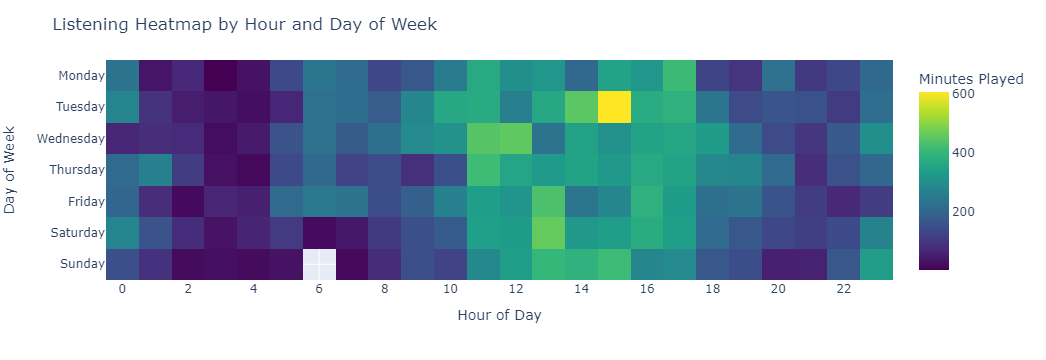

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Reading in my CSV file containing my spotify data
spotify_data_dataframe = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Making sure that the 'endTime' column is of the correct dataType being a date
spotify_data_dataframe['endTime'] = pd.to_datetime(spotify_data_dataframe['endTime'])

# Extracting the time from the endTime column
spotify_data_dataframe['hour'] = spotify_data_dataframe['endTime'].dt.hour
spotify_data_dataframe['day_of_week'] = spotify_data_dataframe['endTime'].dt.day_name()

# Aggregate data to get total listening time for each hour and day of the week
pivot_table = spotify_data_dataframe.pivot_table(values='minutesPlayed', index='day_of_week', columns='hour', aggfunc='sum')

# Sort the days of the week in order
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(sorter)

# Create the interactive heatmap
fig = px.imshow(pivot_table, 
                labels=dict(x="Hour of Day", y="Day of Week", color="Minutes Played"),
                x=list(pivot_table.columns), 
                y=list(pivot_table.index),
                aspect="auto",
                color_continuous_scale=px.colors.sequential.Viridis)

# Add title and adjust layout
fig.update_layout(title='Listening Heatmap by Hour and Day of Week',
                  xaxis_nticks=24)
# Show the figure
fig.show()
# Save the figure as an HTML file
fig.write_html("listening_heatmap.html")
fig.write_image("listening_heatmap.png", width=800, height=600)

## 3D Heatmap

This script uses `pandas` for data manipulation and `plotly.graph_objects` for advanced visualization to create a 3D heatmap of Spotify streaming data. The goal was to visualize the total listening time across different hours of the day and days of the week, providing a comprehensive overview of listening habits in a dynamically interactive format.

### Process Breakdown

1. **Data Preparation**: The Spotify streaming data is loaded from the CSV file into a pandas DataFrame. ensuring the 'endTime' column is correctly formatted as a datetime object, facilitating temporal analyses.

2. **Time Extraction**: From the 'endTime' column, the script extracts the hour of the day and the name of the day of the week. These extractions allow for the categorization of listening times by specific time slots and days, essential for creating the heatmap.

3. **Data Aggregation**: The script aggregates the data to calculate the total listening time for each combination of hour and day of the week. This step involves creating a pivot table, which restructures the data into a format suitable for visualization.

4. **Ordering Days of the Week**: To ensure logical sequencing, the pivot table is reindexed according to the chronological order of days, starting from Monday and ending on Sunday. This reordering aligns with the conventional week layout, improving the intuitiveness of the heatmap.

5. **3D Heatmap Construction**: Utilizing `plotly.graph_objects`, the python script constructs a 3D surface plot. This visualization maps the total listening minutes onto a 3D space defined by the hour of the day, the day of the week, and the listening time magnitude. The 'Viridis' colorscale is applied for visual distinction of different listening intensities.

6. **Layout Optimization**: The layout is fine-tuned to enhance readability and interpretability. Titles for the axes are set to clearly indicate the dimensions of the plot, and custom tick labels are applied to the y-axis to represent the days of the week accurately.

7. **Visualization and Exporting**: The script displays the interactive 3D heatmap, users can then explore the data dynamically. the visualization is saved as a HTML and PNG formats, providing options for sharing and offline viewing.



#### Code Reference

The inspiration for this plot came from the following resource: [Plotly 3D Surface Plots](https://plotly.com/python/3d-surface-plots). habits over time.


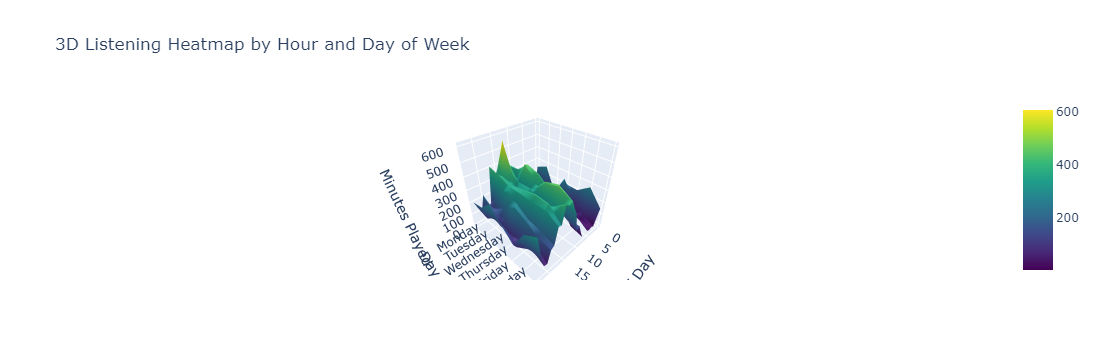

In [18]:
import pandas as pd
import plotly.graph_objects as go

# Reading in my CSV file containing my spotify data
spotify_data_dataframe = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Making sure that the 'endTime' column is of the correct dataType being a date
spotify_data_dataframe['endTime'] = pd.to_datetime(spotify_data_dataframe['endTime'])

# Extracting the time from the endTime column
spotify_data_dataframe['hour'] = spotify_data_dataframe['endTime'].dt.hour
spotify_data_dataframe['day_of_week'] = spotify_data_dataframe['endTime'].dt.day_name()

# Aggregate data to get total listening time for each hour and day of the week
pivot_table = spotify_data_dataframe.pivot_table(values='minutesPlayed', index='day_of_week', columns='hour', aggfunc='sum')

# Sort the days of the week in order
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(sorter)

# Create the 3D Surface Plot
fig = go.Figure(data=[go.Surface(z=pivot_table.values, 
                                 x=pivot_table.columns, 
                                 y=[i for i, _ in enumerate(sorter)],
                                 colorscale='Viridis')])

# Update the layout to improve readability
fig.update_layout(title='3D Listening Heatmap by Hour and Day of Week',
                  scene=dict(
                      xaxis_title='Hour of Day',
                      yaxis_title='Day of Week',
                      yaxis=dict(tickvals=list(range(len(sorter))), ticktext=sorter),
                      zaxis_title='Minutes Played'))

fig.show()
# Writing to a HTML file
fig.write_html('3D_Listening_Heatmap.html')
# Writing to a PNG
fig.write_image('3D_listening_heatmap.png')
# Writing to a CSV file
fig.write_image('3D_listening_heatmap.svg')

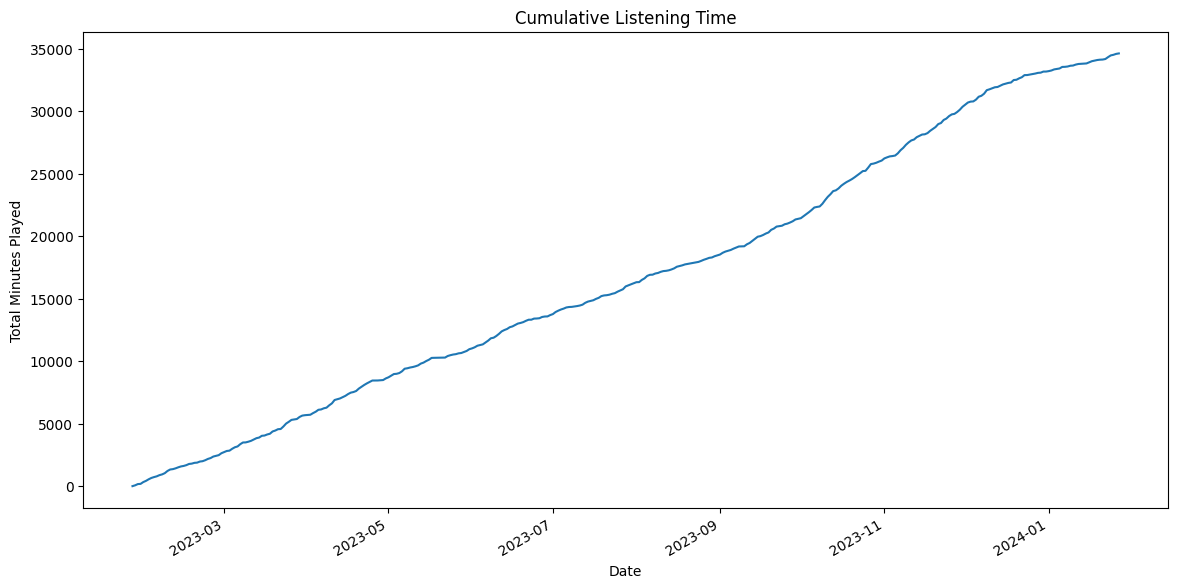

In [11]:
# Reading in my CSV file containing my spotify data
spotify_data_dataframe = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Making sure that the 'endTime' column is of the correct dataType being a date
spotify_data_dataframe['date'] = pd.to_datetime(spotify_data_dataframe['date'])
cumulative_listening = spotify_data_dataframe.groupby('date')['minutesPlayed'].sum().cumsum()

plt.figure(figsize=(14, 7))
cumulative_listening.plot()
plt.title('Cumulative Listening Time')
plt.xlabel('Date')
plt.ylabel('Total Minutes Played')
plt.show()

## Radar Chart

This script creates a radar chart using `pandas`, `numpy`, and `matplotlib` to visualize Spotify streaming data across different days of the week. The goal is to depict the total listening time for each day 

### Detailed Procedure

1. **Data Ingestion**: The process begins with loading the Spotify streaming history from a CSV file into a pandas DataFrame. This step ensures that the dataset is ready for manipulation and analysis.

2. **Data Categorization**: The 'day_of_week' column is converted to a categorical type with days ordered from Monday to Sunday. This conversion is crucial for maintaining the logical sequence of days when plotting the data on the radar chart.

3. **Data Aggregation**: We then aggregate the listening time by day of the week, summing up the total minutes played for each day. This aggregation forms the basis of the data points that will be represented on the radar chart.

4. **Variable Preparation and Angle Calculation**: The number of variables (days of the week) to plot is decided, the angles are then calculated to evenly distribute them along the radar chart's circumference. 

5. **Completing the Loop**: To create a continuous radar chart, the start point is appended to the end of the values list, ensuring the plot forms a closed loop. This method is applied to both the values (listening time) and the angles.

6. **Chart Construction**: A radar chart is then constructed with a polar subplot, using the calculated angles and listening times. The chart is filled with red for visual emphasis, and a line is plotted along the same points to outline the data's shape.

7. **Customization**: The chart is then further customized by setting the x-ticks to the angles calculated earlier and labeling them with the days of the week. Y-tick labels are removed for clarity, and a title is added to communicate the chart's purpose.

8. **Export and Display**: The finalized radar chart is saved as a PNG file, and then displayed to the user. This visualization effectively communicates the distribution of listening time across the week in a compact and engaging format.


C:\Users\edwar\AppData\Local\Temp\ipykernel_4388\4242532012.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



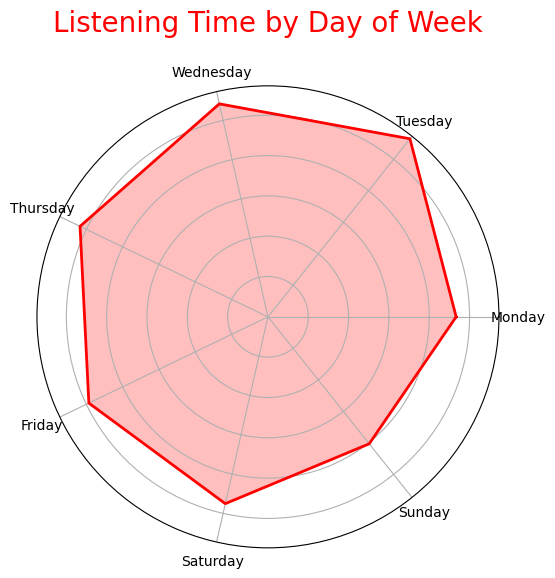

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in the dataset
spotify_data_dataframe = pd.read_csv('streaming_history_with_genres.csv')

# Make sure 'day_of_week' is a categorical type with the days in order
spotify_data_dataframe['day_of_week'] = pd.Categorical(spotify_data_dataframe['day_of_week'],
                                                       categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                       ordered=True)

# Prepare data
listening_by_day = spotify_data_dataframe.groupby('day_of_week')['minutesPlayed'].sum()

# Number of variables we're plotting.
num_vars = len(listening_by_day)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start to the end.
values = listening_by_day.values.flatten().tolist()
values += values[:1]
angles += angles[:1]

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)  # Change the color if you want
# Define the ticks for the radial axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(listening_by_day.index)

# Remove y-tick labels and add title
ax.set_yticklabels([])
ax.set_title('Listening Time by Day of Week', size=20, color='red', y=1.1)
plt.savefig("listening_time_radar_chart.png")

plt.show()

## Genre Distribution

### Detailed Workflow

1. **Data Loading**: I start by reading in the artist dataset from a CSV file named `Updated_artist_data_with_coordinates_genres.csv` into a pandas DataFrame. This dataset includes artist information along with their associated music genres.

2. **Data Transformation**: The 'genres' column, is converted into actual lists using the `literal_eval` function from the `ast` module. This transformation is crucial for the subsequent analysis, as it enables the direct manipulation of genre data.

3. **Genre Counting**: We then iterate over the genre lists for each artist, counting the occurrences of each genre. This involves aggregating genre data across all artists to determine the frequency of each genre within the dataset.

4. **Dataframe Creation**: For easier handling and visualization, the genre counts are transformed into a pandas DataFrame named `genre_counts_df`. This DataFrame is sorted by genre occurrence frequency in descending order to prioritize the most popular genres.

5. **Visualization**: Utilizing `matplotlib`, a bar plot is created to display the top 20 genres by their counts. The plot is created with a suitable figure size, labeled axes, and rotated x-axis labels for enhanced readability. The chosen color (`skyblue`) and plot title ('Top 20 Genres Distribution') aim to provide a clear and aesthetically pleasing representation of my genre popularity.

6. **Output and Display**: We then save the genre distribution plot as a PNG file named "Top_20_genres_distribution.png" for later. The plot is displayed to the user, showcasing the distribution of the top 20 genres within the dataset.


7. **Reference**: The idea for the code was obtained from the resources, W3Schools: https://www.w3schools.com/python/matplotlib_bars.aspSpotify artists.


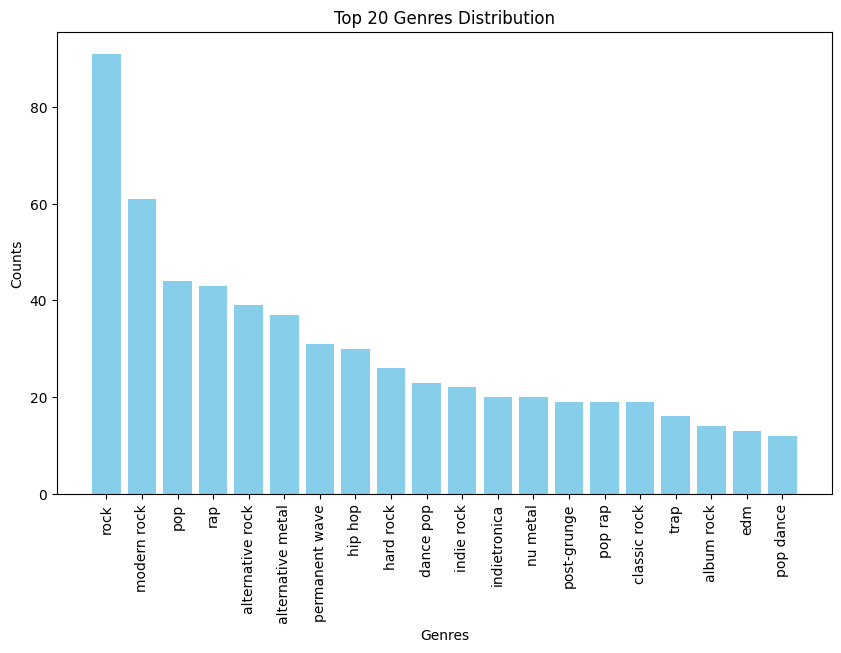

In [4]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

# Load the data again after the reset
artist_data_path = 'Updated_artist_data_with_coordinates_genres.csv'
artist_data = pd.read_csv(artist_data_path)

# Convert the 'genres' column from string representation of list to actual list
artist_data['genres'] = artist_data['genres'].apply(literal_eval)

# Extract genres and count their occurrences
genre_counts = {}
for genres in artist_data['genres']:
    for genre in genres:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert to a DataFrame for easier handling
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count']).sort_values('Count', ascending=False)


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_df['Genre'][:20], genre_counts_df['Count'][:20], color='skyblue')  # Limiting to top 20 genres for readability
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Top 20 Genres Distribution')
plt.savefig("Top_20_genres_distribution.png")
plt.show()


## Time Series Plots

### Workflow Summary

1. **Data Loading**: We start by importing the streaming history data from a CSV file named `streaming_history_with_audio_features_categorized.csv` into a pandas DataFrame. This file contains detailed records of listening sessions, including genres and listening dates.

2. **Data Transformation**:
   - The 'genres' column, is converted into actual Python lists. This conversion facilitates the handling of multiple genres associated with each listening session.
   - The 'date' column is transformed into datetime objects, enabling time series analysis by ensuring the dates are recognized for their temporal value.

3. **Aggregation**:
   - The DataFrame is grouped by date, and the 'minutesPlayed' for each day are summed up. This aggregation step compiles the total listening time per day.

4. **Visualization**:
   - With the data prepared, a time series plot is generated, mapping the date against the daily total listening time. The plot is styled with a 'dodgerblue' color for the line, representing the cumulative listening time across the dataset's timeframe.
   - Essential plot elements, such as the title, axes labels, and legend, are added. These elements enhance the plot's interpretability, ensuring the viewer can easily understand the depicted trends.
   - A grid is enabled to improve readability, and the layout is adjusted for optimal presentation of the data.

5. **Exporting and Displaying**:
   - The visualization is saved as a PNG file titled "overall_listening_over_time.png", allowing for reference.
   - the plot is displayed, showing the evolution of listening time across the dataset's span, offering insights into how my music consumption fluctuates over time.




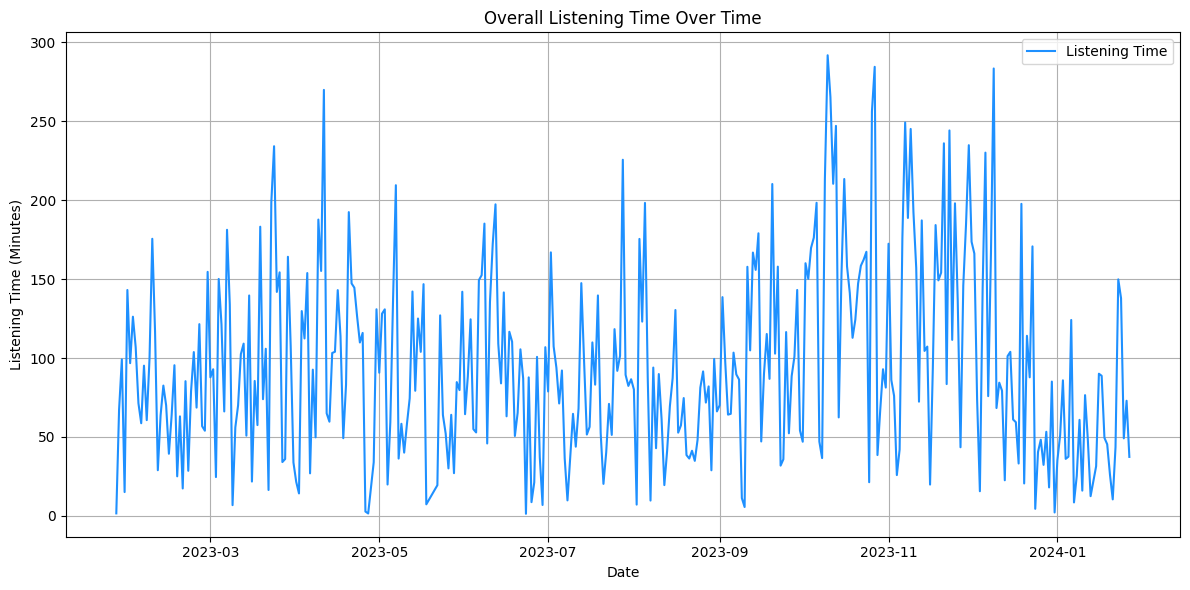

In [5]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

# Load the data
streaming_history_path = 'streaming_history_with_audio_features_categorized.csv'
streaming_history = pd.read_csv(streaming_history_path)

# Convert the 'genres' column from string representation of list to actual list
streaming_history['genres'] = streaming_history['genres'].apply(literal_eval)

# Convert the 'date' column to datetime objects
streaming_history['date'] = pd.to_datetime(streaming_history['date'])

# Sum the 'minutesPlayed' for each date
listening_time_daily = streaming_history.groupby('date')['minutesPlayed'].sum().reset_index()

# Plot the summed 'minutesPlayed' against the dates
plt.figure(figsize=(12, 6))
plt.plot(listening_time_daily['date'], listening_time_daily['minutesPlayed'], label='Listening Time', color='dodgerblue')
plt.title('Overall Listening Time Over Time')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')
plt.legend()
plt.grid(visible=True)
plt.tight_layout()
plt.savefig("overall_listening_over_time.png")
plt.show()


## Decomposition

This script provides a detailed walkthrough on loading Spotify streaming data, preparing it for time series analysis, and performing a seasonal decomposition to uncover underlying patterns in listening habits. Utilizing `pandas` for data manipulation, `statsmodels` for statistical analysis, and `matplotlib` for visualization, it aims to dissect the components of the data, revealing trend, seasonal, and residual elements.

### Analysis Steps

1. **Data Preparation**:
   - The process starts with importing the Spotify streaming history from a CSV file into a pandas DataFrame. This initial step sets the foundation for the subsequent analysis.
   - The 'endTime' column is converted into datetime objects and set as the DataFrame's index, facilitating time-based analysis and ensuring that the data is organized chronologically.

2. **Data Aggregation**:
   - To account for duplicate entries (songs played multiple times on the same day), the data is grouped by the index (date) and summed up. This consolidation results in a daily sum of 'minutesPlayed', providing a clean dataset for further analysis.

3. **Weekly Resampling**:
   - The daily data is resampled to a weekly frequency, summing the 'minutesPlayed' for each week. This step reduces the dataset's granularity to focus on broader temporal trends and patterns.

4. **Seasonal Decomposition**:
   - Before performing the decomposition, the script checks if there are enough data points (at least 8, for two cycles of a 4-week period) to conduct a meaningful analysis.
   - Assuming sufficient data, it employs `seasonal_decompose` from the `statsmodels` library to decompose the weekly data into trend, seasonal, and residual components. The decomposition model is specified as 'additive', suitable for linear relationships where seasonal variations are relatively constant over time.

5. **Visualization and Output**:
   - The decomposition results are visualized in a multi-plot layout, showcasing the original data alongside its decomposed components. This visualization facilitates an in-depth understanding of the data's characteristics.
   - The layout and size of the figure are adjusted for clarity, and the resulting plot is saved as a PNG file named 'seasonal_decomposition.png'. This file serves as a static record of the decomposition analysis.
   - Finally, the plot is displayed, offering immediate insight into the time series' components, including any identifiable patterns or anomalies in the listening habits over time.

By conducting this seasonal decomposition, the script not only highlights the cyclic nature of Spotify streaming activity but also separates the data into interpretable components, allowing for a nuanced understanding of temporal dynamics within the dataset.


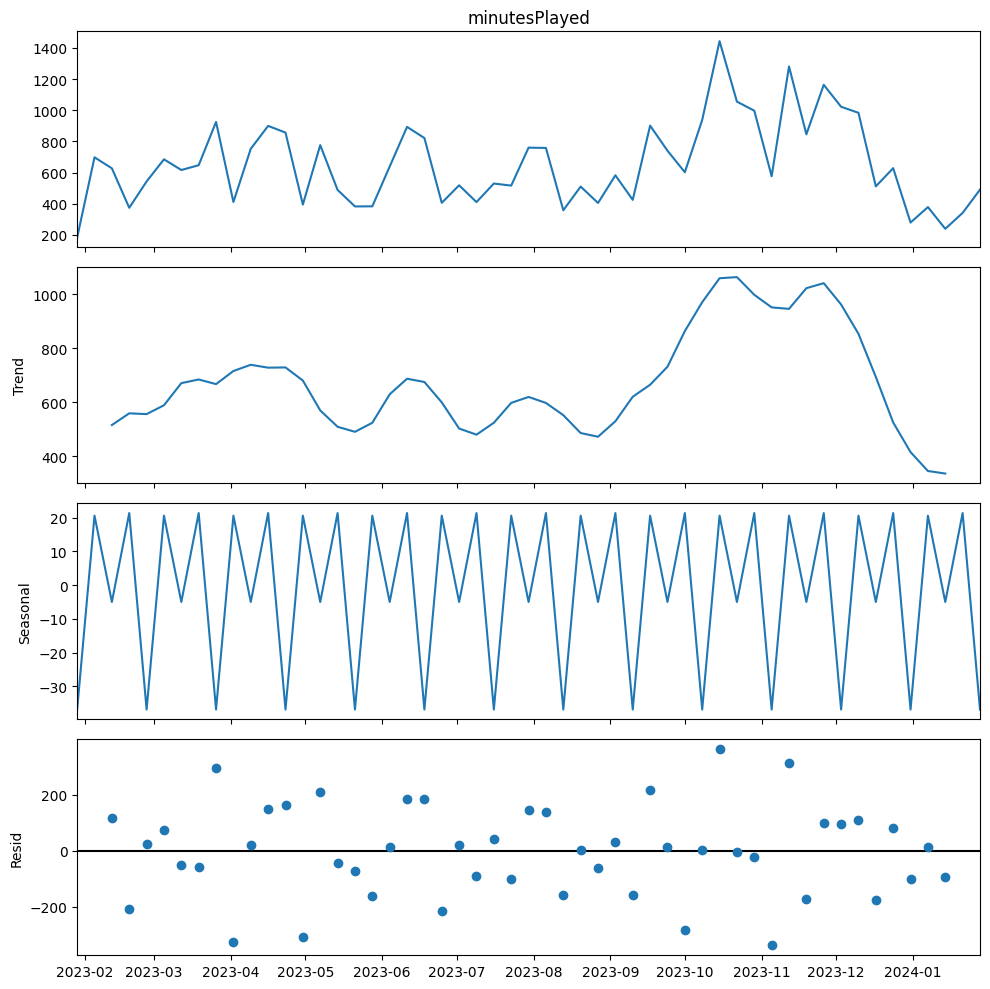

In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
file_path = 'streaming_history_with_audio_features_categorized.csv'
data = pd.read_csv(file_path)

# Convert the 'endTime' to a DateTime object and set it as the index
data['endTime'] = pd.to_datetime(data['endTime'])
data.set_index('endTime', inplace=True)

# Remove duplicates by summing up the minutes for songs played multiple times in one day
data = data.groupby(data.index).sum()

# Resample to weekly frequency
weekly_data = data['minutesPlayed'].resample('W').sum()

# Check if there's enough data points for a weekly decomposition with a period of 4
if len(weekly_data) >= 8:  # Minimum of 8 data points needed (2 cycles of a 4-week period)
    # Perform seasonal decomposition with a 4-week period
    decomposition = seasonal_decompose(weekly_data, model='additive', period=4)

    # Plot the decomposed components
    plt.rcParams.update({'figure.figsize': (10,10)})
    decomposition_plot = decomposition.plot()
    plt.savefig('seasonal_decomposition.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"Not enough data points for seasonal decomposition. Only {len(weekly_data)} weeks available.")


## Top 5 Genres Over Time

### Detailed Procedure

1. **Data Loading**: We start by importing the streaming history from a CSV file into a pandas DataFrame. This file includes detailed records of listening sessions, genres, and timestamps.

2. **Data Transformation**:
   - The 'genres' column, initially a string representation of lists, is converted into actual list objects using the `literal_eval` function. This step is crucial for processing the genres associated with each listening session.
   - The 'date' column is converted to datetime format, facilitating time-based aggregation and analysis.

3. **Identifying Top Genres**: 
   - The script explodes the 'genres' column to handle each genre separately, then proceeds to group the data by genre to sum the 'minutesPlayed' for each. This aggregation reveals the total listening time per genre.
   - It then tries to identify the top N (5 in this case) genres based on total listening time, focusing the analysis on these most prevalent genres.

4. **Aggregating Listening Time by Date**: 
   - For each of the top genres, the script again explodes the 'genres' column and calculates the sum of 'minutesPlayed' for each genre on each date. 
   - It filters this dataset to include only the top genres, preparing the data for visualization.

5. **Data Preparation for Plotting**:
   - The filtered data is pivoted to create a table with dates as rows, genres as columns, and listening times as values. Missing values are filled with 0 to ensure continuity in the visualization.

6. **Visualization**:
   - A series of line plots are generated, each representing one of the top genres. Distinct colors are assigned to each genre plot for visual differentiation.
   - The script dynamically adjusts the figure size based on the number of genres visualized, ensuring each subplot is clearly displayed.
   - Each plot is carefully labeled with the genre name, date, and listening time, alongside grid lines for enhanced readability.

7. **Output and Display**:
   - This collection of genre plots is saved as a single PNG file, allowing for easier reference in the future.
   - The visualizations are then displayed, offering a comprehensive view of how my listening time is distributed across the top genres over the dataset's timeframe.



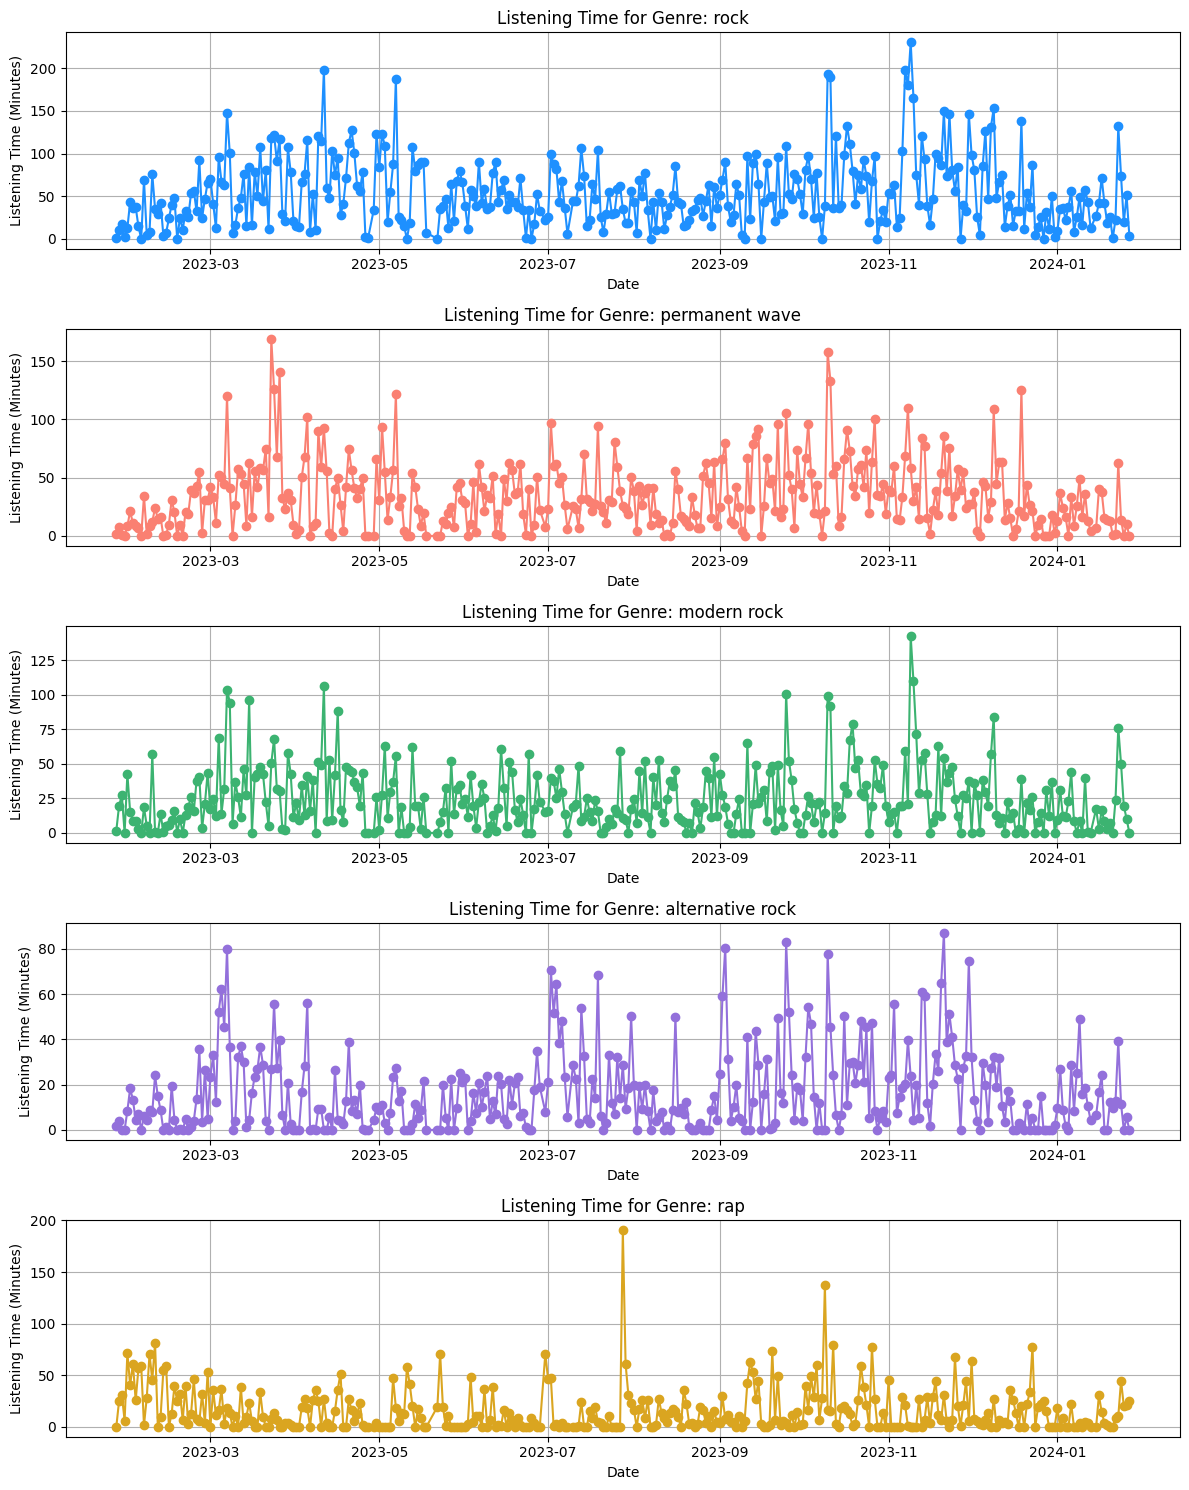

In [6]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

# Load the data
streaming_history_path = 'streaming_history_with_audio_features_categorized.csv'
streaming_history = pd.read_csv(streaming_history_path)

# Convert the 'genres' column from string representation of list to actual list
streaming_history['genres'] = streaming_history['genres'].apply(literal_eval)
streaming_history['date'] = pd.to_datetime(streaming_history['date'])

# Determine the top N genres
N = 5
genre_totals = streaming_history.explode('genres').groupby('genres')['minutesPlayed'].sum()
top_N_genres = genre_totals.nlargest(N).index.tolist()

# Sum the listening time for each of the top genres for each date
top_genres_daily = streaming_history.explode('genres').groupby(['date', 'genres'])['minutesPlayed'].sum().reset_index()
top_genres_daily = top_genres_daily[top_genres_daily['genres'].isin(top_N_genres)]

# Pivot the data for plotting
top_genres_pivot = top_genres_daily.pivot_table(index='date', columns='genres', values='minutesPlayed', fill_value=0)

# Define a list of distinct colors
colors = ['dodgerblue', 'salmon', 'mediumseagreen', 'mediumpurple', 'goldenrod']

# Check if we have enough colors, otherwise, repeat the list
if len(colors) < N:
    colors = (colors * (N // len(colors) + 1))[:N]

# Set up the figure size and layout
plt.figure(figsize=(12, 3 * N))  # Adjust height based on the number of subplots

# Iterate through each of the top N genres and create a separate plot with a different color
for i, genre in enumerate(top_N_genres, start=1):
    plt.subplot(N, 1, i)
    plt.plot(top_genres_pivot.index, top_genres_pivot[genre], marker='o', label=genre, color=colors[i-1])
    plt.title(f'Listening Time for Genre: {genre}')
    plt.xlabel('Date')
    plt.ylabel('Listening Time (Minutes)')
    plt.grid(visible=True)
    plt.tight_layout()
plt.savefig("listening_time_genres.png")
plt.show()


## Top 5 Genres Over Time

This script uses the `pandas`, `matplotlib`, and the `ast` module to analyze my Spotify streaming history data, visualizing my listening time across the top 5 genres. It provides an insightful look into my personal music preferences over time, showcasing the genres that dominate listening habits.

### Detailed Procedure

1. **Data Loading**: We start by importing the streaming history from a CSV file into a pandas DataFrame. This file includes detailed records of listening sessions, genres, and timestamps.

2. **Data Transformation**:
   - The 'genres' column,  is converted into actual list objects using the `literal_eval` function. .
   - The 'date' column is converted to datetime format, facilitating time-based aggregation and analysis.

3. **Identifying Top Genres**: 
   - The script explodes the 'genres' column to handle each genre separately, then groups the data by genre to sum the 'minutesPlayed' for each. This aggregation reveals the total listening time per genre.
   - The the next step is to identify the top N (5 in this case) genres based on total listening time, focusing the analysis on these most prevalent genres.

4. **Aggregating Listening Time by Date**: 
   - For each of the top genres, the script again explodes the 'genres' column and calculates the sum of 'minutesPlayed' for each genre on each date. 
   - the dataset is then filitered to include only the top genres, preparing the data for visualization.

5. **Data Preparation for Plotting**:
   - The filtered data is pivoted to create a table with dates as rows, genres as columns, and listening times as values. Missing values are filled with 0 to ensure continuity in the visualization.

6. **Visualization**:
   - A series of line plots are generated, each representing one of the top genres. Distinct colors are assigned to each genre plot for visual differentiation.
   - The script dynamically adjusts the figure size based on the number of genres visualized, ensuring each subplot is clearly displayed.
   - Each plot is carefully labeled with the genre name, date, and listening time, alongside grid lines for enhanced readability.

7. **Output and Display**:
   - The collection of genre plots is saved as a single PNG file
   - The visualizations are then displayed, offering a comprehensive view of how listening time is distributed across the top genres over the dataset's timeframe.



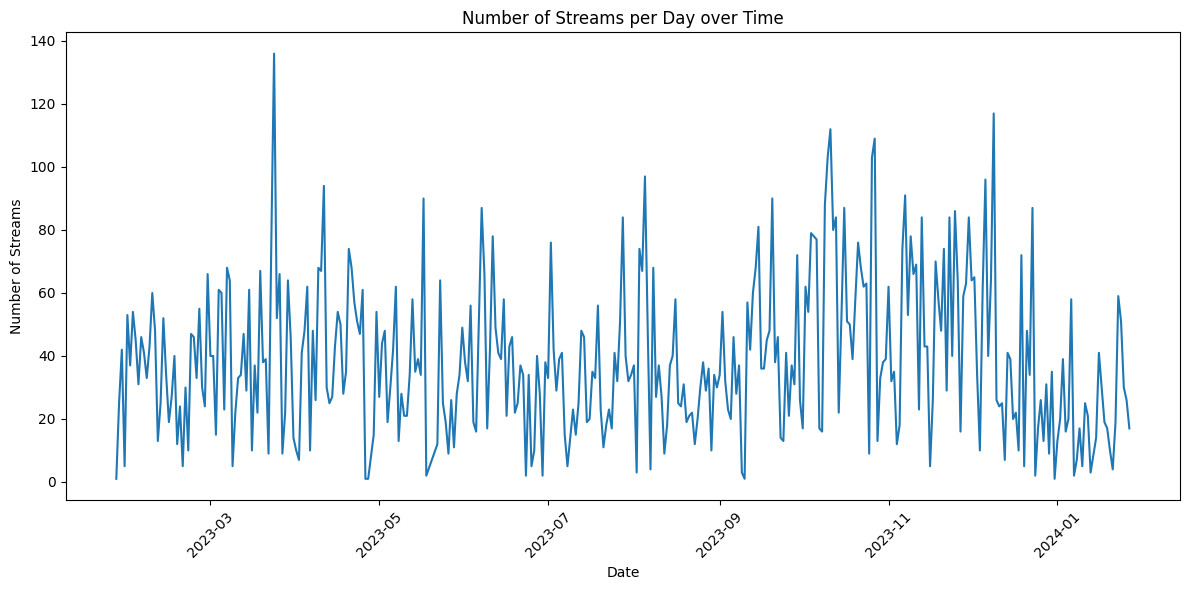

In [7]:
# Reading in the required libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading in both of the datasets
artist_data_dataframe = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history_dataframe = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Convert 'date' column to datetime format
streaming_history_dataframe['date'] = pd.to_datetime(streaming_history_dataframe['date'])

# Number of Streams per Day over Time
streams_per_day = streaming_history_dataframe.groupby('date').size()

# Distribution of Listening Duration Throughout the Day
listening_duration_by_hour = streaming_history_dataframe.groupby('hour')['minutesPlayed'].sum()

# Plotting Number of Streams per Day over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=streams_per_day.index, y=streams_per_day.values)
plt.title('Number of Streams per Day over Time')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("number_of_streams_per_day.png")
plt.show()

## Listening Distribution Throughout the Day

This script combines Python libraries to visualize the distribution of my Spotify listening duration throughout the day in a radial histogram / polar plot. Using `pandas` for data management and `matplotlib` for plotting, showcaing my streaming history into a compelling visual representation of daily listening patterns.

### Step-by-Step Analysis

1. **Data Preparation**:
   - We start by importing the Spotify streaming history and artist data from CSV files into pandas DataFrames. This foundational step enables the extraction and manipulation of relevant data points for analysis.
   - Crucial for time analysis, the 'hour' column within the streaming history DataFrame facilitates the aggregation of listening data by hour.

2. **Data Aggregation**:
   - We then proceed to aggregate the total listening duration (minutes played) for each hour, creating a dataset that reflects how my listening habits fluctuate over the course of a day.

3. **Visualization Setup**:
   - A figure is set up with a polar projection, chosen for its suitability to represent cyclical data—like the hours in a day—in a circular format, enhancing the intuitive understanding of daily patterns.
   
4. **Radial Histogram Creation**:
   - The visualization then divides the circle into 24 bins (one for each hour of the day), with the height of each bar representing the total listening duration for that hour.
   - Bars are then plotted on the polar axis, with their placement and width corresponding to the hours of the day, ensuring a clear and accurate depiction of when listening occurs.

5. **Customization and Enhancement**:
   - The plot is then further refined with labels for each hour and adjustments to the starting point and direction of the theta axis to align with conventional representations of time (midnight starting at the top and proceeding clockwise).
   - Additional customizations, including a title and grid lines, improve the plot's visuals and readability, making the data more accessible.

6. **Output and Display**:
   - The finalized radial histogram is saved as a PNG file, providing a static record of the analysis.
   - Displaying the plot reveals the daily rhythm of my Spotify listening activity, highlighting peak and trough periods of engagement.




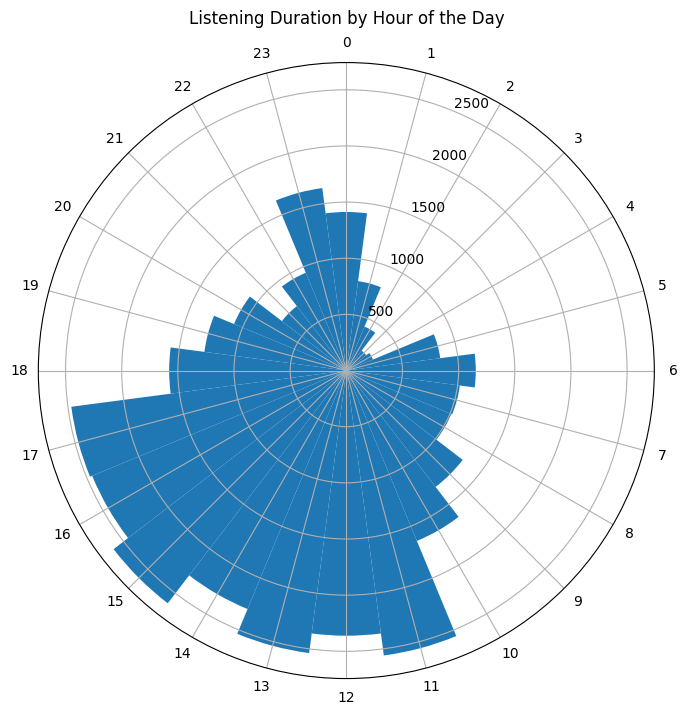

In [8]:
import numpy as np

# Assuming 'streaming_history_df' has a 'hour' column and a 'minutesPlayed' column
# Loading in both of the datasets
artist_data_df = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history_df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')


# Aggregate listening duration by hour
listening_duration_by_hour = streaming_history_df.groupby('hour')['minutesPlayed'].sum()

# Set up the figure for a radial histogram
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Compute the number of bins and the width of each bin
num_bins = 24
theta = np.linspace(0.0, 2 * np.pi, num_bins, endpoint=False)
width = (2*np.pi) / num_bins

# Create the bars for the radial histogram
bars = ax.bar(theta, listening_duration_by_hour, width=width, bottom=0.0)

# Set the direction of the zero angle
ax.set_theta_zero_location('N')

# Set the direction of rotation
ax.set_theta_direction(-1)

# Set the labels for each bin
ax.set_xticks(theta)
ax.set_xticklabels(range(24))

# Optional: Add customizations like grid, title, or adjusting the radius to improve visibility
ax.set_title('Listening Duration by Hour of the Day', va='bottom')
plt.savefig("radar_chart_listening_by_hour_of_day.png")
plt.show()


## Listening Habits Timeline 

This script exemplifies a meticulous approach to analyzing and visualizing Spotify streaming data, with a focus on identifying and plotting the listening habits for the top 5 consolidated genres over time. Utilizing `pandas` for data manipulation, `matplotlib` for visualization, and `ast` for data type conversion, it reveals insights into genre-based listening preferences.

### Comprehensive Workflow

1. **Data Preparation**:
   - The script begins by importing the necessary datasets, containing artist details and streaming history, into pandas DataFrames.
   - It introduces a new column, `genre_list`, which converts the 'genres' column from a string representation of lists to actual list objects, facilitating genre manipulation.

2. **Genre Consolidation**:
   - A custom function, `consolidate_rock`, is applied to each genre list, merging various sub-genres of rock into a singular 'Rock' category. This consolidation simplifies the genre landscape for clearer analysis.

3. **Genre Aggregation**:
   - The script flattens the consolidated genre lists, pairing each genre with its corresponding `minutesPlayed` to compile a comprehensive genre-duration dataset.
   - This dataset is then transformed into a DataFrame, from which the total listening minutes for each genre are calculated and sorted.

4. **Identifying Top Genres**:
   - The top 5 genres, based on total listening minutes, are identified. The original streaming history DataFrame is filtered to include only entries corresponding to these top genres.

5. **Data Aggregation and Transformation**:
   - Listening times are aggregated by date and genre, and the resultant dataset is pivoted to format dates as rows and genres as columns, with listening minutes as values. This pivot table forms the basis for visualization.

6. **Visualization**:
   - A time series plot is created, featuring lines for each of the top 5 consolidated genres, illustrating their listening minutes over the course of 2023.
   - The plot is enhanced with titles, axis labels, and a legend, alongside grid lines for improved readability. Date formatting is applied for clearer temporal representation.

7. **Output and Display**:
   - The figure's layout is adjusted for optimal presentation, and the final visualization is saved as a PNG file. This file offers a static record of the genre-based listening trends.
   - The visualization is then displayed, providing an insightful overview of how listening preferences for the top genres evolved throughout the year.

This analytical and visual procedure not only highlights the most prevalent music genres but also tracks their popularity over time, offering a nuanced view of changing listening habits within the dataset's scope.


C:\Users\edwar\AppData\Local\Temp\ipykernel_9976\1867701452.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streaming_top_consolidated_genres['date'] = pd.to_datetime(streaming_top_consolidated_genres['date'])


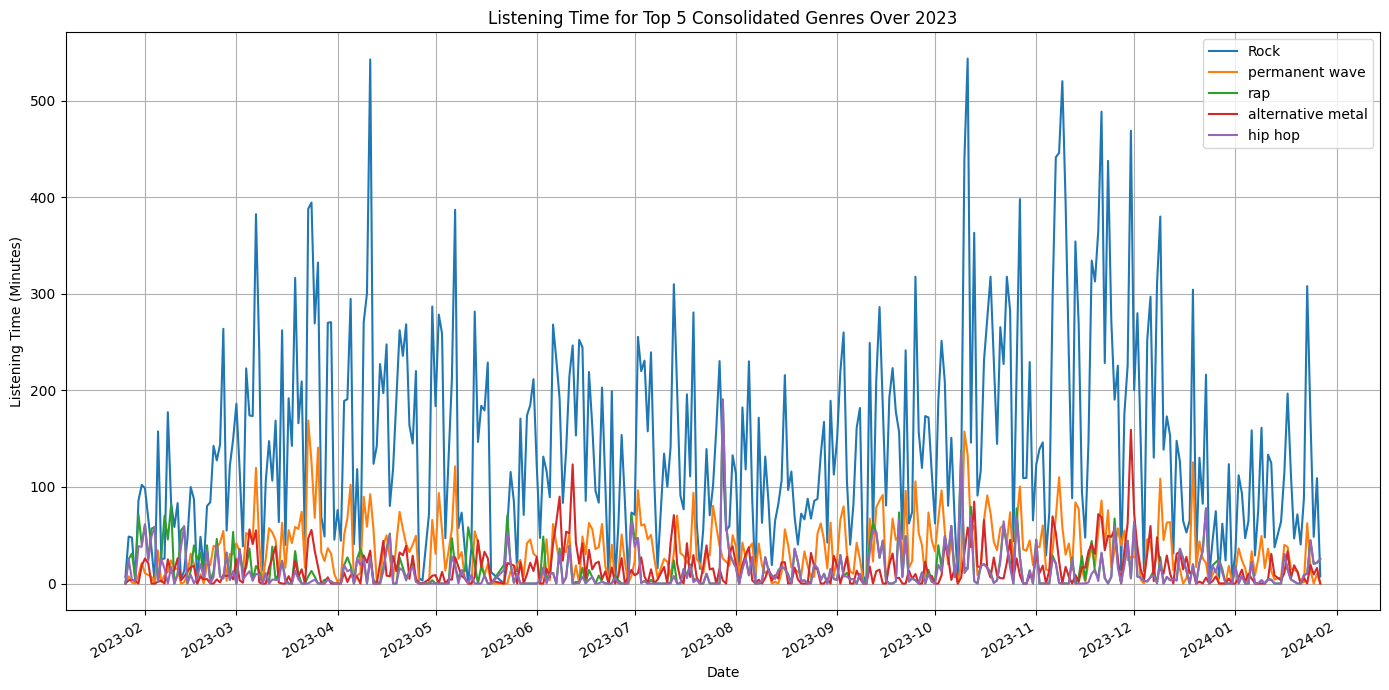

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ast  # Needed to convert string representations of lists into actual lists

# Reading the datasets
artist_data = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Create a new column with actual list of genres
streaming_history['genre_list'] = streaming_history['genres'].apply(lambda x: ast.literal_eval(x))

# Function to consolidate rock genres into a single 'Rock' category
def consolidate_rock(genres):
    consolidated_genres = []
    for genre in genres:
        if 'rock' in genre:
            consolidated_genres.append('Rock')  # Group various rock genres into 'Rock'
        else:
            consolidated_genres.append(genre)
    return consolidated_genres

# Apply the consolidation function to the genre list
streaming_history['consolidated_genre_list'] = streaming_history['genre_list'].apply(consolidate_rock)

# Flatten the consolidated genre list and calculate total minutes played for each genre
all_genres_consolidated = []
for index, row in streaming_history.iterrows():
    for genre in row['consolidated_genre_list']:
        all_genres_consolidated.append((genre, row['minutesPlayed']))

# Convert to DataFrame
genre_df_consolidated = pd.DataFrame(all_genres_consolidated, columns=['Genre', 'MinutesPlayed'])

# Sum minutes played by genre and sort
total_minutes_by_consolidated_genre = genre_df_consolidated.groupby('Genre')['MinutesPlayed'].sum().reset_index()
top_5_consolidated_genres = total_minutes_by_consolidated_genre.sort_values(by='MinutesPlayed', ascending=False).head(5)['Genre'].tolist()

# Filter the original dataframe for rows where the consolidated genre list intersects with the top 5 consolidated genres
streaming_top_consolidated_genres = streaming_history[streaming_history['consolidated_genre_list'].apply(lambda x: any(item for item in top_5_consolidated_genres if item in x))]

# Aggregate listening time by date and top consolidated genre
streaming_top_consolidated_genres['date'] = pd.to_datetime(streaming_top_consolidated_genres['date'])
streaming_by_consolidated_genre_and_date = streaming_top_consolidated_genres.explode('consolidated_genre_list').groupby(['date', 'consolidated_genre_list'])['minutesPlayed'].sum().reset_index()

# Pivot the data to have dates as rows and consolidated genres as columns
pivot_table_consolidated = streaming_by_consolidated_genre_and_date.pivot(index='date', columns='consolidated_genre_list', values='minutesPlayed').fillna(0)

# Plotting corrected for consolidated genres
plt.figure(figsize=(14, 7))
for genre in top_5_consolidated_genres:
    if genre in pivot_table_consolidated.columns:
        plt.plot(pivot_table_consolidated.index, pivot_table_consolidated[genre], label=genre)

plt.title('Listening Time for Top 5 Consolidated Genres Over 2023')
plt.xlabel('Date')
plt.ylabel('Listening Time (Minutes)')
plt.legend()
plt.grid(True)

# Formatting
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.savefig("listening_time_for_top_5_genres.png")
plt.show()


## Total Listening Time and Genre Diversity 

This python allows for the detailed exploration into my Spotify streaming data, focusing on the dynamics of total listening time and genre diversity on a monthly basis. By leveraging `pandas` for data handling and `matplotlib` for visualization, alongside `ast` for data conversion

### Step-by-Step Analysis

1. **Data Preparation**:
   - The streaming history and artist data are loaded into pandas DataFrames from CSV files. A critical preprocessing step involves converting the 'genres' column from a string representation of lists into actual lists to facilitate genre analysis.

2. **Listening Time Aggregation**:
   - The 'date' column is then transformed to extract the month name, which I then used to group the data and sum the 'minutesPlayed' for each month. This aggregation yields the total listening time per month, reflecting the user's engagement over time.

3. **Genre Diversity Calculation**:
   - A new column, 'unique_genres', is created to count the number of unique genres listened to in each session. The data is then grouped by month to calculate the average number of unique genres per month, indicating the diversity of the user's musical exploration.

4. **Data Reindexing**:
   - To make sure that the data is presented in chronological order, both the total listening time and genre diversity datasets are reindexed according to the standard sequence of months from January to December.

5. **Dual-Axis Visualization**:
   - A figure is set up with two y-axes to simultaneously display the total listening time (in minutes) and the average number of unique genres explored each month. This dual-axis plot allows for a comparative analysis of listening time and genre diversity trends over the same period.
   - The first y-axis (left) is dedicated to total listening time, plotted with a blue color scheme, while the second y-axis (right) shows genre diversity, represented with a red color scheme.

6. **Plot Customization and Output**:
   - The plot includes custom labeling for clarity, color-coded axes to distinguish between the two metrics, and a title summarizing the focus of the visualization. The layout is adjusted to accommodate both y-axes.
   - Finally, the visualization is saved as a PNG file and displayed, offering a comprehensive view of how my listening time and genre diversity fluctuated month by month.


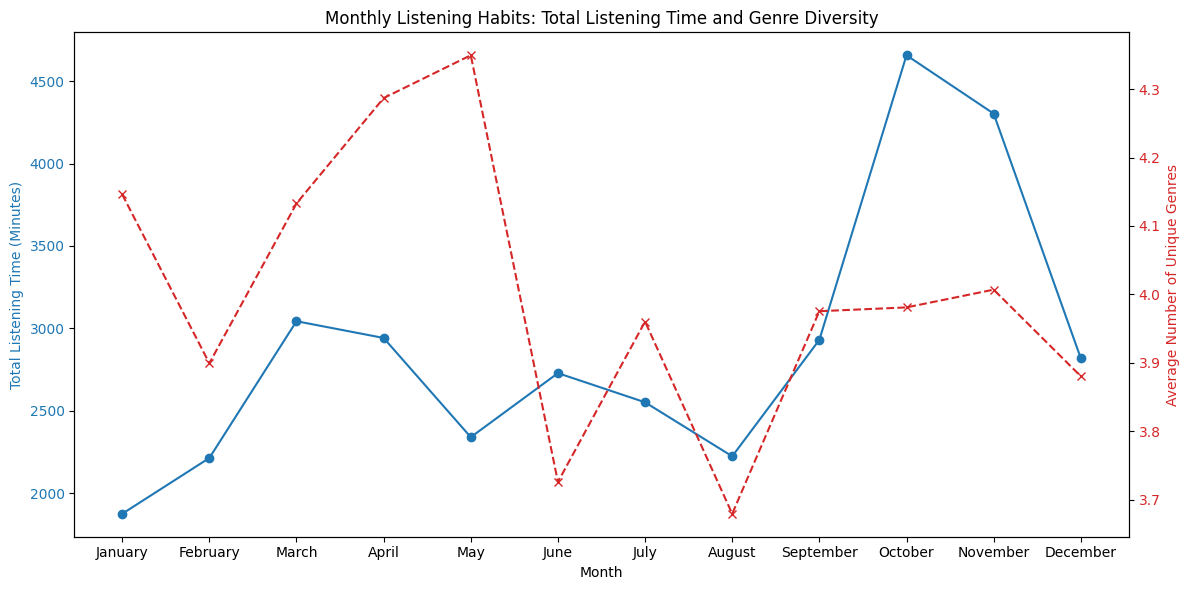

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import ast  # Needed to convert string representations of lists into actual lists

# Reading the datasets
artist_data = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Prepare the 'genre_list' column
streaming_history['genre_list'] = streaming_history['genres'].apply(lambda x: ast.literal_eval(x))

# Aggregate listening time by month
streaming_history['month_name'] = pd.to_datetime(streaming_history['date']).dt.month_name()
monthly_listening_time = streaming_history.groupby('month_name')['minutesPlayed'].sum()

# Calculate the diversity of genres listened to each month
streaming_history['unique_genres'] = streaming_history['genre_list'].apply(lambda x: len(set(x)))
monthly_genre_diversity = streaming_history.groupby('month_name')['unique_genres'].mean()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_listening_time = monthly_listening_time.reindex(month_order)
monthly_genre_diversity = monthly_genre_diversity.reindex(month_order)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total listening time on the first y-axis
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Listening Time (Minutes)', color=color)
ax1.plot(monthly_listening_time.index, monthly_listening_time, color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Number of Unique Genres', color=color)
ax2.plot(monthly_genre_diversity.index, monthly_genre_diversity, color=color, marker='x', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and formatting
plt.title('Monthly Listening Habits: Total Listening Time and Genre Diversity')
fig.tight_layout()  # Adjust the layout to make room for the second y-axis label

plt.savefig('genre_diversity.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


## Top Genres for Each Month (Interactive Plot)

Through using `pandas`, `plotly.express`, `ast`, and `ipywidgets` it allowed for an interactive to be developed that explored my Spotify streaming data, focusing on identifying and visualizing the top 5 genres for a selected month. 
### Implementation Highlights

1. **Data Preparation**:
   - The script begins by loading in my Spotify streaming and artist data into pandas DataFrames. A critical step involving converting the 'genres' column from a string representation to actual lists, enabling detailed genre analysis.
   - The 'date' column is processed to extract the month name, facilitating the grouping of data by month for subsequent analysis.

2. **Interactive Visualization Function**:
   - A function, `plot_top_genres_for_month`, is defined to plot the top 5 genres for a specified month. This function filters the dataset for the selected month, aggregates genre data, and calculates the total listening minutes for each genre.
   - The top 5 genres are then identified based on total listening time and visualized using a bar chart created with `plotly.express`. The chart adopts a dark theme and includes custom titles and axis labels for enhanced readability and aesthetics.

3. **Dropdown Widget for Month Selection**:
   - An interactive dropdown widget is created using `ipywidgets`, populated with the unique months available in the dataset. This widget allows users to select a month and dynamically update the visualization to reflect the top genres for the chosen period.

4. **Visualization and Interactivity**:
   - Upon selecting a month from the dropdown menu, the `plot_top_genres_for_month` function is invoked, updating the visualization to display the top 5 genres for the selected month. This interactive mechanism provides a user-friendly interface for exploring genre popularity over time.
   - The visualization, including the dynamic selection and plotting, is designed to be intuitive and accessible, encouraging active exploration of the dataset.

5. **Output**:
   - The resulting bar chart for the selected month is displayed within the notebook environment, offering immediate visual feedback on the top genres. Additionally, the chart is saved as an HTML file.



In [2]:
import pandas as pd
import plotly.express as px
import ast
import ipywidgets as widgets
from IPython.display import display

# Reading the datasets
artist_data = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# 'streaming_history'  DataFrame
streaming_history['genre_list'] = streaming_history['genres'].apply(lambda x: ast.literal_eval(x))
streaming_history['month_name'] = pd.to_datetime(streaming_history['date']).dt.month_name()

def plot_top_genres_for_month(month):
    month_data = streaming_history[streaming_history['month_name'] == month]
    
    all_genres = []
    for index, row in month_data.iterrows():
        for genre in row['genre_list']:
            all_genres.append((genre, row['minutesPlayed']))

    genre_df = pd.DataFrame(all_genres, columns=['Genre', 'MinutesPlayed'])
    total_minutes_by_genre = genre_df.groupby('Genre')['MinutesPlayed'].sum().reset_index()
    top_5_genres = total_minutes_by_genre.sort_values(by='MinutesPlayed', ascending=False).head(5)
    
    fig = px.bar(top_5_genres, x='Genre', y='MinutesPlayed', title=f'Top 5 Genres in {month}',
                 color='Genre', template='plotly_dark') # plotly_dark for a dark theme
    fig.update_layout(xaxis_title='Genre', yaxis_title='Listening Time (Minutes)', xaxis={'categoryorder':'total descending'})
    # Save the figure as an HTML file
    fig.write_html("top_5_genres.html")
    fig.show()

# Create a Dropdown widget for month selection
months = streaming_history['month_name'].unique()
month_dropdown = widgets.Dropdown(
    options=sorted(months),
    value=sorted(months)[0],
    description='Month:',
    disabled=False,
)

# Widget interaction
widgets.interact(plot_top_genres_for_month, month=month_dropdown)

interactive(children=(Dropdown(description='Month:', options=('April', 'August', 'December', 'February', 'Janu…

<function __main__.plot_top_genres_for_month(month)>

## Listening Sessions 2023 (Interative Plot)

Through using the libraries `pandas`, `matplotlib`, and interactive widgets to analyze and visualize my Spotify streaming sessions data, offering a detailed look into listening patterns for specific days. By depicting the duration and distribution of each session throughout the day, color-coded by artist, it provides a nuanced view of my listening behavior.

### Comprehensive Workflow

1. **Data Initialization**:
   - The process begins with loading my Spotify streaming history from a CSV file into a pandas DataFrame. Essential preprocessing includes converting the 'endTime' to datetime format and calculating the start time for each session based on its duration.

2. **Date Selection Mechanism**:
   - To allow for user interaction, unique dates are extracted from the dataset to populate an interactive date slider. This feature enables the selection of a specific day for detailed visualization.

3. **Dynamic Visualization Function**:
   - The `plot_day` function filters the dataset for sessions on the selected day, sorting them by start time. This tailored approach prepares the data for a focused visualization.

4. **Artist Color Coding and Y-axis Mapping**:
   - A unique color is assigned to each artist through a colormap, enhancing the clarity and aesthetic appeal of the visualization. The y-axis is carefully mapped to artist names, providng a direct insight into my listening session for each day chosen.

5. **Scatter Plot Creation**:
   - The visualization employs a scatter plot where the position and size of each point represent the start time and duration of a session, respectively, with color coding by artist. Custom ticks on the x and y axes indicate the time of day and artist names, enriching the plot's informational value.

6. **Incorporating Interactivity**:
   - An interactive date slider widget is integrated within the plot, allowing users to dynamically choose the day they wish to explore. This interactive element significantly enhances the user experience by enabling the examination of listening habits across different dates.

7. **Finalization and Output**:
   - With detailed labels, a descriptive title, and a legend linking colors to artists, this interactive plot is perfect for presentation. It's then saved as a PNG file, named according to the chosen day, ensuring that the visualization is easily shareable and accessible for future reference.




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
import ipywidgets as widgets
from IPython.display import display

# Load the data
streaming_history_df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Convert endTime to datetime and calculate start time
streaming_history_df['endTime'] = pd.to_datetime(streaming_history_df['endTime'])
streaming_history_df['durationMin'] = streaming_history_df['msPlayed'] / (1000 * 60)  # Duration in minutes
streaming_history_df['startTime'] = streaming_history_df.apply(lambda row: row['endTime'] - timedelta(minutes=row['durationMin']), axis=1)

# Get unique dates for the slider
unique_dates = sorted(streaming_history_df['date'].unique())

def plot_day(specific_day):
    # Filter sessions for the specific day
    daily_sessions = streaming_history_df[streaming_history_df['date'] == specific_day].copy()
    daily_sessions.sort_values('startTime', inplace=True)
    
    # Create a color map for artists
    unique_artists = daily_sessions['artistName'].unique()
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_artists)))
    artist_colors = dict(zip(unique_artists, colors))
    
    # Apply the color map to the daily_sessions
    daily_sessions['color'] = daily_sessions['artistName'].map(artist_colors)
    
    # Create unique values for y-axis using artist names for clarity
    artist_dict = {artist: i for i, artist in enumerate(unique_artists)}
    y_positions = daily_sessions['artistName'].map(artist_dict)
    
    # Plotting the sessions as scatter points with colors
    plt.figure(figsize=(15, 8))
    plt.scatter(daily_sessions['startTime'].dt.hour + daily_sessions['startTime'].dt.minute / 60, 
                y_positions, 
                s=daily_sessions['durationMin'] * 100,  # Adjust size 
                c=daily_sessions['color'], 
                edgecolor='black', 
                alpha=0.7)
    
    # Set y-ticks to artist names
    plt.yticks(list(artist_dict.values()), list(artist_dict.keys()), fontsize=10)
    
    # Set x-ticks to hours of the day
    plt.xticks(range(24), [f"{hour}:00" for hour in range(24)], rotation=45, fontsize=10)
    
    # Add grid lines for better readability
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    
    # Set labels and title
    plt.xlabel('Time of Day', fontsize=12)
    plt.ylabel('Artist', fontsize=12)
    plt.title(f'Listening Sessions on {specific_day}', fontsize=14)
    
    # Create a legend
    artists = [plt.Line2D([0], [0], marker='o', color=c, label=a, markersize=10, linestyle='None') for a, c in artist_colors.items()]
    plt.legend(handles=artists, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    
    plt.tight_layout()
    # Save the figure as an image file (e.g., PNG)
    plt.savefig(f"listening_sessions_{specific_day}.png")
    plt.show()

# Create a widget for the date slider
date_slider = widgets.SelectionSlider(
    options=unique_dates,
    value=unique_dates[0],
    description='Date',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

# Widget interaction
widgets.interact(plot_day, specific_day=date_slider)


interactive(children=(SelectionSlider(continuous_update=False, description='Date', options=('2023-01-26', '202…

<function __main__.plot_day(specific_day)>

## Cartopy Graph used For Streaming History

Through the use of `matplotlib`, `cartopy`, and `pandas` to create a visual representation of my Spotify streaming history for January 2023 on a global map. The visualization tracks the geographic locations of artists listened to, showcasing my musical journey across the globe.

### Visualization Workflow

1. **Library Setup**: We start by importing the essential libraries for data handling and visualization, including `pandas` for data manipulation, `matplotlib.pyplot` for plotting, and `cartopy` for geographic mapping.

2. **Data Preparation**: 
   - The artist and streaming history datasets are then loaded into pandas DataFrames. These datasets include artist names, their geographic coordinates, and streaming session details.
   - The datasets are then merged based on artist names to associate each streaming session with the corresponding artist's coordinates.

3. **Data Filtering for January**: 
   - The merged dataset is filtered to isolate listening sessions from January 2023. This step narrows down the focus to the specified time frame, ensuring the visualization reflects listening habits for that month.

4. **Geographic Visualization Setup**: 
   - A figure is initialised with a cartographic projection using `cartopy`. The map is embellished with features such as land, ocean, coastlines, and borders to provide a detailed geographical context.

5. **Plotting Listening Sessions**: 
   - The script iterates through the filtered dataset, plotting lines between consecutive listening locations based on the artists' coordinates. This method visually connects the dots across the map, depicting the user's musical journey.

6. **Map Customization**: 
   - The map's extent is adjusted to focus on regions relevant to the listening data, optimizing the visualization's geographic scope and clarity.

7. **Displaying the Map**: 
   - Finally, the map is displayed with a title indicating the listening journey for January 2023, offering a detailed view of the geographic diversity of the music listened to during the month.


Both dataframes have been successfully merged


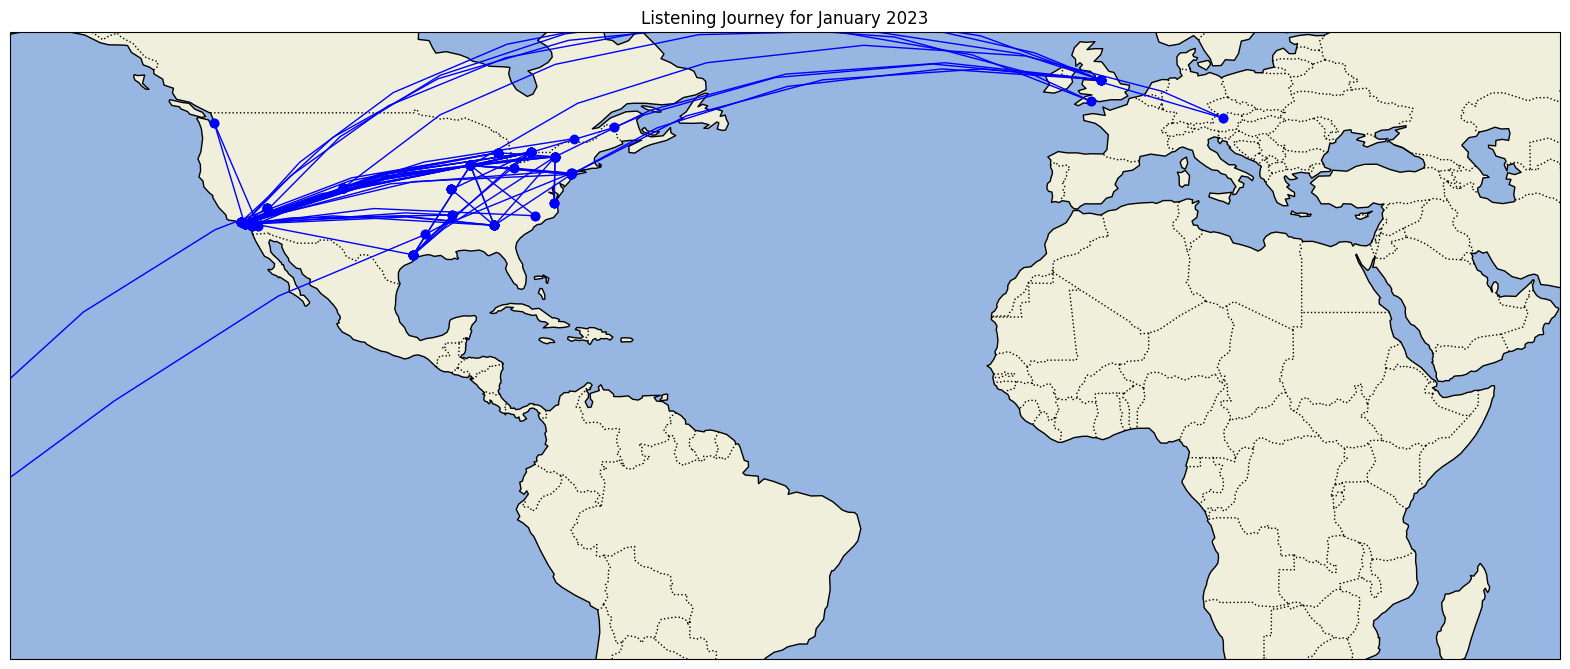

In [25]:
# Loading in the necessary libraries
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Loading in both of the datasets
# The co-ordinates are stored in one dataframe

artist_data_df = pd.read_csv("Updated_artist_data_with_coordinates_genres.csv")
streaming_history_df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Merging both datasets so that the streaming history dataframe has the co-ordinates of each artist 
merged_df = pd.merge(streaming_history_df, artist_data_df[['artistName', 'latitude', 'longitude']], on='artistName', how='left')

# Print statement to make sure that the merge was successful
print('Both dataframes have been successfully merged')

# Filter the dataset for January
january_listens = merged_df[merged_df['date'].str.startswith('2023-01')]

# Remove rows with missing coordinates to avoid errors in plotting
january_listens = january_listens.dropna(subset=['latitude', 'longitude'])

# Setting up the plot with a cartographic projection
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Iterate through the filtered DataFrame and draw lines between consecutive locations
for i in range(len(january_listens) - 1):
    start_lat = january_listens.iloc[i]['latitude']
    start_lon = january_listens.iloc[i]['longitude']
    end_lat = january_listens.iloc[i+1]['latitude']
    end_lon = january_listens.iloc[i+1]['longitude']
    
    # Plotting the line connecting the two points
    ax.plot([start_lon, end_lon], [start_lat, end_lat], color="blue", linewidth=1, marker='o', transform=ccrs.Geodetic())

# Adjust the extent of the map to better fit your data points or use ax.set_global() to show the whole world
ax.set_extent([-150, 60, -25, 60], crs=ccrs.PlateCarree())

plt.title('Listening Journey for January 2023')
plt.show()


## Interactive Cartopy Map (Using Folium Library)

This script creates an interactive map visualizing my Spotify streaming history for January 2023 using `folium` and `pandas`. By combining geographical data from artist locations with streaming session details, it provides a vivid exploration of musical preferences across the globe.

### Process Overview

1. **Data Loading and Preparation**:
   - Artist and streaming history datasets are loaded into pandas DataFrames. The datasets include information such as artist names, track names, streaming dates, and artist geographic coordinates.
   - These datasets are merged based on artist names to enrich the streaming history with the geographical coordinates of each artist listened to.

2. **January Streaming Sessions Selection**:
   - The merged dataset is filtered to isolate entries from January 2023, focusing the visualization on this specific timeframe.
   - Rows missing coordinate information are removed to ensure accuracy in the map plotting.

3. **Interactive Map Initialization**:
   - A `folium` map is initialized, centered around the average latitude and longitude of the listened-to artists' locations.

4. **Colorful Route Visualization**:
   - The script plots lines connecting consecutive streaming locations on the map, using a list of colors to differentiate between sessions. These lines represent the my journey from one artist to another throughout January.

5. **Marker Addition with Popups**:
   - Markers are added for each streaming session, color-coded for visual diversity and equipped with popups. These popups contain details about the artist, track, and date, enhancing the interactivity and informational value of the map.

6. **Output and Sharing**:
   - The interactive map is saved as an HTML file, making it easily accessible This file format allows users to explore my musical journey interactively, zooming in on specific locations and uncovering details about my personal listening habits.



In [32]:
import folium
import pandas as pd

# Load the datasets
artist_data_df = pd.read_csv('Updated_artist_data_with_coordinates_genres.csv')
streaming_history_df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Merge the two datasets to add coordinates to the streaming history
merged_df = pd.merge(streaming_history_df, artist_data_df[['artistName', 'latitude', 'longitude']], on='artistName', how='left')

# Filter the merged dataset for entries from January
january_listens = merged_df[merged_df['date'].str.startswith('2023-01')]

# Remove rows with missing coordinates to avoid errors in plotting
january_listens = january_listens.dropna(subset=['latitude', 'longitude'])

# Initialize a map centered around the average latitude and longitude
average_lat = january_listens['latitude'].mean()
average_lon = january_listens['longitude'].mean()
m = folium.Map(location=[average_lat, average_lon], zoom_start=2)

# Define a list of colors to cycle through
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add lines with different colors
locations = january_listens[['latitude', 'longitude']].values.tolist()
# Use the modulo operator to cycle through the color list
for i, (start, end) in enumerate(zip(locations, locations[1:])):
    folium.PolyLine([start, end], color=colors[i % len(colors)], weight=2.5, opacity=1).add_to(m)

# Add markers with custom colors and popups
for idx, row in january_listens.iterrows():
    # Use the modulo operator to cycle through the color list for markers
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Artist: {row['artistName']}\nTrack: {row['trackName']}\nDate: {row['date']}",
        icon=folium.Icon(color=colors[idx % len(colors)], icon='music')
    ).add_to(m)

# Save to an HTML file
m.save('cartopy_streaming_history_interactive_map.html')


## Mood Distribution Plots

This script uses `pandas`, `matplotlib`, and `seaborn` to analyze and visualize the distribution of my music moods throughout different times of the day, based on my Spotify streaming history. The visualization provides insights into how music preferences shift from morning to night, reflecting the user's emotional landscape over a typical day.

### Detailed Procedure

1. **Data Preparation**:
   - The Spotify streaming history dataset is loaded into a pandas DataFrame, including timestamps and mood classifications for each track listened to.
   - The 'endTime' column is converted to datetime format, and an hour column ('Hour') is extracted to determine the time of day for each listening session.

2. **Categorization of Time of Day**:
   - A function, `categorize_time_of_day`, is defined to classify each hour into a specific part of the day (Morning, Afternoon, Evening, Night), based on conventional time ranges.
   - This categorization facilitates the analysis of mood distribution across different segments of the day, offering a structured approach to understanding temporal listening patterns.

3. **Aggregation of Mood Data**:
   - The DataFrame is grouped by the 'TimeOfDay' column, and the frequency of each mood within these time categories is calculated. This aggregation step forms the basis for the mood distribution analysis.

4. **Visualization**:
   - A bar plot is created to represent the mood distribution across different times of the day, with each mood stacked for clarity. This visual format allows for an immediate understanding of which moods dominate each time segment.
   - The plot is carefully configured with titles, axis labels, and a legend to ensure readability and informative value. The layout is adjusted to accommodate the visualization's components, including rotated x-axis labels for better legibility.

5. **Output and Display**:
   - The finalized plot is saved as a PNG file, facilitating easy sharing and reference. This static representation captures the mood dynamics within the user's listening habits, providing a snapshot of emotional preferences throughout the day.
   - The plot is displayed, offering a visual exploration of how music moods vary from morning to night, reflecting shifts in the listener's emotional state or activities.




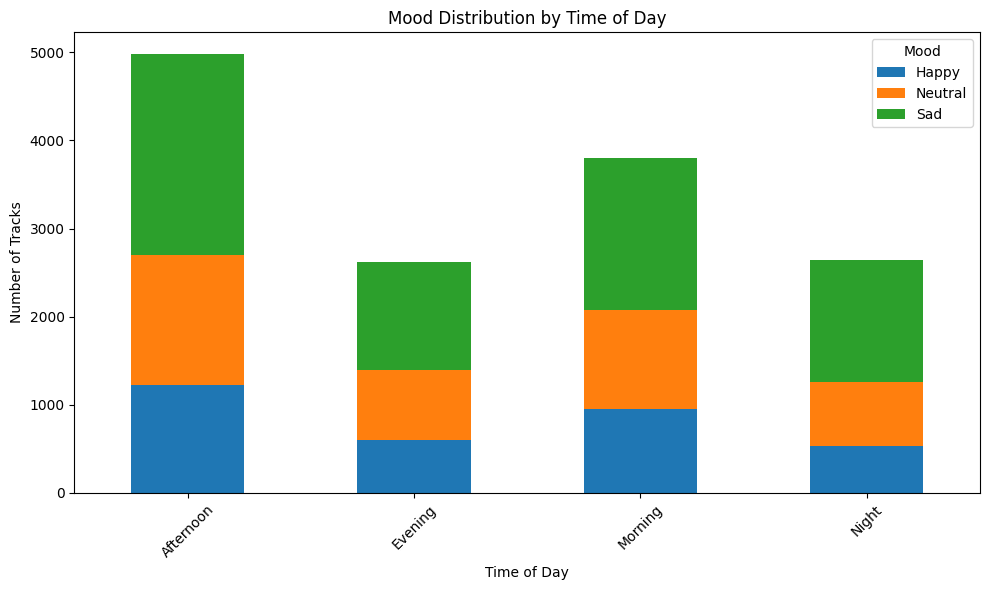

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Ensure endTime is a datetime object and extract the hour
df['endTime'] = pd.to_datetime(df['endTime'])
df['Hour'] = df['endTime'].dt.hour

# Define time of day categories based on the hour
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new 'TimeOfDay' column
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# Now, you can aggregate and visualize the data based on 'TimeOfDay'
# For example, visualize the mood distribution across different times of day
mood_distribution_by_time = df.groupby('TimeOfDay')['Mood'].value_counts().unstack().fillna(0)

# Plotting
mood_distribution_by_time.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mood Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.legend(title='Mood')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.savefig("mood_distribution_by_time.png")
plt.show()


## Mood By Time of Day

This script improves  the analysis of Spotify streaming history data by visualizing the distribution of music moods throughout different times of the day, utilizing `pandas` for data handling and `matplotlib` alongside `seaborn` for advanced visualization techniques. the aim was to reveal how my music mood preferences shift between Morning, Afternoon, Evening, and Night, offering a deeper understanding of my personal listening patterns.

### Visualization Strategy

1. **Data Setup**:
   - Initially, the script lmys the Spotify streaming history into a pandas DataFrame. This dataset includes the 'endTime' of each listening session and the mood of the music listened to.

2. **Time of Day Categorization**:
   - The 'endTime' column is converted into datetime format to extract the hour of each listening session. 
   - A function, `categorize_time_of_day`, assigns each hour to a specific time of day category, enabling the analysis of listening habits across different parts of the day.

3. **Mood Analysis Preparation**:
   - By applying the time of day categorization, a new 'TimeOfDay' column is created. This column, along with the 'Mood' data, serves as the basis for the mood distribution analysis.

4. **Enhanced Visualization with Seaborn**:
   - A seaborn countplot is used to create a visually appealing stacked bar plot, showcasing the number of tracks listened to in each mood category, segmented by the time of day.
   - The plot is customized with a 'viridis' color palette, clear categorization, and ordered display from Morning to Night for intuitive comprehension.

5. **Plot Customization and Annotation**:
   - The plot features customized titles, axis labels, and tick labels to enhance readability and informative value. 
   - Optional annotations are added to each bar, displaying the exact count of tracks, enriching the plot with precise data points.

6. **Output and Display**:
   - The completed visualization is saved as a PNG file, "mood_distributiog and future reference.
   - The plot is thedetailedoffering a comy mprehensive view of how music mood preferences shift throughout the day, reflecting the listenee accessible and engaging.


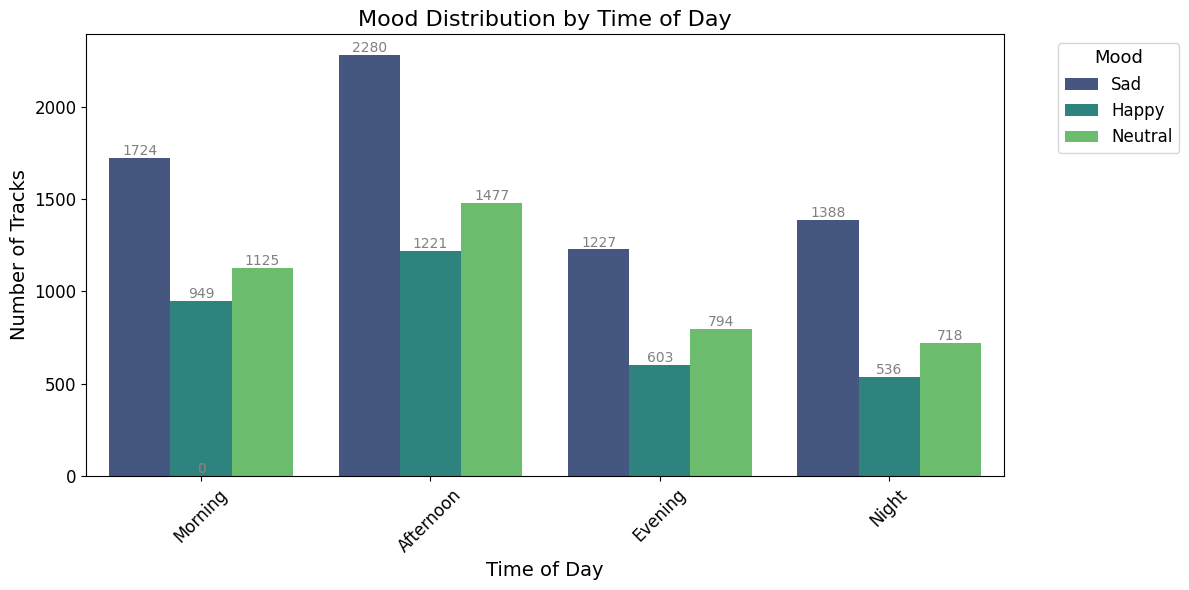

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Example code for categorizing 'TimeOfDay' and 'Mood' goes here
# Ensure endTime is a datetime object and extract the hour
df['endTime'] = pd.to_datetime(df['endTime'])
df['Hour'] = df['endTime'].dt.hour

# Define time of day categories based on the hour
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new 'TimeOfDay' column
df['TimeOfDay'] = df['Hour'].apply(categorize_time_of_day)

# Use Seaborn to create a more visually appealing stacked bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='TimeOfDay', hue='Mood', data=df, palette='viridis', order=['Morning', 'Afternoon', 'Evening', 'Night'])

plt.title('Mood Distribution by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Mood', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Optionally, add annotations to each bar for the exact count
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.savefig("mood_distribution_by_time_of_day.png")
plt.show()

## Mood Distribution By Hour of Day

This script uses `pandas`, `matplotlib`, and `seaborn` to create a detailed visualization of the distribution of my music moods by hour of the day, based on my Spotify streaming history. The analysis offers insights into how mood my preferences in music shift throughout the day.

### Detailed Analysis Steps

1. **Data Preparation**:
   - The Spotify streaming history is loaded into a pandas DataFrame. This step includes the necessary conversion of the 'endTime' column to datetime format to facilitate time-based analyses.

2. **Hour Extraction**:
   - The hour of each streaming session is extracted from the 'endTime' column. This granularity allows for an analysis that reveals how mood preferences vary across different times of the day.

3. **Mood Distribution Aggregation**:
   - The DataFrame is grouped by both hour and mood, with a count of tracks for each combination. This aggregation provides a detailed view of mood distribution by hour, highlighting patterns of listening behavior.

4. **Visualization**:
   - A line plot is created to display the mood distribution across all 24 hours of the day. This visualization method is chosen for its effectiveness in showing trends and variations in mood preferences over time.
   - The plot is carefully designed with a title, axis labels, and a legend that distinguishes between different moods. Grid lines are added for enhanced readability.

5. **Output and Display**:
   - The final visualization is saved as a PNG file, making it easy to share and refer back to. This file captures the essence of the analysis, providing a snapshot of how music mood preferences evolve throughout the day.
   - The plot is displayed, showcasing the dynamic nature of mood distribution by hour, offering a window into the listener's emotional journey across the day.

.


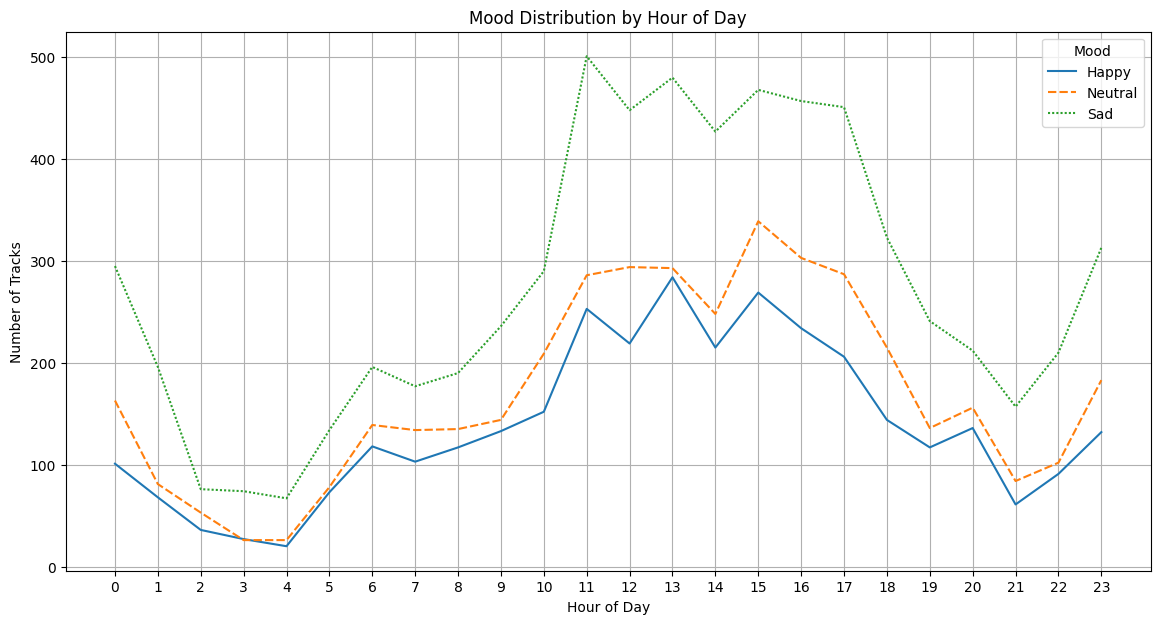

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the correct path is used to load the DataFrame
df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Convert 'endTime' to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Extract the hour from 'endTime' for grouping
df['Hour'] = df['endTime'].dt.hour

# Group by hour and mood, then count tracks
hourly_mood_distribution = df.groupby(['Hour', 'Mood']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=hourly_mood_distribution)
plt.title('Mood Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tracks')
plt.xticks(range(24))  # Ensure x-ticks cover each hour of the day
plt.legend(title='Mood')
plt.grid(True)
plt.savefig("mood_distribution_by_hour_of_day.png")
plt.show()

## Average Mood Distribution by Hour of Day

This script adeptly combines `pandas`, `matplotlib`, and `seaborn` to analyze and visualize the average distribution of music moods across different hours of the day, utilizing Spotify streaming history. By examining how mood preferences in music fluctuate throughout the day, the visualization provides insights into the listener's emotional trends and patterns.

### Workflow Summary

1. **Data Loading and Transformation**:
   - The process commences with importing the Spotify streaming history into a pandas DataFrame, including a crucial step of converting the 'endTime' column to datetime format. This conversion allows for the extraction of both the hour and day of the week from each streaming session, setting the stage for a nuanced time-based analysis.

2. **Aggregation of Mood Data**:
   - The dataset is grouped by hour and mood, with a count of tracks tallied for each category. This step results in a comprehensive overview of mood distribution by hour, highlighting when certain moods are predominantly preferred.

3. **Average Calculation**:
   - To account for variations across different days, the average count of tracks per mood for each hour is calculated. This approach normalizes the data, ensuring that the visualization reflects typical mood distribution patterns rather than anomalies or outliers.

4. **Visualization with Seaborn**:
   - A line plot is crafted to display the average mood distribution across all hours, with different moods distinguished by color. Seaborn's lineplot function is utilized for its ability to handle aggregated data effectively, offering a smooth and informative visual representation of trends.
   - The plot is meticulously designed, incorporating a descriptive title, clear axis labels, and a comprehensive legend. Grid lines and a fixed range for x-ticks enhance the plot's readability and interpretability.

5. **Output and Presentation**:
   - The finalized plot is saved as a PNG file, facilitating easy sharing and referencing. This static visualization captures the essence of the analysis, portraying the rhythmic ebb and flow of mood preferences over the course of a day.
   - Displaying the plot reveals the dynamic nature of mood distribution by hour, providing a visual narrative of the listener's emotional journey throughout the day.

By dissecting the average mood distribution by hour, this script not only unveils the diurnal patterns of music consumption but also emphasizes the intricate relationship between time of day and mood preference, offering a deeper understanding of the soundtrack that accompanies daily life.


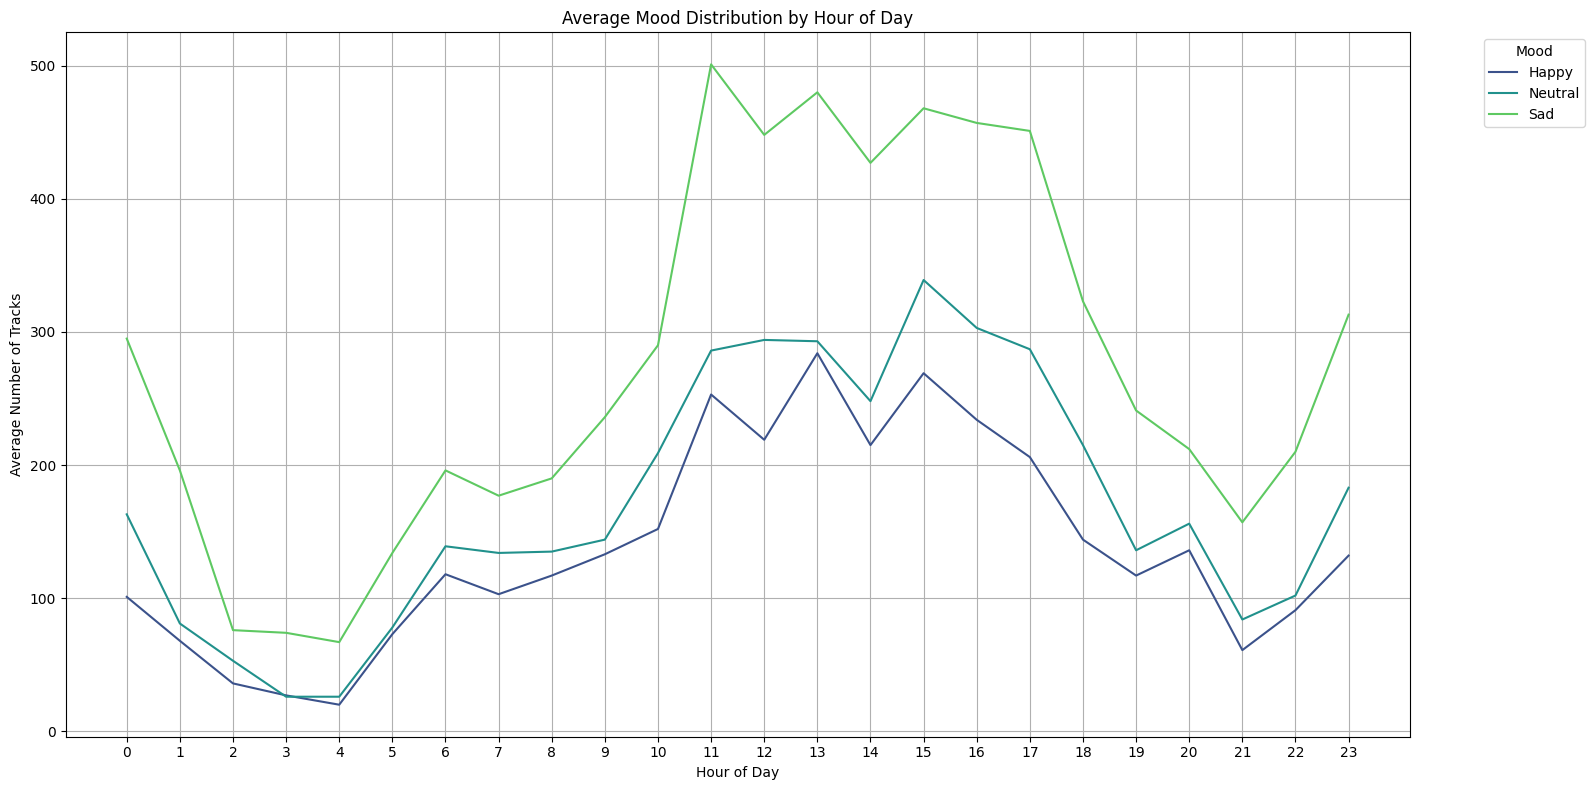

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame
df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Convert 'endTime' to datetime and extract hour and day of week
df['endTime'] = pd.to_datetime(df['endTime'])
df['Hour'] = df['endTime'].dt.hour
df['DayOfWeek'] = df['endTime'].dt.day_name()

# Aggregate data to get the count of tracks per mood for each hour
hourly_mood_count = df.groupby(['Hour', 'Mood']).size().reset_index(name='Counts')

# Calculate the average count per mood for each hour
hourly_mood_avg = hourly_mood_count.groupby(['Hour', 'Mood'])['Counts'].mean().reset_index()

# Plotting with seaborn to handle the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(data=hourly_mood_avg, x='Hour', y='Counts', hue='Mood', markers=True, dashes=False, palette='viridis')
plt.title('Average Mood Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Tracks')
plt.xticks(range(24))  # Ensure x-ticks cover each hour of the day
plt.legend(title='Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("average_mood_distribution_by_hour_of_day.png")
plt.show()


## 3D Visualisation of Audio Feature Relationships

This script demonstrates the use of `plotly.express` and `pandas` to create a dynamic 3D visualization, showcasing the relationships between the audio features danceability, energy, and valence, all categorized by mood from a Spotify streaming dataset. This visualization provides an engaging way to explore how these key audio features interact within different moods of music.

### Visualization Steps

1. **Data Preparation**:
   - The Spotify streaming history dataset is loaded into a pandas DataFrame. This step includes selecting relevant columns: danceability, energy, valence, and Mood, ensuring the analysis focuses on these specific audio features and their relationship with music mood.

2. **3D Scatter Plot Creation**:
   - Using `plotly.express`, a 3D scatter plot is generated to map out the selected audio features in a three-dimensional space. The axes represent danceability, energy, and valence, providing a comprehensive view of how these features correlate with each other across different moods.
   - Mood is used as a color differentiator, allowing for a visually intuitive segmentation of data points based on the emotional tone of the tracks. This color-coding enhances the plot's informational value, making it easier to discern patterns or clusters within the data.

3. **Layout Customization and Display**:
   - The layout of the 3D plot is customized to remove excess margin space, creating a streamlined visual presentation. 
   - The interactive nature of the plot, facilitated by `plotly.express`, invites users to explore the data from different angles and zoom levels, providing an immersive analytical experience.

4. **Output and Accessibility**:
   - The visualization is saved in multiple formats: HTML for interactive exploration, PNG for static viewing, and SVG for vector-based scalability. These varied output formats ensure the visualization can be accessed and shared in ways that best suit the user's needs or preferences.

By visually mapping the intricate relationships between danceability, energy, and valence within the context of music mood, this script not only highlights the multifaceted nature of music but also underscores the utility of 3D visualization in uncovering patterns within complex datasets.


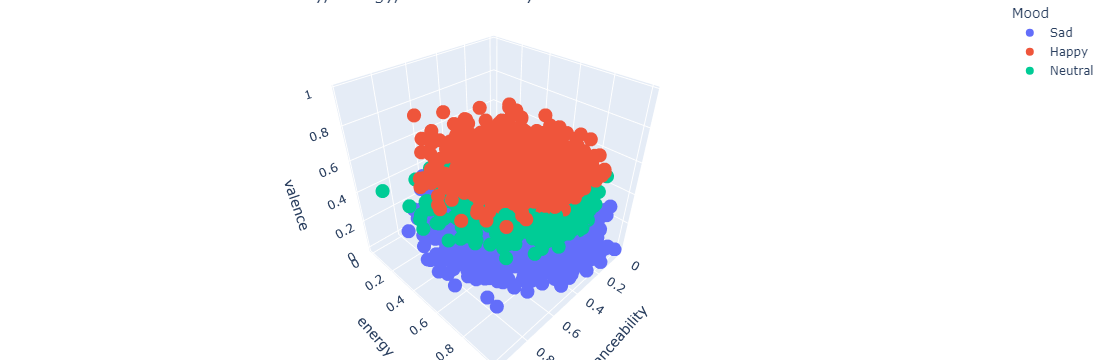

In [21]:
import plotly.express as px
import pandas as pd

# 3D Visualization plot
streaming_dataset = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Make sure 'Mood' is included in the selected data
df_3d_colored = streaming_dataset[['danceability', 'energy', 'valence', 'Mood']]

# Generating the 3D scatter plot with color
fig = px.scatter_3d(df_3d_colored, x='danceability', y='energy', z='valence',
                    color='Mood', title="3D Visualization of Danceability, Energy, and Valence by Mood")
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# Writing to a HTML file
fig.write_html('3D_Audio_Feature_Relationships.html')
# Writing to a PNG
fig.write_image('3D_Audio_Feature_Relationships.png')
# Writing to a CSV file
fig.write_image('3D_Audio_Feature_Relationships.svg')

## 3D Surface Plot

Utilising `numpy`, `plotly.graph_objects`, and `pandas` to create a 3D density surface plot visualizing the distribution of tracks based on their danceability and energy features from a Spotify streaming dataset. This sophisticated visualization technique offers a deep dive into how these two audio features interplay across the dataset, highlighting concentrations of track characteristics.

### Detailed Visualization Process

1. **Data Loading**:
   - The Spotify streaming history dataset is imported into a pandas DataFrame, setting the stage for an analysis focused on the audio features of danceability and energy.

2. **Data Binning**:
   - The continuous variables of danceability and energy are binned into intervals using `numpy.linspace`, creating a structured grid that facilitates the density analysis. This binning process is crucial for transforming continuous data into a format suitable for 3D density plotting.

3. **Histogram Calculation**:
   - A 2D histogram is computed for danceability and energy using `numpy.histogram2d`, quantifying the number of tracks within each bin. This histogram serves as the base data for the 3D surface plot, representing the track count density across different levels of danceability and energy.

4. **Meshgrid Creation**:
   - A meshgrid is generated for the danceability and energy axes using `numpy.meshgrid`, providing the x and y coordinates for the plot. This grid aligns with the histogram bins, ensuring that each point on the surface corresponds to a specific combination of danceability and energy values.

5. **3D Surface Plot Generation**:
   - A 3D surface plot is created with `plotly.graph_objects.Surface`, mapping the track count density onto the z-axis against the danceability and energy on the x and y axes, respectively. The plot includes hover information to display the exact values for danceability, energy, and track count at any point on the surface.

6. **Layout Customization**:
   - The plot's layout is updated to enhance readability and aesthetic appeal, including titles for the axes and a color scale for the track count. These customizations ensure the visualization is informative and accessible, providing clear insights into the data's structure.

7. **Output and Sharing**:
   - The visualization is saved in multiple formats: HTML for interactive exploration, PNG for static viewing, and SVG for high-quality vector graphics. These varied output formats cater to different sharing and presentation needs, making the analysis widely accessible.

This approach to visualizing audio feature relationships in 3D not only illuminates patterns in the dataset but also showcases the potential of advanced plotting techniques in revealing complex data interactions.


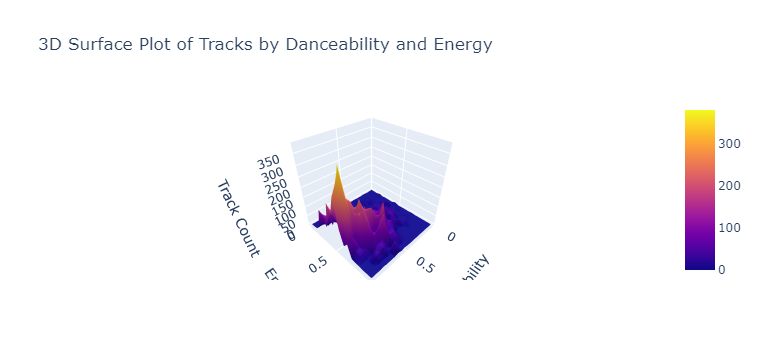

In [20]:
# import the libraries
import numpy as np
import plotly.graph_objects as go
import pandas as pd

# Reading in the dataset
streaming_history = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Bin 'danceability' and 'energy' into intervals
danceability_bins = np.linspace(0, 1, 20)  # 20 bins from 0 to 1
energy_bins = np.linspace(0, 1, 20)  # 20 bins from 0 to 1
counts, _, _ = np.histogram2d(streaming_history['danceability'], streaming_history['energy'], bins=[danceability_bins, energy_bins])

# Generate a meshgrid for the x and y coordinates in the plot
danceability_centers = (danceability_bins[:-1] + danceability_bins[1:]) / 2
energy_centers = (energy_bins[:-1] + energy_bins[1:]) / 2
D, E = np.meshgrid(danceability_centers, energy_centers)

# Create the 3D Surface Plot
fig = go.Figure(data=[go.Surface(
    z=counts,
    x=D,
    y=E,
    hoverinfo='x+y+z',
    hovertemplate='Danceability: %{x}<br>Energy: %{y}<br>Track Count: %{z}<extra></extra>',
)])
# Update the layout to improve readability
fig.update_layout(
    title='3D Surface Plot of Tracks by Danceability and Energy',
    scene=dict(
        xaxis_title='Danceability',
        yaxis_title='Energy',
        zaxis_title='Track Count',
        xaxis=dict(title_font=dict(size=14)),
        yaxis=dict(title_font=dict(size=14)),
        zaxis=dict(title_font=dict(size=14)),
    ),
    coloraxis_colorbar=dict(
        title='Track Count'
    )
)
fig.show()

# Writing to a HTML file
fig.write_html('3D_Surface_Density_Plot.html')
# Writing to a PNG
fig.write_image('3D_Surface_Density_Plot.png')
# Writing to a CSV file
fig.write_image('3D_Surface_Density_Plot.svg')

## Stacked bar chart

This script illustrates the process of creating a stacked bar chart to visualize monthly listening trends by genre, using `matplotlib` and `pandas`. By consolidating similar genres and focusing on the top genres, this visualization offers a clear and comprehensive overview of changes in music preferences over time.

### Visualization Process

1. **Data Preparation**:
   - The Spotify streaming data is loaded into a pandas DataFrame, ensuring the 'date' column is formatted as datetime to facilitate time-based aggregation.
   - All variations of the rock genre are consolidated into a single 'Rock' category, simplifying the dataset for a more accurate representation of genre preferences.

2. **Identifying Top Genres**:
   - The dataset is analyzed to identify the top 5 genres based on overall count. This step focuses the visualization on the most prevalent genres, providing a clearer picture of listening habits.

3. **Data Aggregation**:
   - The data is filtered to include only the top genres and then aggregated by month and genre. This aggregation forms the basis for the stacked bar chart, allowing for the visualization of monthly listening trends for each genre.

4. **Stacked Bar Chart Creation**:
   - A stacked bar chart is plotted with distinct colors assigned to each genre, facilitating visual differentiation between genres. The chart stacks the number of tracks played for each genre month by month, illustrating how listening preferences shift over time.

5. **Plot Customization**:
   - The plot is customized with titles, axis labels, and a legend to enhance readability and interpretability. Date formatting is applied to the x-axis to clearly display the months, and the plot layout is adjusted for optimal presentation.

6. **Display and Output**:
   - The visualization is displayed, showcasing the monthly listening trends by genre in a visually engaging format. Optionally, the plot is saved as an SVG file, providing a high-quality vector graphic that can be easily shared or incorporated into presentations.

This approach not only highlights the dynamic nature of music preferences but also demonstrates the utility of stacked bar charts in revealing complex trends and patterns in dataset over time.


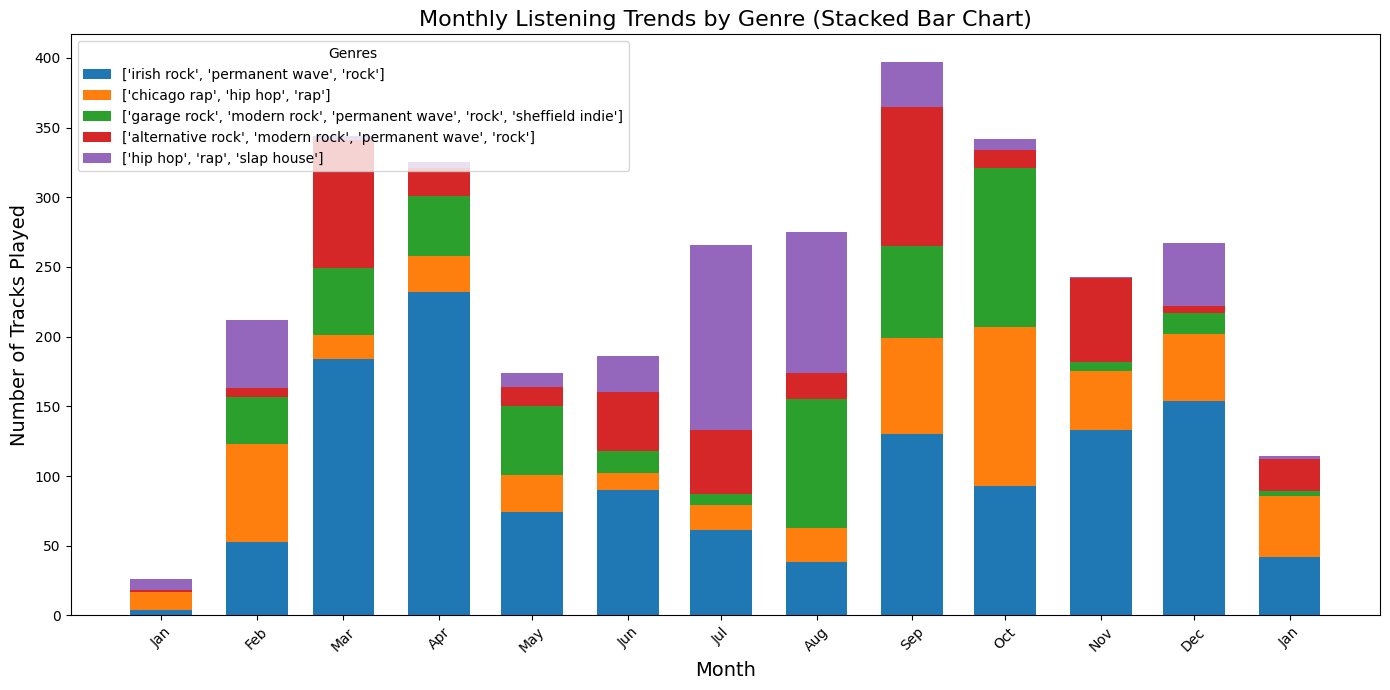

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Ensure 'date' is in datetime format
spotify_data['date'] = pd.to_datetime(spotify_data['date'])

# Consolidate all rock genres into one for a more accurate representation
spotify_data['genres'] = spotify_data['genres'].replace(regex=r'.*Rock.*', value='Rock')

# Filter for top 5 genres based on overall count
top_genres = spotify_data['genres'].value_counts().head(5).index.tolist()

# Filter the dataset for these top genres
top_genres_data = spotify_data[spotify_data['genres'].isin(top_genres)]

# Aggregating data by month and genre for the stacked bar chart
monthly_genre_counts = top_genres_data.groupby([top_genres_data['date'].dt.to_period('M'), 'genres']).size().unstack(fill_value=0)
monthly_genre_counts.index = monthly_genre_counts.index.to_timestamp()

# Define distinct colors for each genre
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Bottom for stacking
bottom = None

for genre, color in zip(top_genres, colors):
    ax.bar(monthly_genre_counts.index, monthly_genre_counts[genre], bottom=bottom, label=genre, color=color, width=20)
    bottom = monthly_genre_counts[genre] if bottom is None else bottom + monthly_genre_counts[genre]

# Formatting the plot
ax.set_title('Monthly Listening Trends by Genre (Stacked Bar Chart)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Tracks Played', fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(title='Genres')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Optionally save the plot
fig.savefig('listening_trends_by_genre_monthly_stacked.svg', format='svg')


## Monthly Listening Trends by Genre Stacked Bar Plot

This script enhances the visualization of Spotify streaming data by creating a stacked bar chart of monthly listening trends for the top 5 genres, with a twist—excluding January and incorporating percentage annotations to highlight each genre's share of listening time. This approach offers a nuanced view of music preferences, focusing on the relative importance of each genre throughout the year.

### Visualization Steps

1. **Data Preparation**:
   - The Spotify streaming history is loaded into a pandas DataFrame, and the 'date' column is converted to datetime format for time-based aggregation.
   - Genres are consolidated to group all variations of rock music into a single 'Rock' category, simplifying the genre landscape for clearer analysis.

2. **Identifying and Filtering Top Genres**:
   - The dataset is analyzed to determine the top 5 genres by overall count. The data is then filtered to include only these genres, focusing the visualization on the most significant music preferences.

3. **Monthly Genre Aggregation**:
   - Listening data is aggregated by month and genre to prepare for the stacked bar chart. This step forms the basis for visualizing how each genre's popularity fluctuates month by month.

4. **Excluding January**:
   - To offer a distinct perspective, January is excluded from the visualization. This exclusion allows for a comparison of listening habits during different times of the year, avoiding any skew from January's data.

5. **Plotting with Annotations**:
   - A stacked bar chart is plotted for the remaining months, using distinct colors for each of the top genres. Percentage annotations are added to each significant portion of the bars, providing a clear indication of each genre's contribution to the total listening time, excluding January.

6. **Customization and Output**:
   - The plot is finely tuned with titles, axis labels, and a legend. Date formatting is applied to ensure the months are easily recognizable. The layout is adjusted for optimal presentation.
   - The visualization is displayed, showcasing the distribution of listening preferences across genres, month by month, with insightful percentage annotations. Optionally, the plot is saved as an SVG file, offering a scalable vector graphic suitable for high-quality presentations or publications.

This advanced visualization technique not only highlights the dynamic nature of music preferences over the year but also illustrates the importance of analyzing data with attention to temporal trends and genre proportions.


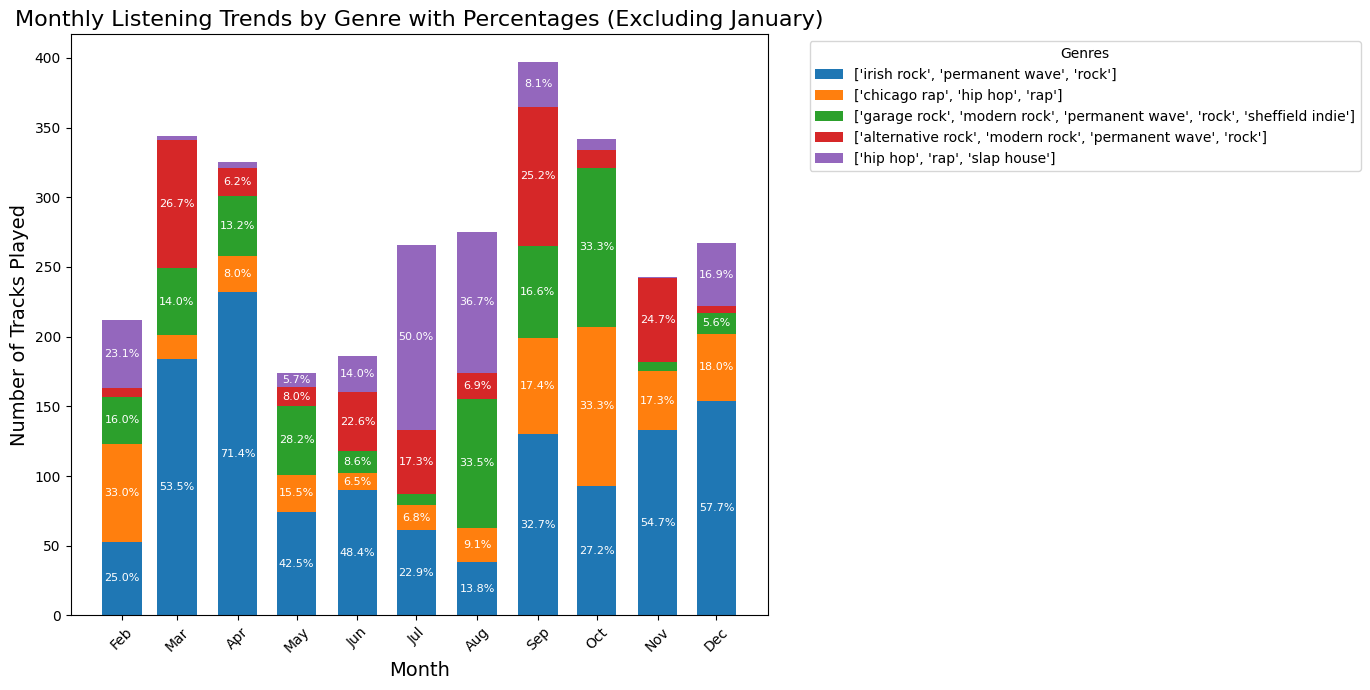

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Ensure 'date' is in datetime format
spotify_data['date'] = pd.to_datetime(spotify_data['date'])

# Consolidate all rock genres into one for a more accurate representation
spotify_data['genres'] = spotify_data['genres'].replace(regex=r'.*Rock.*', value='Rock')

# Filter for top 5 genres based on overall count
top_genres = spotify_data['genres'].value_counts().head(5).index.tolist()

# Filter the dataset for these top genres
top_genres_data = spotify_data[spotify_data['genres'].isin(top_genres)]

# Aggregating data by month and genre for the stacked bar chart
monthly_genre_counts = top_genres_data.groupby([top_genres_data['date'].dt.to_period('M'), 'genres']).size().unstack(fill_value=0)
monthly_genre_counts.index = monthly_genre_counts.index.to_timestamp()

# Exclude January from the visualization
monthly_genre_counts_excl_jan = monthly_genre_counts[monthly_genre_counts.index.month != 1]

# Recalculate total listens per month excluding January
total_listens_per_month_excl_jan = monthly_genre_counts_excl_jan.sum(axis=1)

# Define distinct colors for each genre
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Plotting with horizontal percentage annotations, excluding January
fig, ax = plt.subplots(figsize=(14, 7))

bottom = None

for genre, color in zip(top_genres, colors):
    # Recalculate the percentage of listens for each genre within each month excluding January
    genre_percentages_excl_jan = (monthly_genre_counts_excl_jan[genre] / total_listens_per_month_excl_jan) * 100
    
    # Plot
    bars = ax.bar(monthly_genre_counts_excl_jan.index, monthly_genre_counts_excl_jan[genre], bottom=bottom, label=genre, color=color, width=20)
    bottom = monthly_genre_counts_excl_jan[genre] if bottom is None else bottom + monthly_genre_counts_excl_jan[genre]
    
    # Annotate bars with horizontal percentages
    for bar, percentage in zip(bars, genre_percentages_excl_jan):
        height = bar.get_height()
        if percentage > 5:  # Only annotate significant percentages to avoid clutter
            ax.annotate(f'{percentage:.1f}%', 
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', color='white', fontsize=8)

# Formatting the plot
ax.set_title('Monthly Listening Trends by Genre with Percentages (Excluding January)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Tracks Played', fontsize=14)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Optionally, save the plot as SVG
svg_path = 'listening_trends_by_genre_excl_jan_horizontal_percentages.svg'
fig.savefig(svg_path, format='svg')


## Listening Distribution Throughout the Day 2023

Using `pandas`, `matplotlib`, and `numpy` to analyse and visualize the distribution of my Spotify listening sessions throughout the day, based on streaming data. By aggregating data by hour and creating a bar plot, it provides a clear view of when music listening is most prevalent.

### Visualization Steps

1. **Data Preparation**:
   - The Spotify streaming history dataset is imported into a pandas DataFrame, with a crucial step of converting the 'endTime' column to datetime format. This conversion allows for the extraction of the hour from each streaming session, setting the stage for hourly analysis.

2. **Hourly Aggregation**:
   - The data is grouped by hour, counting the number of tracks played each hour. This aggregation step quantifies listening activity throughout the day, highlighting peak and off-peak listening times.

3. **Bar Plot Creation**:
   - A bar plot is generated to visually represent the number of tracks played at different hours of the day. The use of a gradient color scheme (via `plt.cm.viridis`) enhances the visual appeal and readability of the plot.

4. **Plot Customization**:
   - The plot is carefully customized with labels for the x-axis (hour of the day) and y-axis (number of tracks played), alongside a descriptive title. This customization ensures that the visualization is informative and accessible.

5. **Display and Output**:
   - The visualization is displayed, offering an immediate overview of the listening distribution throughout the day. Additionally, the plot is saved as a PNG file, providing a static version of the analysis suitable for sharing or reference.




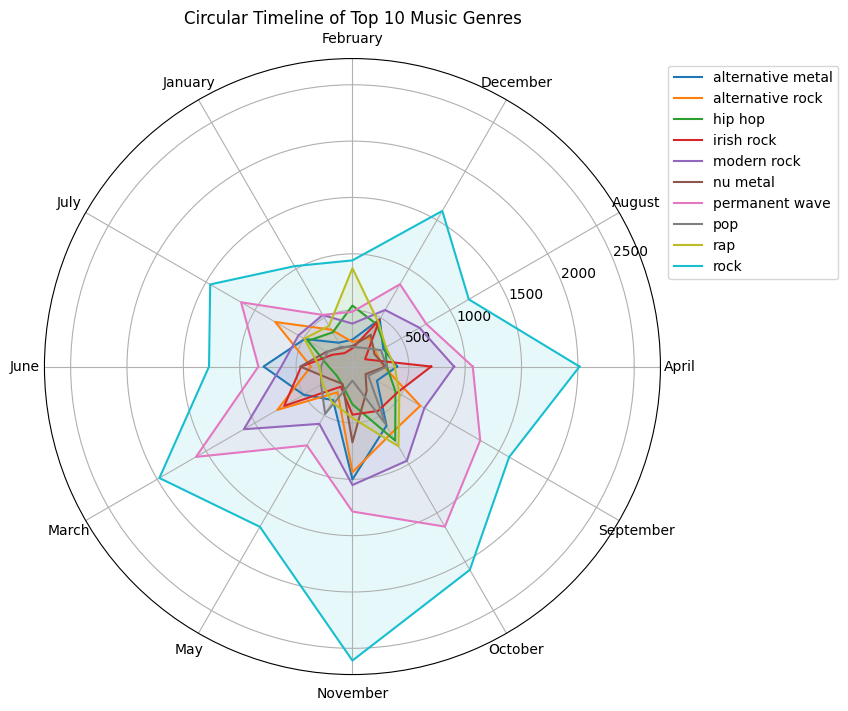

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval

# Assuming the initial steps are the same as in your existing code

# Load the dataset
file_path = 'streaming_history_with_audio_features_categorized.csv'
streaming_data = pd.read_csv(file_path)

# Ensure the 'genres' column is in list format
streaming_data['genres'] = streaming_data['genres'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Explode the 'genres' column so each genre gets its own row
exploded_data = streaming_data.explode('genres')

# Group by 'genres' and 'month_name', then sum up 'minutesPlayed' for each group
genre_month_aggregation = exploded_data.groupby(['genres', 'month_name'])['minutesPlayed'].sum().reset_index()

# Identify the top 10 genres by total listening time
top_genres = genre_month_aggregation.groupby('genres')['minutesPlayed'].sum().nlargest(10).index

# Filter for top 10 genres
top_genre_data = genre_month_aggregation[genre_month_aggregation['genres'].isin(top_genres)]

# Pivot the DataFrame for top 10 genres
top_genre_month_pivot = top_genre_data.pivot(index='genres', columns='month_name', values='minutesPlayed').fillna(0)

# Visualization code starts here
# Set up the figure and axis for a polar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'polar': True})

# The number of variables (months) we're plotting
num_vars = len(top_genre_month_pivot.columns)

# Compute angle each bar is centered on
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Draw one axis per variable + add labels
ax.set_thetagrids(np.degrees(angles[:-1]), top_genre_month_pivot.columns)

# Plot each genre
for i, row in top_genre_month_pivot.iterrows():
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=i)
    ax.fill(angles, values, alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.title('Circular Timeline of Top 10 Music Genres')
plt.savefig("circular_timeline_top_10_music_genres.png")
plt.show()


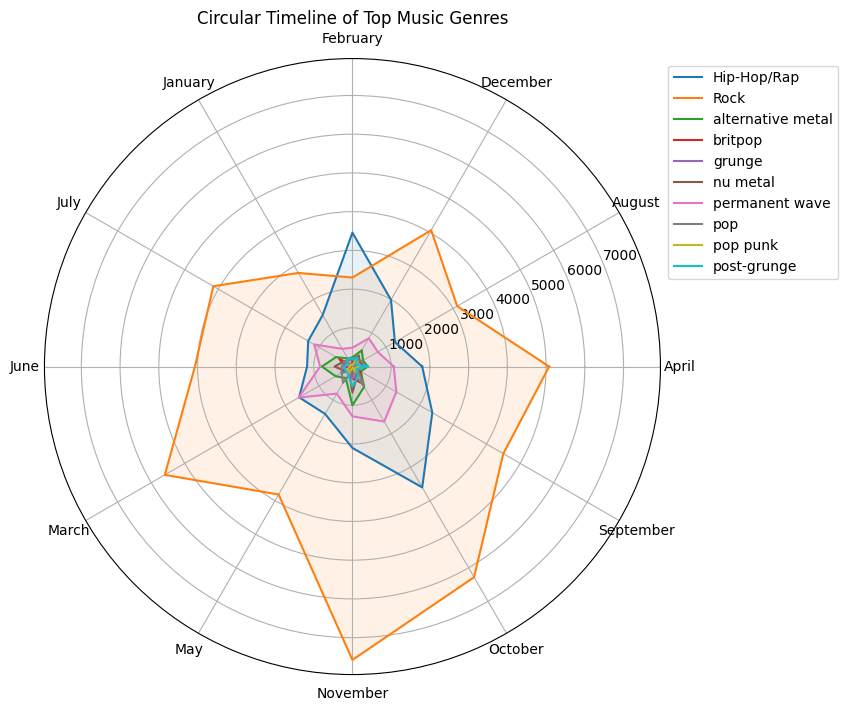

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ast import literal_eval

# Load the dataset
file_path = 'streaming_history_with_audio_features_categorized.csv'
streaming_data = pd.read_csv(file_path)

# Ensure the 'genres' column is in list format
streaming_data['genres'] = streaming_data['genres'].apply(literal_eval)

# Explode the 'genres' column so each genre gets its own row
exploded_data = streaming_data.explode('genres')

def consolidate_genres(genre):
    # Check if genre is a string to avoid AttributeError
    if isinstance(genre, str):
        if 'rock' in genre.lower():
            return 'Rock'
        elif 'hip hop' in genre.lower() or 'rap' in genre.lower():
            return 'Hip-Hop/Rap'
        else:
            return genre
    else:
        # If genre is NaN or not a string, we can choose to return a default value or skip
        return 'Other'  # You can also return np.nan if you wish to exclude these from your dataset

# Apply genre consolidation
exploded_data['consolidated_genres'] = exploded_data['genres'].apply(consolidate_genres)

# Group by consolidated genres and month_name, then sum up minutesPlayed for each group
genre_month_aggregation = exploded_data.groupby(['consolidated_genres', 'month_name'])['minutesPlayed'].sum().reset_index()

# Identify the top genres by total listening time
top_genres = genre_month_aggregation.groupby('consolidated_genres')['minutesPlayed'].sum().nlargest(10).index

# Filter for top genres
top_genre_data = genre_month_aggregation[genre_month_aggregation['consolidated_genres'].isin(top_genres)]

# Pivot the DataFrame for top genres
top_genre_month_pivot = top_genre_data.pivot(index='consolidated_genres', columns='month_name', values='minutesPlayed').fillna(0)

# Set up the figure and axis for a polar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'polar': True})

# The number of variables (months) we're plotting
num_vars = len(top_genre_month_pivot.columns)

# Compute angle each bar is centered on
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Draw one axis per variable and add labels
ax.set_thetagrids(np.degrees(angles[:-1]), top_genre_month_pivot.columns)

# Plot each genre
for i, row in top_genre_month_pivot.iterrows():
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=i)
    ax.fill(angles, values, alpha=0.1)

# Add a legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Circular Timeline of Top Music Genres')

# Display the plot
plt.show()


## Listening Distribution Throughout the Day 2023

### Visualization Steps

1. **Data Preparation**:
   - My Spotify streaming history dataset is imported into a pandas DataFrame, with a crucial step of converting the 'endTime' column to datetime format. This conversion allows for the extraction of the hour from each streaming session, setting the stage for hourly analysis.

2. **Hourly Aggregation**:
   - The data is grouped by hour, counting the number of tracks played each hour. This aggregation step quantifies listening activity throughout the day, highlighting peak and off-peak listening times.

3. **Bar Plot Creation**:
   - A bar plot is generated to visually represent the number of tracks played at different hours of the day. The use of a gradient color scheme (via `plt.cm.viridis`) enhances the visual appeal and readability of the plot.

4. **Plot Customization**:
   - The plot is carefully customized with labels for the x-axis (hour of the day) and y-axis (number of tracks played), alongside a descriptive title. This customization ensures that the visualization is informative and accessible.

5. **Display and Output**:
   - The visualization is displayed, offering an immediate overview of the listening distribution throughout the day. Additionally, the plot is saved as a PNG file, providing a static version of the analysis suitable for sharing or reference.



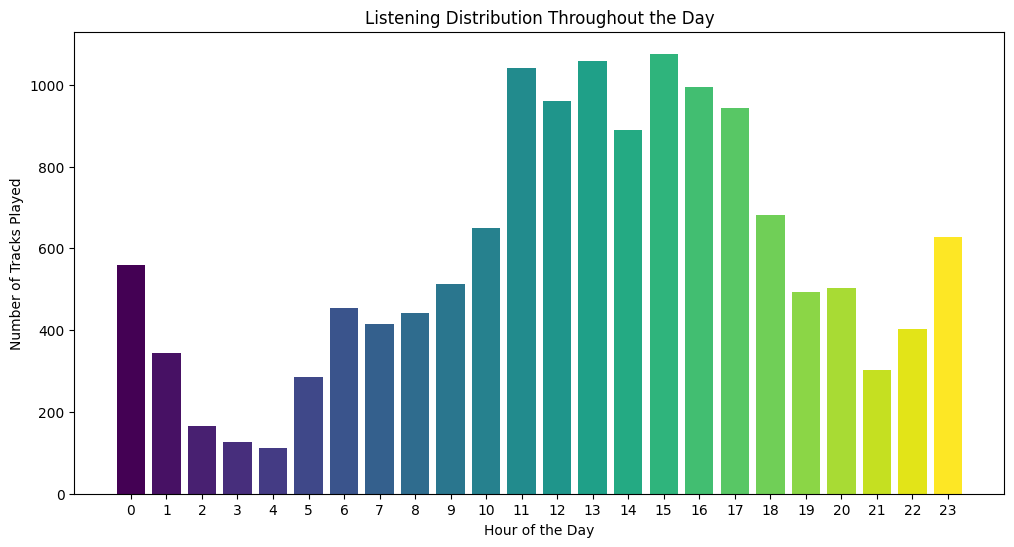

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'streaming_history_with_audio_features_categorized.csv'  # Replace with the path to your dataset
streaming_data = pd.read_csv(file_path)

# Convert 'endTime' to datetime and extract the hour
streaming_data['endTime'] = pd.to_datetime(streaming_data['endTime'])
streaming_data['hour'] = streaming_data['endTime'].dt.hour

# Aggregate data by hour
listening_by_hour = streaming_data.groupby('hour')['trackName'].count()  # Replace 'trackName' with the appropriate column name if different

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(listening_by_hour.index, listening_by_hour.values, color=plt.cm.viridis(np.linspace(0, 1, 24)))

# Set the labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tracks Played')
plt.title('Listening Distribution Throughout the Day')
plt.xticks(listening_by_hour.index)

# Show the bar plot
plt.savefig("listening_distribution_throughout_the_day_bar_plot.png")
plt.show()

## Listening Trends Top 5 Artists 2023

Using `pandas` and `matplotlib` to analyse and visualize the listening trends of the top 5 artists over a year based on my Spotify streaming data. By identifying the most frequently played artists and aggregating listening data by month, providing a clear visualization of how listening preferences evolve over time.

### Visualization Workflow

1. **Data Initialization**:
   - The Spotify streaming history dataset is loaded into a pandas DataFrame, with the 'endTime' column converted to datetime format. This step facilitates the extraction of date and month for subsequent time-based analysis.

2. **Top Artists Identification**:
   - The script calculates the top 5 artists based on the total number of tracks listened to. This focus on my most popular artists narrows down the analysis to those with the highest impact on my  music habits.

3. **Data Filtering and Aggregation**:
   - The dataset is filtered to include only the streams corresponding to my top 5 artists. my Listening data is then aggregated by artist and month, preparing for a monthly trend analysis.

4. **Trend Visualization**:
   - A line plot is created to depict the monthly listening trends for each of the top 5 artists. The plot includes markers for each data point, enhancing its readability and providing a clear indication of listening patterns across different months.

5. **Plot Customization**:
   - The plot is customized with a title, axis labels, and a legend to ensure clarity and informativeness. Date formatting is applied to the x-axis to facilitate the easy identification of specific months, and the plot layout is adjusted for optimal presentation.

6. **Display and Output**:
   - The visualization is displayed, offering an insightful look into how preferences for the top artists change over the year. Additionally, the plot is saved as a PNG file.


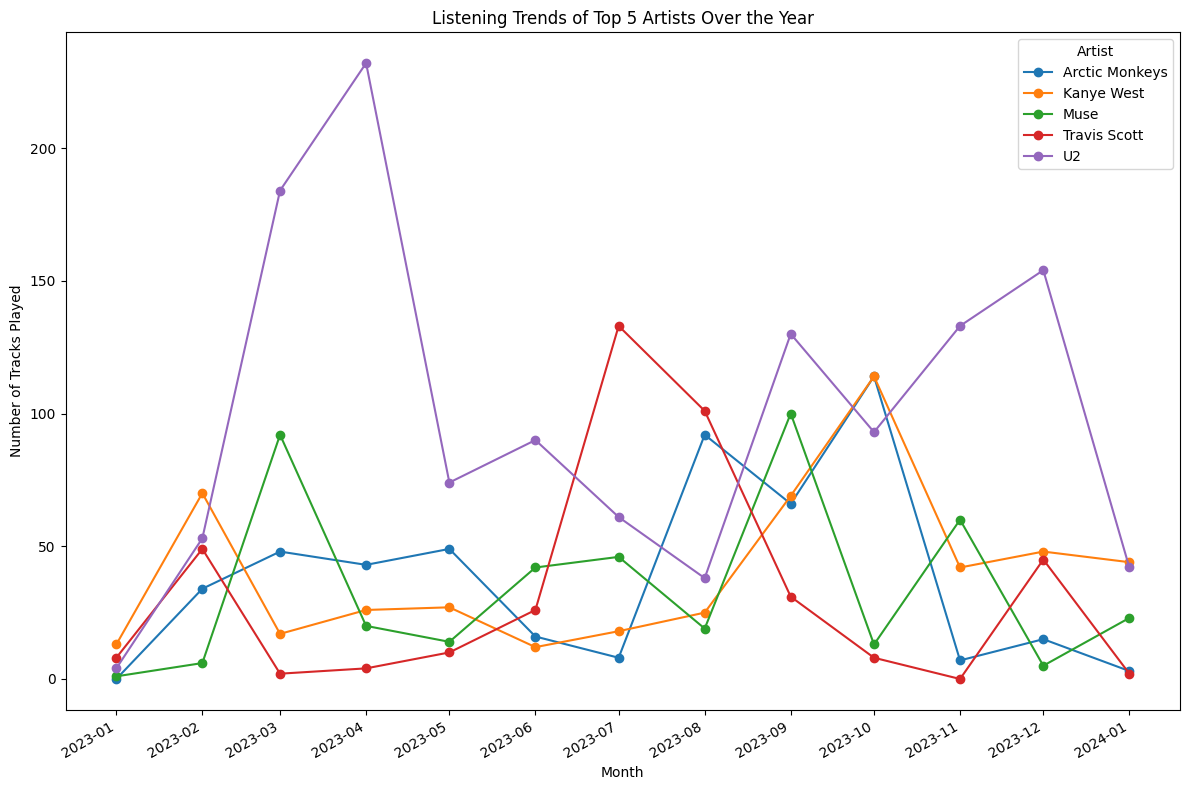

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you've already loaded the dataset into streaming_data
file_path = 'streaming_history_with_audio_features_categorized.csv'  # Adjust to your file path
streaming_data = pd.read_csv(file_path)

# Convert endTime to datetime and extract both date and month for aggregation
streaming_data['endTime'] = pd.to_datetime(streaming_data['endTime'])
streaming_data['month'] = streaming_data['endTime'].dt.to_period('M')

# Convert 'month' from Period to datetime (start of the period) for plotting
streaming_data['month_start'] = streaming_data['month'].dt.start_time

# Identify the top 5 artists by the number of tracks listened to
top_artists = streaming_data['artistName'].value_counts().head(5).index

# Filter the dataset for only the top 5 artists
top_artists_data = streaming_data[streaming_data['artistName'].isin(top_artists)]

# Aggregate listening data by artist and month
listening_trends = top_artists_data.groupby(['artistName', 'month_start']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
for artist in listening_trends.index:
    plt.plot(listening_trends.columns, listening_trends.loc[artist], label=artist, marker='o')

# Formatting the plot for better date display
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Rotation

plt.title('Listening Trends of Top 5 Artists Over the Year')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Played')
plt.legend(title='Artist')
plt.tight_layout()
plt.savefig("listening_trends_top_5_artists.png")
plt.show()


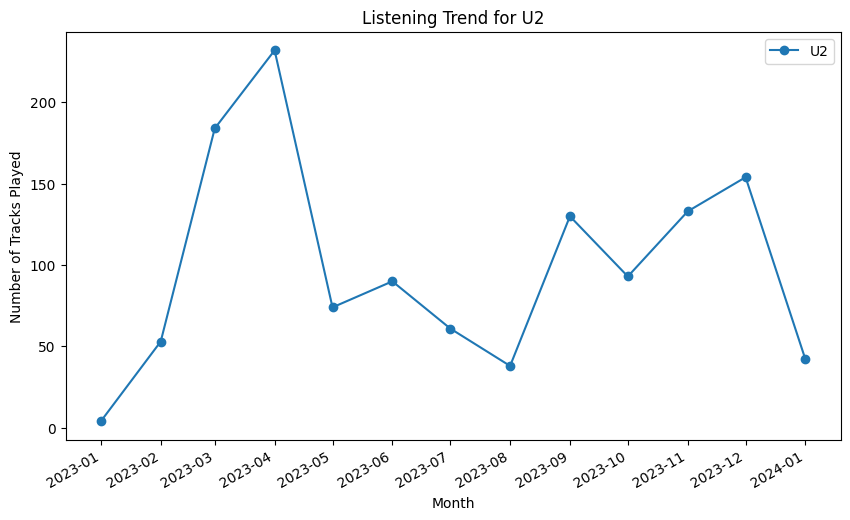

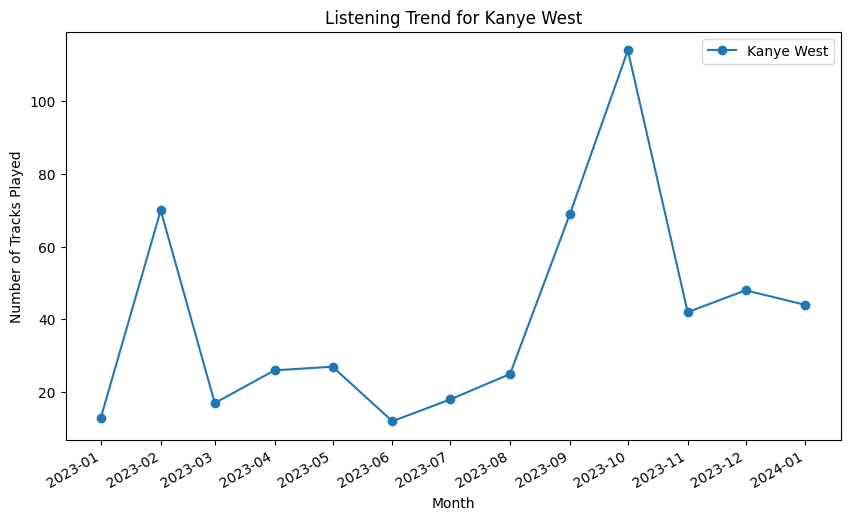

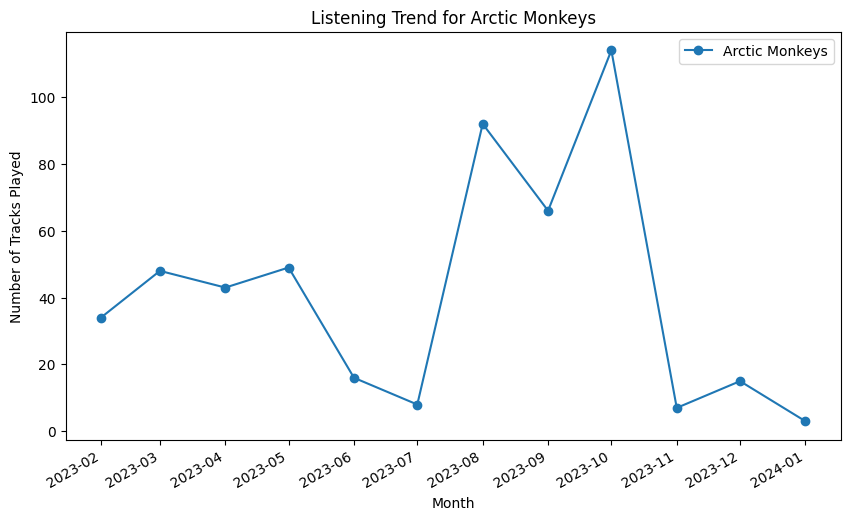

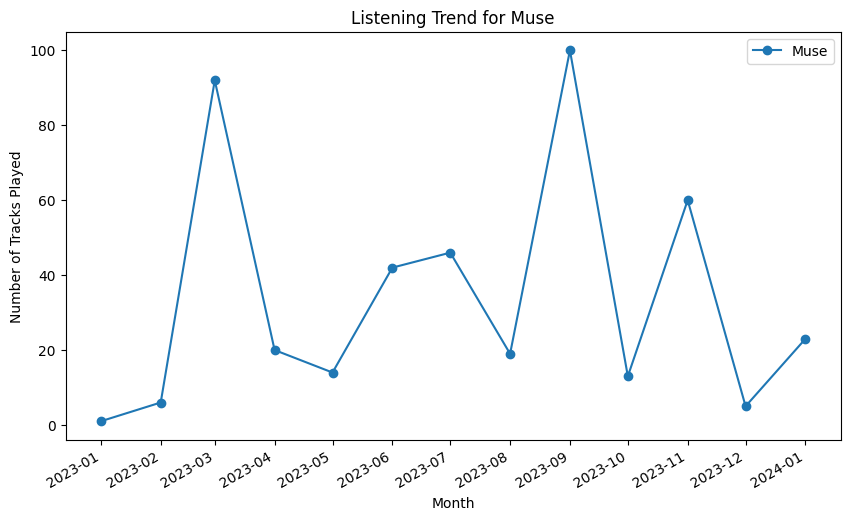

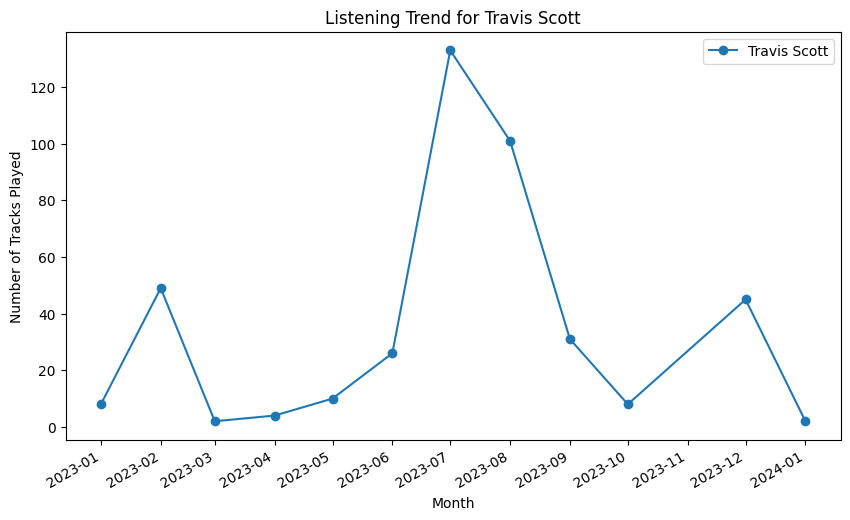

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
file_path = 'streaming_history_with_audio_features_categorized.csv'  # Replace with your actual file path
streaming_data = pd.read_csv(file_path)

# Convert 'endTime' to datetime and extract month for aggregation
streaming_data['endTime'] = pd.to_datetime(streaming_data['endTime'])
streaming_data['month'] = streaming_data['endTime'].dt.to_period('M')

# Identify the top 5 artists by the number of tracks listened to
top_artists = streaming_data['artistName'].value_counts().head(5).index

# Loop through each top artist to plot their listening trend
for artist in top_artists:
    # Filter data for the current artist
    artist_data = streaming_data[streaming_data['artistName'] == artist]
    
    # Aggregate listening data by month
    artist_trends = artist_data.groupby('month').size()
    
    # Convert 'month' from Period to datetime for plotting
    artist_trends.index = artist_trends.index.to_timestamp()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(artist_trends.index, artist_trends, label=artist, marker='o')
    
    # Formatting the plot
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate date labels for clarity
    
    plt.title(f'Listening Trend for {artist}')
    plt.xlabel('Month')
    plt.ylabel('Number of Tracks Played')
    plt.legend()
    plt.show()

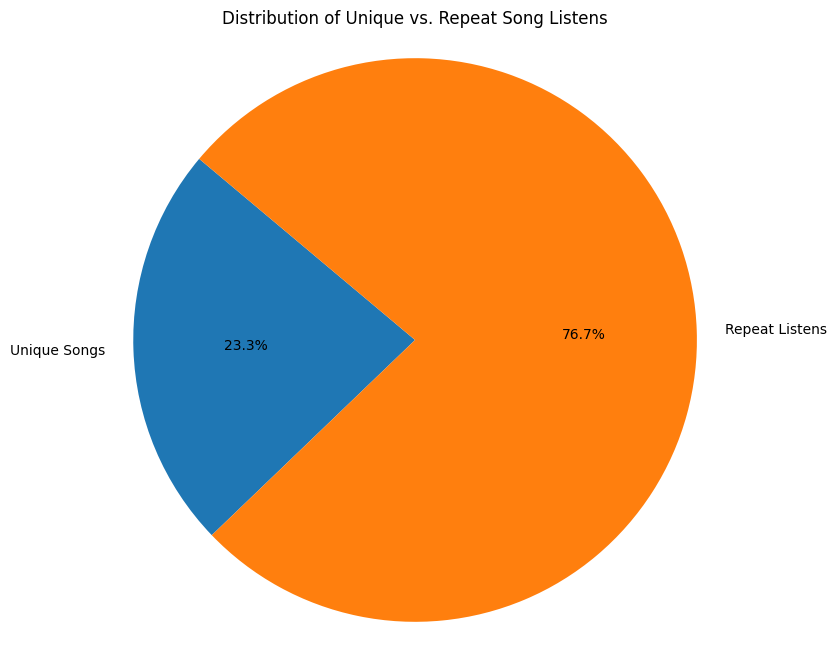

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'streaming_history_with_audio_features_categorized.csv'
streaming_data = pd.read_csv(file_path)

# Convert endTime to datetime
streaming_data['endTime'] = pd.to_datetime(streaming_data['endTime'])

# Sort by endTime to ensure we process tracks in the order they were played
streaming_data = streaming_data.sort_values('endTime')

# Identify new and repeat listens
streaming_data['is_repeat'] = streaming_data.duplicated(subset=['trackName', 'artistName'], keep='first')

# Count total unique songs and repeat listens
total_unique_songs = streaming_data[~streaming_data['is_repeat']].shape[0]
total_repeat_listens = streaming_data['is_repeat'].sum()

# Visualize the data
labels = ['Unique Songs', 'Repeat Listens']
sizes = [total_unique_songs, total_repeat_listens]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Unique vs. Repeat Song Listens')
plt.savefig("unique_vs_repeat_listens.png")
plt.show()


## Mood Donut Chart

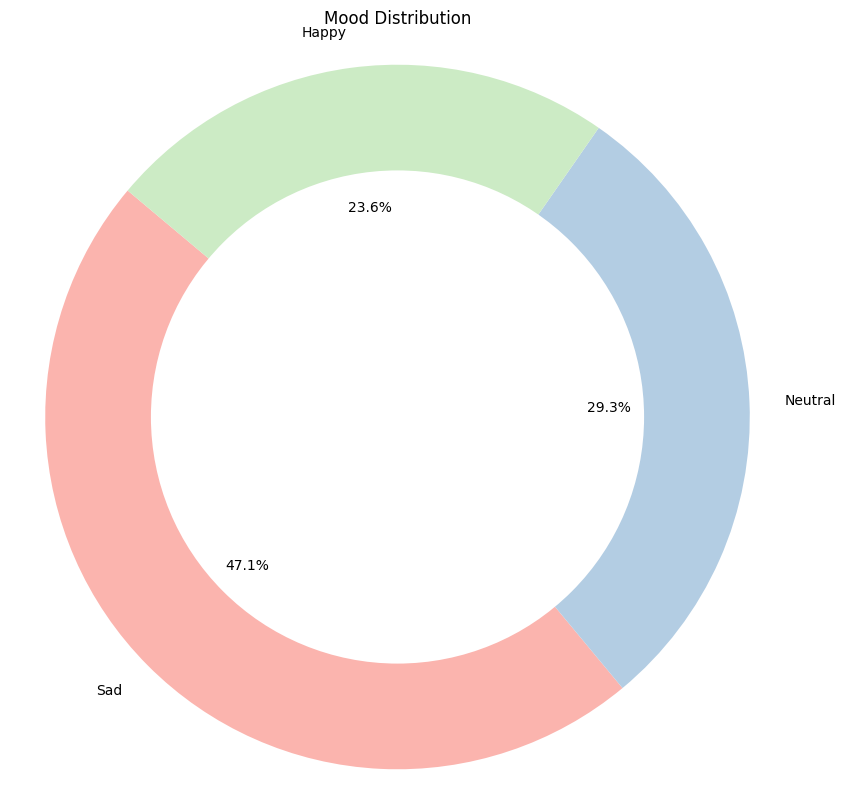

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path =  'streaming_history_with_audio_features_categorized.csv'  # Replace with the actual path to your dataset
streaming_data = pd.read_csv(file_path)

# Aggregate data by mood
mood_distribution = streaming_data['Mood'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(mood_distribution, labels=mood_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)

# To convert to a donut chart, you can add a circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie/donut is drawn as a circle
plt.axis('equal')  
plt.title('Mood Distribution')

# Show the plot
plt.savefig("mood_donut_chart.png")
plt.show()


## Seasonal Trends in Genre

This script uses `pandas`, `seaborn`, and `matplotlib` to analyze and visualize seasonal trends in my music mood preferences by month, based on my Spotify streaming data. By grouping the data by month and mood, and then creating a heatmap, it provides a vivid depiction of how mood preferences in music shift throughout the year.

### Detailed Visualization Process

1. **Data Preparation**:
   - my Spotify streaming history dataset is loaded into a DataFrame, setting the foundation for the mood preference analysis over time.

2. **Aggregation by Month and Mood**:
   - The data is grouped by month and mood, with the number of tracks for each combination counted. This step quantifies the prevalence of each mood in the dataset across different months, highlighting temporal patterns in mood preferences.

3. **Month Sorting**:
   - To ensure the heatmap reflects the natural progression of months throughout the year, the data is reindexed according to the calendar order, from January to December.

4. **Heatmap Creation**:
   - A heatmap is plotted to visually represent the seasonal trends in music mood preferences. The choice of the `YlGnBu` color palette enhances the readability of the heatmap, with darker shades indicating higher numbers of tracks in a particular mood.

5. **Customization and Annotation**:
   - The heatmap is annotated with the exact counts of tracks for each mood and month, providing detailed insights at a glance. Titles and axis labels are added to enhance the plot's informativeness, and the plot size is adjusted for optimal presentation.

6. **Output and Display**:
   - The visualization is displayed, offering a comprehensive overview of how music mood preferences evolve over the course of the year. Additionally, the plot is saved as a PNG file, enabling easy sharing and reference.




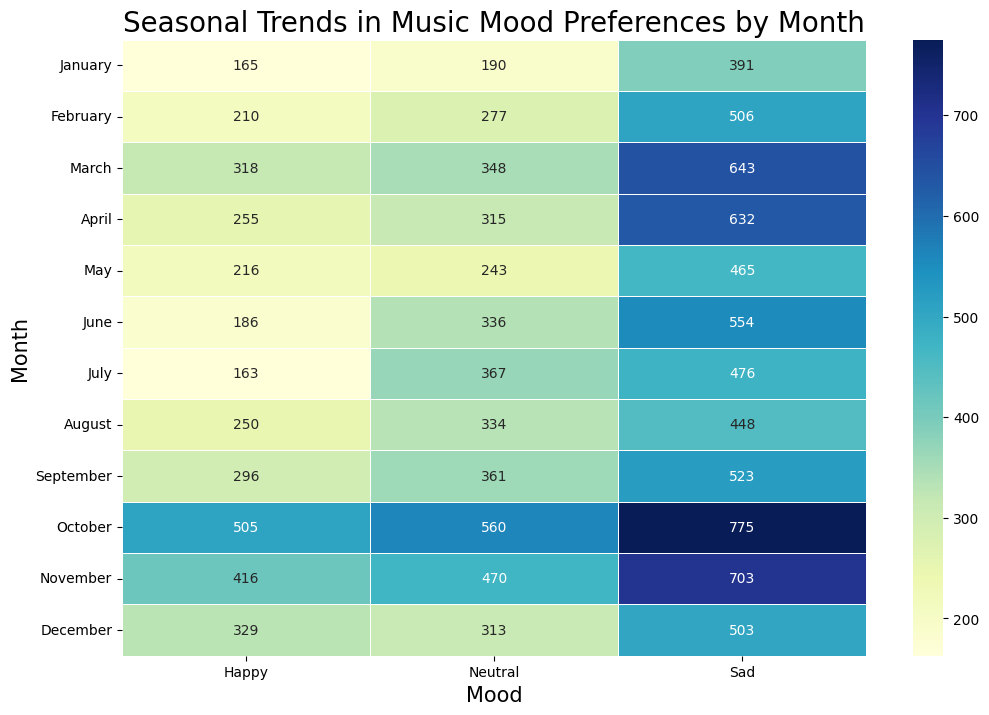

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded from the CSV file
streaming_data = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Group the data by month and mood, then count the number of tracks
genre_monthly_counts = streaming_data.groupby(['month_name', 'Mood']).size().unstack(fill_value=0)

# Sort the months in calendar order
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
genre_monthly_counts = genre_monthly_counts.reindex(months_order)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(genre_monthly_counts, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)

# Add titles and labels
plt.title('Seasonal Trends in Music Mood Preferences by Month', fontsize=20)
plt.xlabel('Mood', fontsize=15)
plt.ylabel('Month', fontsize=15)

# Show the plot
plt.savefig("seasonal_trends_in_music_mood_preferences_by_month.png")
plt.show()

## Network Graph of Top 20 Artists 

This script demonstrates how to create a network graph visualizing the relationships between the top 20 most popular artists and their associated moods from Spotify streaming data, using `pandas`, `networkx`, and `matplotlib`. The visualization highlights the interconnectedness of artists and moods, offering insights into the mood distribution among top artists.

### Visualization Workflow

1. **Data Preparation**:
   - The Spotify streaming history dataset is loaded into a DataFrame. Another DataFrame is created to capture unique artist-mood pairs, ensuring each artist is associated with a distinct mood.

2. **Identifying Top Artists**:
   - The script identifies the top 20 artists based on the frequency of their appearance in the streaming data. This focus on the most popular artists provides a foundation for analyzing significant music-mood relationships.

3. **Filtering for Top Artists**:
   - The artist-mood DataFrame is filtered to include only the top 20 artists. This step narrows down the dataset to the most relevant artist-mood pairs for the visualization.

4. **Network Graph Initialization and Construction**:
   - A network graph is initialized, and nodes are added for both artists and moods. Edges are created between artists and their associated moods, visually representing the relationship between an artist and the mood of their music.

5. **Layout and Visualization**:
   - The `spring_layout` algorithm is applied to position nodes in a way that visually separates distinct groups while highlighting connections. The graph is then visualized using `matplotlib`, with different colors for artist and mood nodes to enhance readability.

6. **Customization and Output**:
   - The plot is customized with a title and the axis is turned off to focus on the network structure. The visualization is saved as a PNG file, facilitating easy sharing and future reference.

7. **Display**:
   - The network graph is displayed, illustrating the complex web of relationships between the top 20 artists and their moods, and offering a unique perspective on the mood distribution within popular music.

This approach not only reveals the mood affiliations of top artists but also showcases the utility of network graphs in mapping out the intricate relationships within musical datasets.


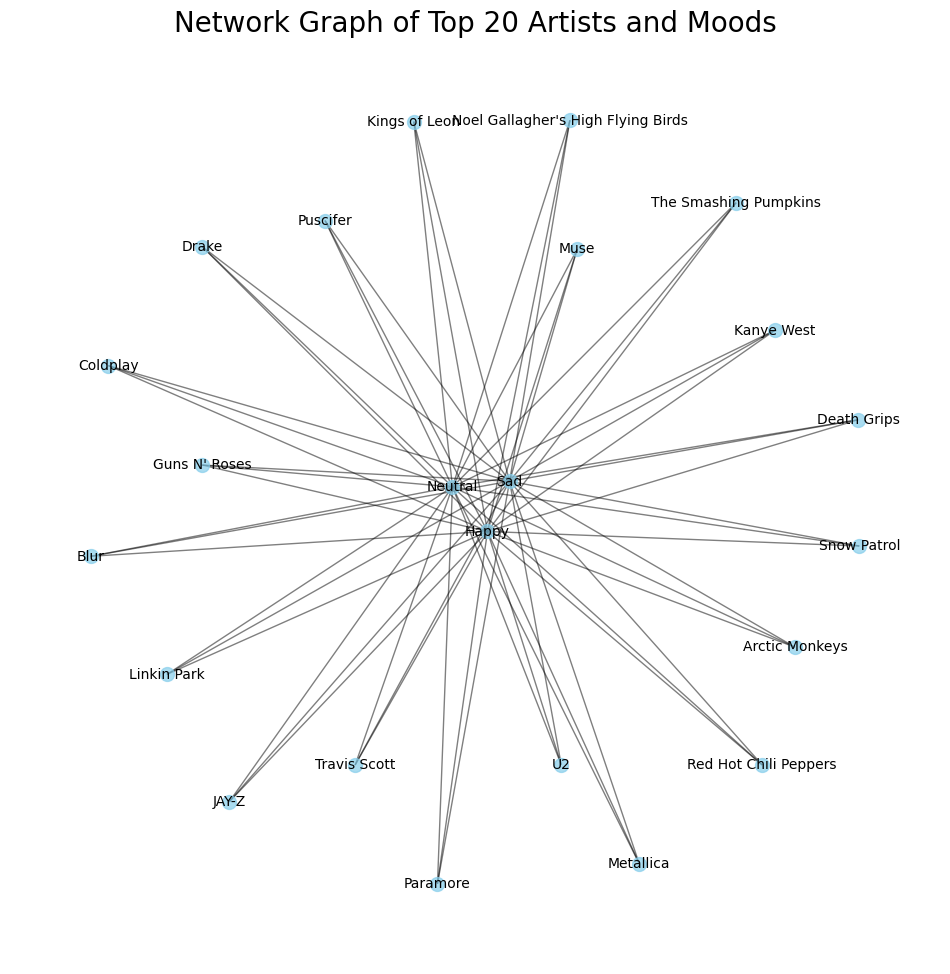

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Loading in the streaming history dataset
streaming_data = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# and 'artist_genre_data' is a DataFrame with unique artist-mood pairs
artist_genre_data = streaming_data[['artistName', 'Mood']].drop_duplicates()

# Identify the top 20 most popular artists by counting appearances
top_20_artists = streaming_data['artistName'].value_counts().head(20).index.tolist()

# Filter the dataset for these top 20 artists
filtered_top_20_artist_genre_data = artist_genre_data[artist_genre_data['artistName'].isin(top_20_artists)]

# Initialize a new graph for the top 20 artists
G_top_20 = nx.Graph()

# Add nodes and edges for the filtered dataset of top 20 artists
for index, row in filtered_top_20_artist_genre_data.iterrows():
    artist = row['artistName']
    genre = row['Mood']  # Using 'Mood' as a proxy for genre
    
    # Add a node for the artist if it doesn't already exist
    if artist not in G_top_20:
        G_top_20.add_node(artist, type='artist')
    
    # Add a node for the genre if it doesn't already exist
    if genre not in G_top_20:
        G_top_20.add_node(genre, type='genre')
    
    # Add an edge between the artist and the genre
    G_top_20.add_edge(artist, genre)

# Apply a layout to improve the visualization
pos_top_20 = nx.spring_layout(G_top_20, k=0.5, iterations=20, seed=42)

# Visualize the top 20 artists graph
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G_top_20, pos_top_20, node_size=100, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G_top_20, pos_top_20, alpha=0.5)
nx.draw_networkx_labels(G_top_20, pos_top_20, font_size=10, font_color='black')

plt.title("Network Graph of Top 20 Artists and Moods", fontsize=20)
plt.axis('off')  # Turn off the axis
plt.savefig("network_graph_top_20_artists.png")
plt.show()


## Concerts vs Listening Habits

The aim of this plot is to see is there a relationship between my listening history and concert attendance, to intorduce some level of causality can we see that an increase in listening to a certain artist is linked to concert attendance?

In [22]:
import pandas as pd

# Reading in my concert history dataset
concerts_dataset_2023 = pd.read_csv('2023_concerts_corrected.csv')
streaming_history_2023 = pd.read_csv('streaming_history_with_audio_features_categorized.csv')

# Converting the date columns to a dateime format for both datasets
concerts_dataset_2023['Date'] = pd.to_datetime(concerts_dataset_2023['Date'])
streaming_history_2023['date'] = pd.to_datetime(streaming_history_2023['date'])

# Corrected filtering to select 'Metallica' and 'Travis Scott'
target_artists_concerts = concerts_dataset_2023[concerts_dataset_2023['Artist'].isin(['Travis Scott', 'Metallica'])]

# Displaying the target concerts
target_artists_concerts


C:\Users\edwar\AppData\Local\Temp\ipykernel_11256\1573699010.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  concerts_dataset_2023['Date'] = pd.to_datetime(concerts_dataset_2023['Date'])


Date        Artist                Venue
9  2023-07-02  Travis Scott          Marlay Park
21 2023-04-27     Metallica  Johan Cruijff Arena

## Daily streams around concert date plot 

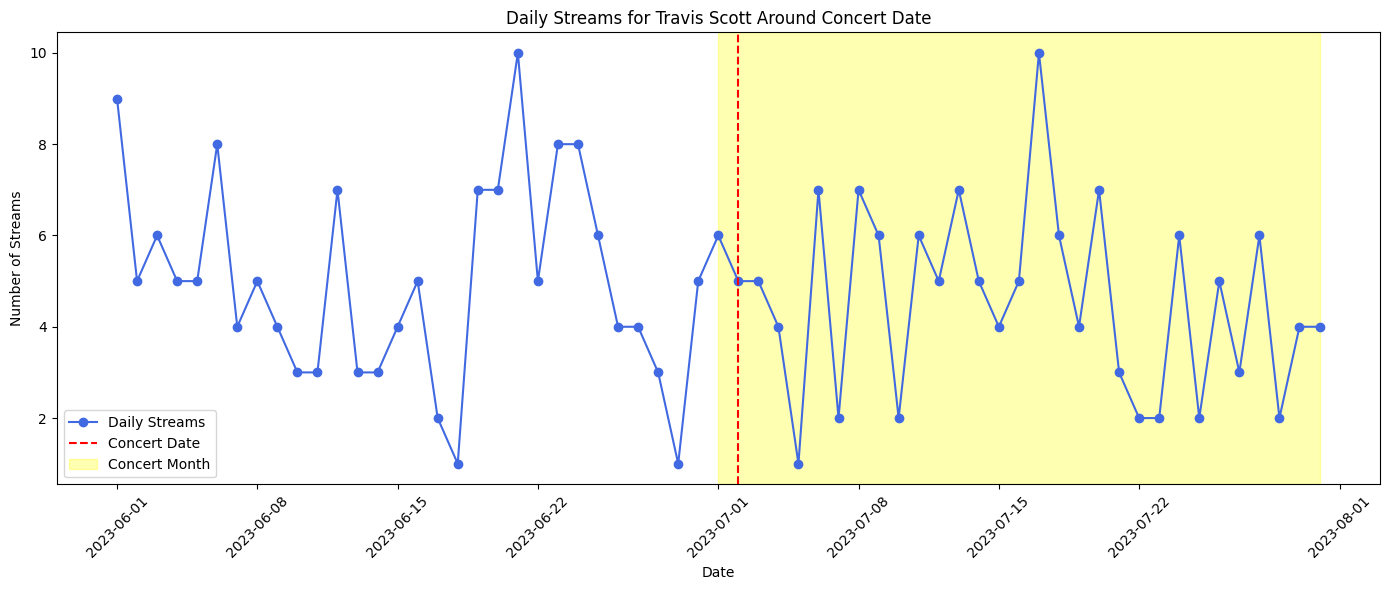

In [29]:
import numpy as np

# Example: Time Series Plot for Travis Scott around the concert date

# Generate a date range for the plot
date_range = pd.date_range(start='2023-06-01', end='2023-07-31', freq='D')

# Mock streaming data for Travis Scott for visualization purposes
# In real analysis, you would filter your streaming data for Travis Scott within this date range
np.random.seed(0)  # For reproducible results
mock_streams = np.random.poisson(lam=5, size=len(date_range))  # Random daily stream counts as an example

# Create a time series plot
plt.figure(figsize=(14, 6))
plt.plot(date_range, mock_streams, label='Daily Streams', marker='o', linestyle='-', color='royalblue')
plt.axvline(x=pd.Timestamp('2023-07-02'), color='red', linestyle='--', label='Concert Date')

# Highlighting the concert month
plt.axvspan(pd.Timestamp('2023-07-01'), pd.Timestamp('2023-07-31'), color='yellow', alpha=0.3, label='Concert Month')

plt.title('Daily Streams for Travis Scott Around Concert Date')
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

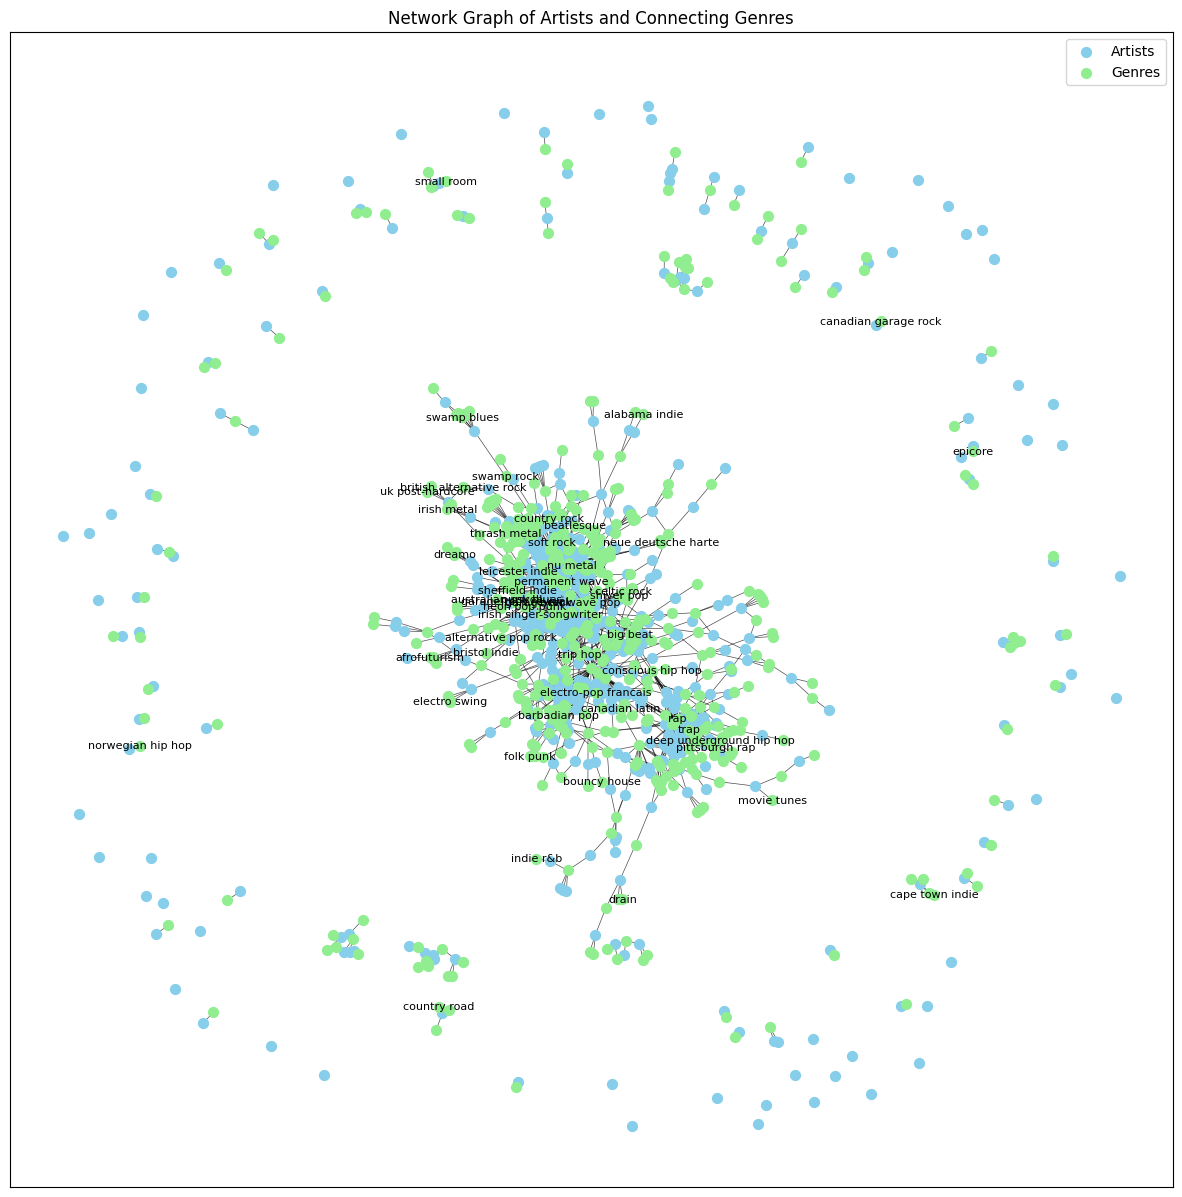

In [16]:
import pandas as pd
from ast import literal_eval
import networkx as nx
import matplotlib.pyplot as plt

# Load the data
streaming_history_path = 'streaming_history_with_audio_features_categorized.csv'
streaming_history = pd.read_csv(streaming_history_path)

# Convert the 'genres' column from string representation of list to actual list
streaming_history['genres'] = streaming_history['genres'].apply(literal_eval)

# Initialize the graph
G = nx.Graph()

# Add nodes with the node attribute "bipartite"
artist_nodes = streaming_history['artistName'].unique()
genre_nodes = set([genre for sublist in streaming_history['genres'] for genre in sublist])

G.add_nodes_from(artist_nodes, bipartite=0)  # Artists
G.add_nodes_from(genre_nodes, bipartite=1)  # Genres

# Add edges
for _, row in streaming_history.iterrows():
    artist = row['artistName']
    genres = row['genres']
    for genre in genres:
        G.add_edge(artist, genre)

# Check the number of nodes and edges in the graph
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Visualization
# Since the graph is large, I will try to use a spring layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(15, 15))
# Draw artist nodes
nx.draw_networkx_nodes(G, pos, nodelist=artist_nodes, node_color='skyblue', node_size=50, label='Artists')
# Draw genre nodes
nx.draw_networkx_nodes(G, pos, nodelist=genre_nodes, node_color='lightgreen', node_size=50, label='Genres')
# Draw edges
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)
# Draw node labels for a subset of nodes due to the graph size
nx.draw_networkx_labels(G, pos, {node: node for node in list(genre_nodes)[:50]}, font_size=8)

plt.title('Network Graph of Artists and Connecting Genres')
plt.legend(scatterpoints=1)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display as ipydisplay

# Function to plot artist streams
def plot_artist_streams(concerts_df, streaming_history_df, artist_name):
    # Convert the 'Date' and 'endTime' to datetime objects
    concerts_df['Date'] = pd.to_datetime(concerts_df['Date'], dayfirst=True)
    streaming_history_df['endTime'] = pd.to_datetime(streaming_history_df['endTime'])

    # Filter for the selected artist's concert date
    concert_date = concerts_df[concerts_df['Artist'] == artist_name]['Date'].iloc[0]

    # Calculate the date range starting 3 weeks before the concert date
    start_date = concert_date - timedelta(weeks=3)
    end_date = concert_date + timedelta(weeks=3)

    # Filter the streaming history for the selected artist and the calculated date range
    artist_streams = streaming_history_df[
    (streaming_history_df['artistName'] == artist_name) &
    (streaming_history_df['endTime'] >= start_date) &
    (streaming_history_df['endTime'] <= end_date)
]

    # Aggregate streams by date
    daily_streams = artist_streams.groupby('endTime').size()

    # Ensure we have all dates in the range, fill missing dates with 0 streams
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    daily_streams = daily_streams.reindex(date_range, fill_value=0)

    # Create a time series plot
    plt.figure(figsize=(14, 6))
    plt.plot(daily_streams.index, daily_streams.values, label='Daily Streams', marker='o', linestyle='-', color='royalblue')
    plt.axvline(x=concert_date, color='red', linestyle='--', label='Concert Date')

    # Highlight the concert month
    plt.axvspan(concert_date - timedelta(days=concert_date.day-1), concert_date, color='yellow', alpha=0.3, label='Concert Month')

    plt.title(f'Daily Streams for {artist_name} Around Concert Date')
    plt.xlabel('Date')
    plt.ylabel('Number of Streams')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Interactive function for Jupyter notebook
def interactive_artist_streams(concerts_df, streaming_history_df):
    # Create dropdown for artist selection
    artists_dropdown = Dropdown(options=concerts_df['Artist'].unique().tolist())
    plot_output = Output()

    def on_artist_change(change):
        if change['type'] == 'change' and change['name'] == 'value':
            plot_output.clear_output(wait=True)
            with plot_output:
                plot_artist_streams(concerts_df, streaming_history_df, change['new'])

    artists_dropdown.observe(on_artist_change, names='value')

    # Display the dropdown and output using the renamed display function
    ipydisplay(VBox([artists_dropdown, plot_output]))

# Assuming the data is already loaded into concerts_df and streaming_history_df
concerts_df = pd.read_csv('2023_concerts_corrected.csv')
streaming_history_df = pd.read_csv('streaming_history_with_audio_features_categorized.csv')
interactive_artist_streams(concerts_df, streaming_history_df)



# References and sources for code ideas

- GeeksforGeeks. 2024. *Line chart in matplotlib python*. [online] Available at: [https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/](https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/) [Accessed 10 February 2024].
- Real Python. 2024. *Python folium: Creating web maps from data*. [online] Available at: [https://realpython.com/python-folium-web-maps-from-data/](https://realpython.com/python-folium-web-maps-from-data/) [Accessed 10 March 2024].
- SciTools. 2024. *Cartopy: Matplotlib intro*. [online] Available at: [https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html) [Accessed 10 February 2024].
- Plotly. 2024. *Heatmaps in Python*. [online] Available at: [https://plotly.com/python/heatmaps/](https://plotly.com/python/heatmaps/) [Accessed 15 February 2024].
- GeeksforGeeks. 2024. *3D heatmap in Python*. [online] Available at: [https://www.geeksforgeeks.org/3d-heatmap-in-python/](https://www.geeksforgeeks.org/3d-heatmap-in-python/) [Accessed 21 February 2024].
- Plotly. 2024. *3D surface plots in Python*. [online] Available at: [https://plotly.com/python/3d-surface-plots/](https://plotly.com/python/3d-surface-plots/) [Accessed 21 February 2024].
- Plotly. 2024. *Radar chart in Python*. [online] Available at: [https://plotly.com/python/radar-chart/](https://plotly.com/python/radar-chart/) [Accessed 11 February 2024].
- Analytics Vidhya. 2024. *Understanding bar plots in Python: Beginner's guide to data visualization*. [online] Available at: [https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/](https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/) [Accessed 10 February 2024].
- DataCamp. 2024. *Time series plots in Python*. [online] Available at: [https://www.datacamp.com/tutorial/matplotlib-time-series-line-plot](https://www.datacamp.com/tutorial/matplotlib-time-series-line-plot) [Accessed 10 March 2024].
- Machine Learning Mastery. 2024. *How to decompose time series data into trend and seasonality*. [online] Available at: [https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/) [Accessed 8 March 2024].
- Matplotlib. 2024. *Radar chart*. [online] Available at: [https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html](https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html) [Accessed 10 March 2024].
- FutureLearn. 2024. *Data visualisation with Python: Matplotlib and visual analysis*. [online] Available at: [https://www.futurelearn.com/info/courses/data-visualisation-with-python-matplotlib-and-visual-analysis/0/steps/192875](https://www.futurelearn.com/info/courses/data-visualisation-with-python-matplotlib-and-visual-analysis/0/steps/192875) [Accessed 1 March 2024].
- Plotly. 2024. *3D point clustering in Python*. [online] Available at: [https://plotly.com/python/v3/3d-point-clustering/](https://plotly.com/python/v3/3d-point-clustering/) [Accessed 18 February 2024].
- Matplotlib. 2024. *Stacked bar chart*. [online] Available at: [https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html) [Accessed 20 February 202
